# Machine Learning | Capstone Project - Used Car in India

### Problem Statement

The popularity of used cars is growing, over new cars in India. This could be due to economy downturn that caused by the Pandemic which resulted buying the new car is much more unaffordable by people.

Consumers manually bring their cars down to workshops to estimate the selling price of their used cars. This process involves a lot of time and resources. 

### The mission

- Analysis and identify the factors that potentially influence the used cars price

- Build a prediction model which can automatically help new car-sellers better and efficiently suggesting suitable price to list their used cars at based on the features.


### Data Dictionary

- Name : The brand and model of the car
- Location : The location in which the car is being sold or is available for purchase
- Year : The year or edition of the model
- Kilometers_Driven	: The total kilometers driven in the car by the previous owner(s) in KM
- Fuel_Type : The type of fuel used by the car
- Transmission : The type of transmission used by the car
- Owner_Type : Whether the ownership is Firsthand, Second hand or other
- Mileage : The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in cc
- Power : The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price	: Price of new model
- Price	: The price of the used car in INR Lakhs

Note: 
- A lakh is a unit in the Indian numbering system equal to one hundred thousand.


# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet 
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.impute import KNNImputer



#This code is allowing me to view the table up to 6100 rows & 
pd.set_option('display.max_rows', 6100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

%matplotlib inline

# Import Dataset

In [2]:
data = pd.read_csv('cars.csv')
data.head()

Name    Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  New_Price  Price
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0        NaN   1.75
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0        NaN  12.50
2                      Honda Jazz V     Chennai  2011              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0  8.61 Lakh   4.50
3                 Maruti Ertiga VDI     Chennai  2012              87000    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0        NaN   6.00
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0        NaN  17.74

In [3]:
#The last 5 rows of the dataset
data.tail()

Name   Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine     Power  Seats  New_Price  Price
6014          Maruti Swift VDI      Delhi  2014              27365    Diesel       Manual      First   28.4 kmpl  1248 CC    74 bhp    5.0  7.88 Lakh   4.75
6015  Hyundai Xcent 1.1 CRDi S     Jaipur  2015             100000    Diesel       Manual      First   24.4 kmpl  1120 CC    71 bhp    5.0        NaN   4.00
6016     Mahindra Xylo D4 BSIV     Jaipur  2012              55000    Diesel       Manual     Second   14.0 kmpl  2498 CC   112 bhp    8.0        NaN   2.90
6017        Maruti Wagon R VXI    Kolkata  2013              46000    Petrol       Manual      First   18.9 kmpl   998 CC  67.1 bhp    5.0        NaN   2.65
6018     Chevrolet Beat Diesel  Hyderabad  2011              47000    Diesel       Manual      First  25.44 kmpl   936 CC  57.6 bhp    5.0        NaN   2.50

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [5]:
# rename column's name to be more localized in Singapore

data.rename({'Kilometers_Driven' : 'Mileage_km',
           'Owner_Type' : 'No_of_Owner', 
           'Mileage' : 'Fuel_Consumption', 
           'Engine': 'Engine_Power',
           'Power': 'Horse_Power', 
           'Seats' : 'Seat_Capacity'},
           axis='columns', inplace=True)
data.head()

Name    Location  Year  Mileage_km Fuel_Type Transmission No_of_Owner Fuel_Consumption Engine_Power Horse_Power  Seat_Capacity  New_Price  Price
0            Maruti Wagon R LXI CNG      Mumbai  2010       72000       CNG       Manual       First       26.6 km/kg       998 CC   58.16 bhp            5.0        NaN   1.75
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015       41000    Diesel       Manual       First       19.67 kmpl      1582 CC   126.2 bhp            5.0        NaN  12.50
2                      Honda Jazz V     Chennai  2011       46000    Petrol       Manual       First        18.2 kmpl      1199 CC    88.7 bhp            5.0  8.61 Lakh   4.50
3                 Maruti Ertiga VDI     Chennai  2012       87000    Diesel       Manual       First       20.77 kmpl      1248 CC   88.76 bhp            7.0        NaN   6.00
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013       40670    Diesel    Automatic      Second        15.2 kmpl      1968 CC   140.8 bhp            5.0        NaN  17.74

### Breakdown of the new naming for the columns:
Name              : < No change > <br>
Location          : < No change > <br>
Year              : < No change > <br>
Kilometers_Driven : **changed to "Mileage_km"** <br>
Fuel_Type         : < No change > <br>
Transmission      : < No change > <br>
Owner_Type        : **changed to "No_of_Owner"** <br>
Mileage           : **changed to "Fuel_Consumption"** <br>
Engine            : **changed to "Engine_Power"** <br>
Power             : **changed to "Horse_Power"** <br>
Seats             : **changed to "Seat_Capacity"** <br>
New_Price         : < No change > <br>
Price             : < No change > <br>

# Data Understanding

- Understanding and exploring the Data
- Basic explanation about the data ( summary, statistic and etc.)

In [6]:
# study the data size and details
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              6019 non-null   object 
 1   Location          6019 non-null   object 
 2   Year              6019 non-null   int64  
 3   Mileage_km        6019 non-null   int64  
 4   Fuel_Type         6019 non-null   object 
 5   Transmission      6019 non-null   object 
 6   No_of_Owner       6019 non-null   object 
 7   Fuel_Consumption  6017 non-null   object 
 8   Engine_Power      5983 non-null   object 
 9   Horse_Power       5983 non-null   object 
 10  Seat_Capacity     5977 non-null   float64
 11  New_Price         824 non-null    object 
 12  Price             6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [7]:
# study the missing value status
data.isna().sum()

Name                   0
Location               0
Year                   0
Mileage_km             0
Fuel_Type              0
Transmission           0
No_of_Owner            0
Fuel_Consumption       2
Engine_Power          36
Horse_Power           36
Seat_Capacity         42
New_Price           5195
Price                  0
dtype: int64

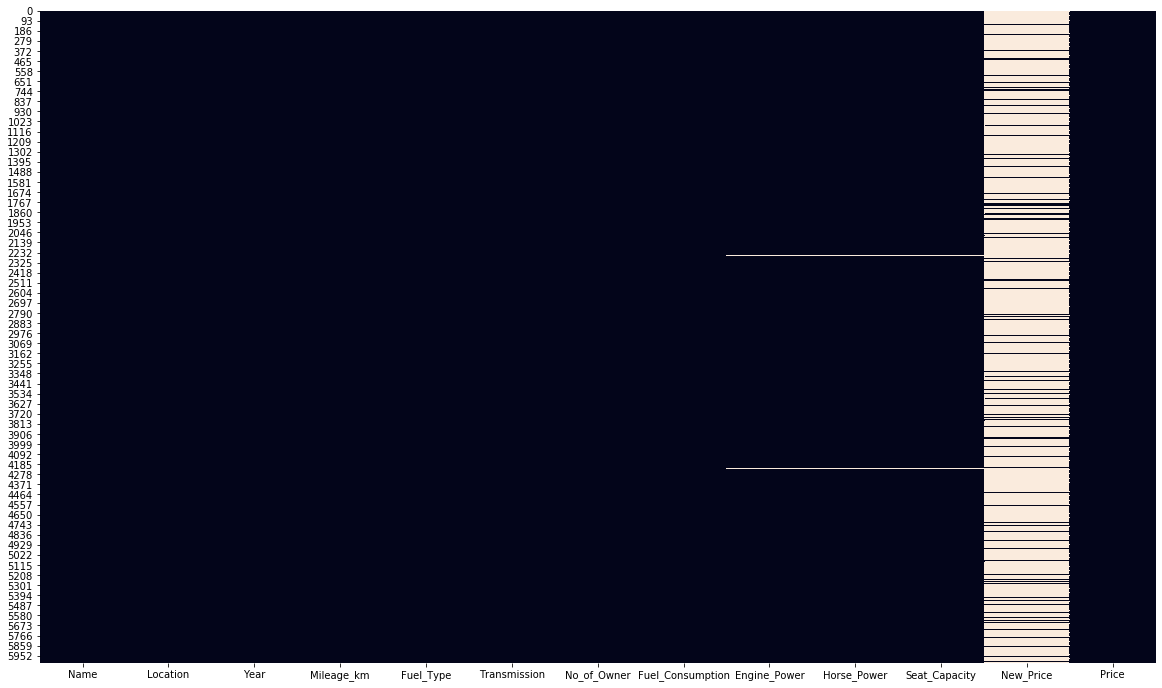

In [8]:
#using a seaborn heatmap to give visualization view on missing value ration
plt.figure(figsize=(20,12))
sns.heatmap(data.isnull(),cbar=False)

In [9]:
#The shape of the data - How many rows and columns in the original dataset
data.shape

(6019, 13)

In [10]:
#To check any duplicated data
data.duplicated().sum()

0

#### Here to list out all the unique naming/values of the selected columns for me to have an early inspection of the dataset.

1) "Name" Column

In [11]:
data["Name"].unique()

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Volkswagen Polo IPL II 1.2 Petrol Highline',
       'Tata Bolt Revotron XT', 'Mahindra Xylo D4 BSIV'], dtype=object)

In [12]:
data["Name"].nunique(dropna=False)

1876

In [13]:
data["Name"].value_counts()

Mahindra XUV500 W8 2WD                                         49
Maruti Swift VDI                                               45
Honda City 1.5 S MT                                            34
Maruti Swift Dzire VDI                                         34
Maruti Swift VDI BSIV                                          31
Maruti Ritz VDi                                                30
Hyundai i10 Sportz                                             30
Toyota Fortuner 3.0 Diesel                                     29
Hyundai Grand i10 Sportz                                       27
Honda Amaze S i-Dtech                                          27
Maruti Ertiga VDI                                              25
Honda Brio S MT                                                25
Honda City 1.5 V MT                                            24
Hyundai Verna 1.6 SX                                           23
Maruti Wagon R VXI                                             23
Maruti Wag

2) "Location" Column

In [14]:
data["Location"].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [15]:
data["Location"].nunique(dropna=False)

11

In [16]:
data["Location"].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

3) "Year" Column

In [17]:
data["Year"].unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998])

In [18]:
data["Year"].nunique(dropna=False)

22

In [19]:
data["Year"].value_counts()

2014    797
2015    744
2016    741
2013    649
2017    587
2012    580
2011    466
2010    342
2018    298
2009    198
2008    174
2007    125
2019    102
2006     78
2005     57
2004     31
2003     17
2002     15
2001      8
1998      4
2000      4
1999      2
Name: Year, dtype: int64

4) "Fuel_Type" Column

In [20]:
data["Fuel_Type"].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [21]:
data["Fuel_Type"].nunique(dropna=False)

5

In [22]:
data["Fuel_Type"].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

5) "Transmission" Column

In [23]:
data["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [24]:
data["Transmission"].nunique(dropna=False)

2

In [25]:
data["Transmission"].value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

6) "No_of_Owner" Column

In [26]:
data["No_of_Owner"].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [27]:
data["No_of_Owner"].nunique(dropna=False)

4

In [28]:
data["No_of_Owner"].value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: No_of_Owner, dtype: int64

7) "Engine_Power" Column

In [29]:
data["Engine_Power"].unique()

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '1950 CC', '4806 CC', '1998 CC', '1086 CC',
       '1193 CC', '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC',
       '1799 CC', '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC',
       '2894 CC', '5461 CC', '1595 CC', '936 CC', '1997 CC', nan,
       '1896 CC', '1390 CC', '1364 CC', '2199 CC', '993 CC', '999 CC',
       '1405 CC', '2956 CC', '1794 CC', '995 CC', '2496 CC', '1599 CC',
       '2400 CC', '1495 CC', '2523 CC', '793 CC', '4134 CC', '1596 CC',
       '1395 CC', '2953 CC', '1586 CC', '2362 CC', '1496 CC', '1368

In [30]:
data["Engine_Power"].nunique(dropna=False)

147

In [31]:
data["Engine_Power"].value_counts()

1197 CC    606
1248 CC    512
1498 CC    304
998 CC     259
2179 CC    240
1497 CC    229
1198 CC    227
1968 CC    216
1995 CC    183
1461 CC    152
2143 CC    149
1582 CC    145
1199 CC    143
1598 CC    141
1396 CC    139
796 CC     129
2494 CC    121
1086 CC    108
1591 CC     94
2993 CC     90
1399 CC     88
2982 CC     86
1798 CC     85
2987 CC     67
2967 CC     61
814 CC      59
1120 CC     54
1196 CC     50
1373 CC     47
1493 CC     47
1364 CC     47
2354 CC     41
1298 CC     39
2755 CC     38
799 CC      36
1991 CC     33
1799 CC     32
1896 CC     32
1061 CC     30
999 CC      29
1998 CC     28
1496 CC     25
1796 CC     25
624 CC      25
2393 CC     24
1193 CC     23
1586 CC     23
936 CC      21
1499 CC     21
1997 CC     21
1794 CC     20
1405 CC     19
2148 CC     19
1999 CC     18
2523 CC     17
2199 CC     17
1984 CC     17
2498 CC     16
3198 CC     15
1495 CC     15
2499 CC     14
993 CC      14
1186 CC     14
1956 CC     14
2696 CC     13
2497 CC     12
3498 CC   

8) "Horse_Power" Column

In [32]:
data["Horse_Power"].unique()

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp',
       'null bhp', '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp',
       '218 bhp', '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp',
       '82.85 bhp', '67 bhp', '241.4 bhp', '3

In [33]:
data["Horse_Power"].nunique(dropna=False)

373

In [34]:
data["Horse_Power"].value_counts()

74 bhp         235
98.6 bhp       131
73.9 bhp       125
140 bhp        123
78.9 bhp       111
null bhp       107
67.1 bhp       107
67.04 bhp      107
82 bhp         101
88.5 bhp       100
117.3 bhp       93
118 bhp         90
121.3 bhp       88
190 bhp         79
126.2 bhp       78
170 bhp         77
88.7 bhp        75
70 bhp          75
80 bhp          74
86.8 bhp        74
174.33 bhp      71
81.86 bhp       71
103.6 bhp       69
81.83 bhp       68
68 bhp          62
68.05 bhp       61
85.8 bhp        59
184 bhp         58
88.8 bhp        57
102 bhp         57
120 bhp         57
55.2 bhp        56
100 bhp         55
90 bhp          52
108.45 bhp      50
126.32 bhp      49
88.73 bhp       48
47.3 bhp        48
168.5 bhp       47
88.76 bhp       45
67 bhp          45
81.80 bhp       44
138.1 bhp       44
83.1 bhp        44
86.7 bhp        43
46.3 bhp        42
75 bhp          40
241.4 bhp       40
89.84 bhp       40
83.8 bhp        39
100.6 bhp       39
258 bhp         38
108.5 bhp   

9) "Seat_Capacity" Column

In [35]:
data["Seat_Capacity"].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [36]:
data["Seat_Capacity"].nunique(dropna=False)

10

In [37]:
data["Seat_Capacity"].value_counts()

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seat_Capacity, dtype: int64

# Data Cleaning

- Removes duplicate and irrelevant data
- Fix corrupted and structural data
- Filter unwanted outliers and utilize useful data
- Handling missing Value

### Split the name to brand and model for more in depth understanding

In [38]:
#Name Spliting
split_Name = data["Name"].str.split(" ", n = 1, expand = True)
split_Name.head()

0                           1
0   Maruti             Wagon R LXI CNG
1  Hyundai    Creta 1.6 CRDi SX Option
2    Honda                      Jazz V
3   Maruti                  Ertiga VDI
4     Audi  A4 New 2.0 TDI Multitronic

In [39]:
data["Brand"] = split_Name[0]
data["Model"] = split_Name[1]

data.head()

Name    Location  Year  Mileage_km Fuel_Type Transmission No_of_Owner Fuel_Consumption Engine_Power Horse_Power  Seat_Capacity  New_Price  Price    Brand                       Model
0            Maruti Wagon R LXI CNG      Mumbai  2010       72000       CNG       Manual       First       26.6 km/kg       998 CC   58.16 bhp            5.0        NaN   1.75   Maruti             Wagon R LXI CNG
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015       41000    Diesel       Manual       First       19.67 kmpl      1582 CC   126.2 bhp            5.0        NaN  12.50  Hyundai    Creta 1.6 CRDi SX Option
2                      Honda Jazz V     Chennai  2011       46000    Petrol       Manual       First        18.2 kmpl      1199 CC    88.7 bhp            5.0  8.61 Lakh   4.50    Honda                      Jazz V
3                 Maruti Ertiga VDI     Chennai  2012       87000    Diesel       Manual       First       20.77 kmpl      1248 CC   88.76 bhp            7.0        NaN   6.00   Maruti                  Ertiga VDI
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013       40670    Diesel    Automatic      Second        15.2 kmpl      1968 CC   140.8 bhp            5.0        NaN  17.74     Audi  A4 New 2.0 TDI Multitronic

In [40]:
data["Brand"].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Bentley             1
Isuzu               1
Lamborghini         1
Smart               1
Ambassador          1
Name: Brand, dtype: int64

In [41]:
data.Brand.nunique()

31

## **Brand Column

I noticed a few odd naming from the Brand names, such as:
- Land --> The actual brand naming should be "Land Rover"
- There are 2 Isuzu just upper/lowercase difference

After inspection and research, there is only 1 car distributor of Isuzu so decided to do something about it. Instead of cleaning up the data one by one, changing all letters to lowercase.

In [42]:
data["Brand"] = data["Brand"].str.lower()

In [43]:
data.head()

Name    Location  Year  Mileage_km Fuel_Type Transmission No_of_Owner Fuel_Consumption Engine_Power Horse_Power  Seat_Capacity  New_Price  Price    Brand                       Model
0            Maruti Wagon R LXI CNG      Mumbai  2010       72000       CNG       Manual       First       26.6 km/kg       998 CC   58.16 bhp            5.0        NaN   1.75   maruti             Wagon R LXI CNG
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015       41000    Diesel       Manual       First       19.67 kmpl      1582 CC   126.2 bhp            5.0        NaN  12.50  hyundai    Creta 1.6 CRDi SX Option
2                      Honda Jazz V     Chennai  2011       46000    Petrol       Manual       First        18.2 kmpl      1199 CC    88.7 bhp            5.0  8.61 Lakh   4.50    honda                      Jazz V
3                 Maruti Ertiga VDI     Chennai  2012       87000    Diesel       Manual       First       20.77 kmpl      1248 CC   88.76 bhp            7.0        NaN   6.00   maruti                  Ertiga VDI
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013       40670    Diesel    Automatic      Second        15.2 kmpl      1968 CC   140.8 bhp            5.0        NaN  17.74     audi  A4 New 2.0 TDI Multitronic

Renamed the Brand "land" to "land rover" instead after inspect the original name column and confirmed.

In [44]:
data[data.Brand.str.contains('land')].head()

Name    Location  Year  Mileage_km Fuel_Type Transmission No_of_Owner Fuel_Consumption Engine_Power Horse_Power  Seat_Capacity New_Price  Price Brand                           Model
13      Land Rover Range Rover 2.2L Pure       Delhi  2014       72000    Diesel    Automatic       First        12.7 kmpl      2179 CC   187.7 bhp            5.0       NaN  27.00  land     Rover Range Rover 2.2L Pure
14        Land Rover Freelander 2 TD4 SE        Pune  2012       85000    Diesel    Automatic      Second         0.0 kmpl      2179 CC     115 bhp            5.0       NaN  17.50  land       Rover Freelander 2 TD4 SE
191  Land Rover Range Rover 2.2L Dynamic  Coimbatore  2018       36091    Diesel    Automatic       First        12.7 kmpl      2179 CC   187.7 bhp            5.0       NaN  55.76  land  Rover Range Rover 2.2L Dynamic
311   Land Rover Range Rover HSE Dynamic       Delhi  2017       44000    Diesel    Automatic       First        12.7 kmpl      2179 CC   187.7 bhp            5.0       NaN  44.00  land   Rover Range Rover HSE Dynamic
399  Land Rover Range Rover 2.2L Dynamic   Hyderabad  2012       56000    Diesel    Automatic       First        12.7 kmpl      2179 CC   187.7 bhp            5.0       NaN  30.00  land  Rover Range Rover 2.2L Dynamic

In [45]:
data["Brand"] = data.Brand.replace('land', 'land rover')

In [46]:
data["Brand"].value_counts()

maruti           1211
hyundai          1107
honda             608
toyota            411
mercedes-benz     318
volkswagen        315
ford              300
mahindra          272
bmw               267
audi              236
tata              186
skoda             173
renault           145
chevrolet         121
nissan             91
land rover         60
jaguar             40
fiat               28
mitsubishi         27
mini               26
volvo              21
porsche            18
jeep               15
datsun             13
isuzu               3
force               3
bentley             1
ambassador          1
smart               1
lamborghini         1
Name: Brand, dtype: int64

In [47]:
data.Brand.nunique()

30

Now we have down to 30 brands from previous 31 brands.

At the same time, I decided to clean up the Model naming for Land Model by removing the word "Rover"from the string. It may not be important but can't be sure if the naming will affects the feature selections hence decided to just clean it up. 

In [48]:
#Overview on the rows that Model value starts with the wording 'Rover'
data[data.Model.str.startswith('Rover')].head()

Name    Location  Year  Mileage_km Fuel_Type Transmission No_of_Owner Fuel_Consumption Engine_Power Horse_Power  Seat_Capacity New_Price  Price       Brand                           Model
13      Land Rover Range Rover 2.2L Pure       Delhi  2014       72000    Diesel    Automatic       First        12.7 kmpl      2179 CC   187.7 bhp            5.0       NaN  27.00  land rover     Rover Range Rover 2.2L Pure
14        Land Rover Freelander 2 TD4 SE        Pune  2012       85000    Diesel    Automatic      Second         0.0 kmpl      2179 CC     115 bhp            5.0       NaN  17.50  land rover       Rover Freelander 2 TD4 SE
191  Land Rover Range Rover 2.2L Dynamic  Coimbatore  2018       36091    Diesel    Automatic       First        12.7 kmpl      2179 CC   187.7 bhp            5.0       NaN  55.76  land rover  Rover Range Rover 2.2L Dynamic
311   Land Rover Range Rover HSE Dynamic       Delhi  2017       44000    Diesel    Automatic       First        12.7 kmpl      2179 CC   187.7 bhp            5.0       NaN  44.00  land rover   Rover Range Rover HSE Dynamic
399  Land Rover Range Rover 2.2L Dynamic   Hyderabad  2012       56000    Diesel    Automatic       First        12.7 kmpl      2179 CC   187.7 bhp            5.0       NaN  30.00  land rover  Rover Range Rover 2.2L Dynamic

In [49]:
#Calculate the numbers of the rows that has the wording starts with 'Rover'
data.Model.str.startswith('Rover').sum()

60

In [50]:
#Double check if there are any value under Model column that contains the keyword 'Rover'
data[data.Model.str.contains('Rover')].head()

Name    Location  Year  Mileage_km Fuel_Type Transmission No_of_Owner Fuel_Consumption Engine_Power Horse_Power  Seat_Capacity New_Price  Price       Brand                           Model
13      Land Rover Range Rover 2.2L Pure       Delhi  2014       72000    Diesel    Automatic       First        12.7 kmpl      2179 CC   187.7 bhp            5.0       NaN  27.00  land rover     Rover Range Rover 2.2L Pure
14        Land Rover Freelander 2 TD4 SE        Pune  2012       85000    Diesel    Automatic      Second         0.0 kmpl      2179 CC     115 bhp            5.0       NaN  17.50  land rover       Rover Freelander 2 TD4 SE
191  Land Rover Range Rover 2.2L Dynamic  Coimbatore  2018       36091    Diesel    Automatic       First        12.7 kmpl      2179 CC   187.7 bhp            5.0       NaN  55.76  land rover  Rover Range Rover 2.2L Dynamic
311   Land Rover Range Rover HSE Dynamic       Delhi  2017       44000    Diesel    Automatic       First        12.7 kmpl      2179 CC   187.7 bhp            5.0       NaN  44.00  land rover   Rover Range Rover HSE Dynamic
399  Land Rover Range Rover 2.2L Dynamic   Hyderabad  2012       56000    Diesel    Automatic       First        12.7 kmpl      2179 CC   187.7 bhp            5.0       NaN  30.00  land rover  Rover Range Rover 2.2L Dynamic

In [51]:
#Calculate the numbers any value under Model column that contains the keyword 'Rover'
data.Model.str.contains('Rover').sum()

60

After the above inspection, because there are valus that actually contain the keyword 'Rover' so I can't simply use the .replace to remove the keyword. Instead I have to use regex as one of the option to only remove keyword 'Rover' that is on the first character on the string under Model column.

In [52]:
#using regex to remove the first word of the keyword 'Rover' under "Model column".
data["Model"] = data.Model.replace('^Rover ','', regex=True)

In [53]:
#After run the code to remove the keyword, inspect if there still have str that contains shouldn't be removed.
data.Model.str.contains('Rover').sum()

31

In [54]:
#Inspect if there are still have any value that starts with the keyword "Rover" that were not properly removed.
data.Model.str.startswith('Rover').sum()

0

In [55]:
data.loc[data.Brand.str.contains('Rover')].head()

Empty DataFrame
Columns: [Name, Location, Year, Mileage_km, Fuel_Type, Transmission, No_of_Owner, Fuel_Consumption, Engine_Power, Horse_Power, Seat_Capacity, New_Price, Price, Brand, Model]
Index: []

Can confirmed that there is no more string that **start with** the word of "Rover" under Model column.

## **Model Column

### Next, I want to inspect the Model names.

In [56]:
data["Model"].value_counts()

XUV500 W8 2WD                                              49
Swift VDI                                                  45
City 1.5 S MT                                              34
Swift Dzire VDI                                            34
Swift VDI BSIV                                             31
i10 Sportz                                                 30
Ritz VDi                                                   30
Fortuner 3.0 Diesel                                        29
Grand i10 Sportz                                           27
Amaze S i-Dtech                                            27
Ertiga VDI                                                 25
Brio S MT                                                  25
City 1.5 V MT                                              24
Wagon R VXI                                                23
Verna 1.6 SX                                               23
Wagon R LXI                                                22
Alto LXi

In [57]:
data.Model.nunique()

1876

As we can see, there are 1876 different models in this dataset from the value counts above. However while browsing through the listing, I happened to see a few model seems to be same model but naming different.
<br>
For example,<br>
- **Swift Dzire VDi** under Maruti brand, I also found another the model naming as **"Swift Dzire VDI"** with the I as capital letter compare to the earlier naming. <br>
- Another example I found that is **"Alto LXI"** and **"Alto LXi"** <br>

Let's take a closer look of these 2 examples:



In [58]:
data[data.Model.str.contains("Swift Dzire VDi")]

Name   Location  Year  Mileage_km Fuel_Type Transmission No_of_Owner Fuel_Consumption Engine_Power Horse_Power  Seat_Capacity New_Price  Price   Brand            Model
322   Maruti Swift Dzire VDi    Kolkata  2012       48000    Diesel       Manual       First        19.3 kmpl      1248 CC    73.9 bhp            5.0       NaN   3.70  maruti  Swift Dzire VDi
594   Maruti Swift Dzire VDi  Hyderabad  2011       81759    Diesel       Manual       First        19.3 kmpl      1248 CC    73.9 bhp            5.0       NaN   4.39  maruti  Swift Dzire VDi
916   Maruti Swift Dzire VDi  Hyderabad  2010      130000    Diesel       Manual       First        19.3 kmpl      1248 CC    73.9 bhp            5.0       NaN   3.65  maruti  Swift Dzire VDi
1736  Maruti Swift Dzire VDi     Jaipur  2010       71000    Diesel       Manual       First        19.3 kmpl      1248 CC    73.9 bhp            5.0       NaN   3.30  maruti  Swift Dzire VDi
2583  Maruti Swift Dzire VDi    Kolkata  2015       35000    Diesel       Manual       First        19.3 kmpl      1248 CC    73.9 bhp            5.0       NaN   4.75  maruti  Swift Dzire VDi
2643  Maruti Swift Dzire VDi  Hyderabad  2009       88096    Diesel       Manual      Second        19.3 kmpl      1248 CC    73.9 bhp            5.0       NaN   3.50  maruti  Swift Dzire VDi
2731  Maruti Swift Dzire VDi       Pune  2009       90000    Diesel       Manual      Second        19.3 kmpl      1248 CC    73.9 bhp            5.0       NaN   3.00  maruti  Swift Dzire VDi
3133  Maruti Swift Dzire VDi  Hyderabad  2013       83327    Diesel       Manual       First        19.3 kmpl      1248 CC    73.9 bhp            5.0       NaN   5.80  maruti  Swift Dzire VDi
3206  Maruti Swift Dzire VDi     Jaipur  2010      130000    Diesel       Manual      Second        19.3 kmpl      1248 CC    73.9 bhp            5.0       NaN   4.00  maruti  Swift Dzire VDi
3855  Maruti Swift Dzire VDi     Jaipur  2014       65000    Diesel       Manual       First        19.3 kmpl      1248 CC    73.9 bhp            5.0       NaN   5.31  maruti  Swift Dzire VDi
3896  Maruti Swift Dzire VDi  Hyderabad  2010      130000    Diesel       Manual       First        19.3 kmpl      1248 CC    73.9 bhp            5.0       NaN   3.85  maruti  Swift Dzire VDi
4160  Maruti Swift Dzire VDi  Hyderabad  2014      123900    Diesel       Manual       First        19.3 kmpl      1248 CC    73.9 bhp            5.0       NaN   5.40  maruti  Swift Dzire VDi
5014  Maruti Swift Dzire VDi     Jaipur  2011      110000    Diesel       Manual       First        19.3 kmpl      1248 CC    73.9 bhp            5.0       NaN   3.50  maruti  Swift Dzire VDi
5085  Maruti Swift Dzire VDi    Kolkata  2009       34000    Diesel       Manual       First        19.3 kmpl      1248 CC    73.9 bhp            5.0       NaN   2.19  maruti  Swift Dzire VDi
5520  Maruti Swift Dzire VDi     Jaipur  2012       72000    Diesel       Manual       First        19.3 kmpl      1248 CC    73.9 bhp            5.0       NaN   4.25  maruti  Swift Dzire VDi
5739  Maruti Swift Dzire VDi  Hyderabad  2014       76126    Diesel       Manual       First        19.3 kmpl      1248 CC    73.9 bhp            5.0       NaN   6.60  maruti  Swift Dzire VDi

In [59]:
data.Model.str.contains("Swift Dzire VDi").value_counts()

False    6003
True       16
Name: Model, dtype: int64

In [60]:
data[data.Model.str.contains("Swift Dzire VDI")].head()

Name    Location  Year  Mileage_km Fuel_Type Transmission No_of_Owner Fuel_Consumption Engine_Power Horse_Power  Seat_Capacity New_Price  Price   Brand                     Model
567            Maruti Swift Dzire VDI  Coimbatore  2016       38461    Diesel       Manual       First       26.59 kmpl      1248 CC      74 bhp            5.0       NaN   7.39  maruti           Swift Dzire VDI
674            Maruti Swift Dzire VDI      Jaipur  2015       60000    Diesel       Manual       First       26.59 kmpl      1248 CC      74 bhp            5.0       NaN   6.25  maruti           Swift Dzire VDI
804            Maruti Swift Dzire VDI        Pune  2013       88000    Diesel       Manual       First        23.4 kmpl      1248 CC      74 bhp            5.0       NaN   4.75  maruti           Swift Dzire VDI
1018  Maruti Swift Dzire VDI Optional       Kochi  2019       18592    Diesel       Manual       First       26.59 kmpl      1248 CC      74 bhp            5.0       NaN   8.51  maruti  Swift Dzire VDI Optional
1069           Maruti Swift Dzire VDI     Kolkata  2014       45000    Diesel       Manual       First        23.4 kmpl      1248 CC      74 bhp            5.0       NaN   3.85  maruti           Swift Dzire VDI

In [61]:
data.Model.str.contains("Swift Dzire VDI").value_counts()

False    5981
True       38
Name: Model, dtype: int64

There are 16 strings named as **"Swift Dzire VDi"** and a number 38 named as **"Swift Dzire VDI"** with the last 'I' as big letter. That's a total of 54rows could possibly combine under 1 model instead by rename the model. <br>
<br>
After inspect and research, it is confirmed that there is only 1 actual model named **"Maruti Swift Dzire VDI"** on the market. That being said, it was entry mistake for this model naming. Proceed to combine these 2 naming value into 1 as **"Swift Dzire VDI"**.

In [62]:
data["Model"] = data.Model.replace('Swift Dzire VDi', 'Swift Dzire VDI')

In [63]:
#Inspect the changes
data.Model.str.contains("Swift Dzire VDi").value_counts()

False    6019
Name: Model, dtype: int64

In [64]:
data.Model.str.contains("Swift Dzire VDI").value_counts()

False    5965
True       54
Name: Model, dtype: int64

As we can see above, "Swift Dzire VDi" is no longer exist in the dataset as there are no True value. Where "Swift Dzire VDI" has 54 True value compare to the precious check of 38. That means there are 16 values has been successfully updated.

#### Let's do the same for the other example **"Alto LXI"** and **"Alto LXi"**

In [65]:
data[data.Model.str.contains("Alto LXI")]

Name   Location  Year  Mileage_km Fuel_Type Transmission No_of_Owner Fuel_Consumption Engine_Power Horse_Power  Seat_Capacity New_Price  Price   Brand     Model
4781  Maruti Alto LXI  Hyderabad  2007       52195    Petrol       Manual       First        19.7 kmpl       796 CC    46.3 bhp            5.0       NaN   1.75  maruti  Alto LXI

In [66]:
data.Model.str.contains("Alto LXI").value_counts()

False    6018
True        1
Name: Model, dtype: int64

In [67]:
data[data.Model.str.contains("Alto LXi")]

Name    Location  Year  Mileage_km Fuel_Type Transmission No_of_Owner Fuel_Consumption Engine_Power Horse_Power  Seat_Capacity New_Price  Price   Brand           Model
40          Maruti Alto LXi       Delhi  2008       90000    Petrol       Manual      Second        19.7 kmpl       796 CC    46.3 bhp            5.0       NaN   1.25  maruti        Alto LXi
136   Maruti Alto LXi BSIII     Chennai  2010       94385    Petrol       Manual      Second        19.7 kmpl       796 CC    46.3 bhp            5.0       NaN   1.60  maruti  Alto LXi BSIII
335         Maruti Alto LXi   Ahmedabad  2009       35000    Petrol       Manual       First        19.7 kmpl       796 CC    46.3 bhp            5.0       NaN   1.50  maruti        Alto LXi
337         Maruti Alto LXi     Chennai  2006       56000    Petrol       Manual      Second        19.7 kmpl       796 CC    46.3 bhp            5.0       NaN   1.40  maruti        Alto LXi
339         Maruti Alto LXi        Pune  2012       38000    Petrol       Manual       First        19.7 kmpl       796 CC    46.3 bhp            5.0       NaN   2.25  maruti        Alto LXi
758   Maruti Alto LXi BSIII   Hyderabad  2012       67147    Petrol       Manual       First        19.7 kmpl       796 CC    46.3 bhp            5.0       NaN   2.60  maruti  Alto LXi BSIII
1075  Maruti Alto LXi BSIII   Hyderabad  2009       35000    Petrol       Manual       First        19.7 kmpl       796 CC    46.3 bhp            5.0       NaN   1.70  maruti  Alto LXi BSIII
1358        Maruti Alto LXi  Coimbatore  2012       49008    Petrol       Manual       First        19.7 kmpl       796 CC    46.3 bhp            5.0       NaN   2.88  maruti        Alto LXi
1401        Maruti Alto LXi  Coimbatore  2010       48105    Petrol       Manual       First        19.7 kmpl       796 CC    46.3 bhp            5.0       NaN   3.10  maruti        Alto LXi
1563  Maruti Alto LXi BSIII  Coimbatore  2010       59136    Petrol       Manual       First        19.7 kmpl       796 CC    46.3 bhp            5.0       NaN   2.96  maruti  Alto LXi BSIII
1745  Maruti Alto LXi BSIII      Jaipur  2010       73513    Petrol       Manual       First        19.7 kmpl       796 CC    46.3 bhp            5.0       NaN   1.85  maruti  Alto LXi BSIII
1937        Maruti Alto LXi     Chennai  2008       65000    Petrol       Manual       First        19.7 kmpl       796 CC    46.3 bhp            5.0       NaN   1.59  maruti        Alto LXi
1964  Maruti Alto LXi BSIII   Hyderabad  2006       71993    Petrol       Manual       First        19.7 kmpl       796 CC    46.3 bhp            5.0       NaN   1.80  maruti  Alto LXi BSIII
2051        Maruti Alto LXi     Chennai  2011       75000    Petrol       Manual       First        19.7 kmpl       796 CC    46.3 bhp            5.0       NaN   2.10  maruti        Alto LXi
2116        Maruti Alto LXi   Hyderabad  2011       76976    Petrol       Manual      Second        19.7 kmpl       796 CC    46.3 bhp            5.0       NaN   2.15  maruti        Alto LXi
2181        Maruti Alto LXi      Mumbai  2008       26299    Petrol       Manual       First        19.7 kmpl       796 CC    46.3 bhp            5.0       NaN   1.20  maruti        Alto LXi
2307  Maruti Alto LXi BSIII     Chennai  2008       68000    Petrol       Manual       Third        19.7 kmpl       796 CC    46.3 bhp            5.0       NaN   1.20  maruti  Alto LXi BSIII
2481        Maruti Alto LXi   Hyderabad  2007       76161    Petrol       Manual       First        19.7 kmpl       796 CC    46.3 bhp            5.0       NaN   1.65  maruti        Alto LXi
2781        Maruti Alto LXi     Kolkata  2010       38127    Petrol       Manual       First        19.7 kmpl       796 CC    46.3 bhp            5.0       NaN   1.55  maruti        Alto LXi
2991  Maruti Alto LXi BSIII   Hyderabad  2008       66000    Petrol       Manual       First        19.7 kmpl       796 CC    46.3 bhp            5.0       NaN   1.70  maruti  Alto LXi BSIII
3276        

In [68]:
data.Model.str.contains("Alto LXi").value_counts()

False    5984
True       35
Name: Model, dtype: int64

In [69]:
data["Model"] = data.Model.replace('Alto LXi', 'Alto LXI')

In [70]:
#Inspect the changes
data.Model.str.contains("Alto LXi").value_counts()

False    6005
True       14
Name: Model, dtype: int64

In [71]:
data.Model.str.contains("Alto LXI").value_counts()

False    5997
True       22
Name: Model, dtype: int64

We can see there are some changes on the counts but it did not changed as significant as the previous example combined into 1 final naming value only. This is because **Alto LXI** has many other extended model versions. <br>
<br>
This 2nd example is still a success as we standardized the model names to minimize the changes of duplicating the same model naming.

### From the data cleaning exercise above, I suspecting there will be more same models but different namings due to upper or lowercase, special characters in the Letters. 



In [72]:
pd.DataFrame(data.groupby(["Brand"])["Model"].value_counts())

Model
Brand         Model                                                    
ambassador    Classic Nova Diesel                                     1
audi          A4 2.0 TDI                                             17
              A4 2.0 TDI 177 Bhp Premium Plus                        15
              A6 2011-2015 2.0 TDI Premium Plus                      13
              Q7 3.0 TDI Quattro Premium Plus                        12
              A4 2.0 TDI Multitronic                                 10
              A4 New 2.0 TDI Multitronic                              7
              A4 35 TDI Premium                                       6
              A6 2.7 TDI                                              6
              Q5 2.0 TDI Premium Plus                                 6
              Q7 4.2 TDI Quattro Technology                           6
              A6 2011-2015 2.0 TDI                                    5
              A6 2011-2015 35 TDI Technology                          5
              A6 3.0 TDI quattro                                      5
              Q3 35 TDI Quattro Premium Plus                          5
              Q5 2008-2012 2.0 TDI                                    5
              Q5 30 TDI quattro Premium Plus                          5
              Q7 3.0 TDI Quattro Technology                           5
              Q7 35 TDI Quattro Technology                            5
              A6 35 TDI Matrix                                        4
              Q3 2.0 TDI                                              4
              Q3 2012-2015 2.0 TDI Quattro Premium Plus               4
              Q3 35 TDI Quattro Premium                               4
              A4 35 TDI Premium Plus                                  3
              A6 2.0 TDI Design Edition                               3
              Q3 2.0 TDI Quattro                                      3
              Q3 2012-2015 35 TDI Quattro Premium Plus                3
              Q5 2.0 TDI                                              3
              Q5 3.0 TDI Quattro Technology                           3
              Q7 3.0 TDI quattro                                      3
              Q7 45 TDI Quattro Technology                            3
              A4 1.8 TFSI                                             2
              A4 2.0 TDI 177 Bhp Technology Edition                   2
              A4 2.0 TDI Premium Sport Limited Edition                2
              A4 3.0 TDI Quattro                                      2
              A4 3.0 TDI Quattro Premium                              2
              A4 35 TDI Technology                                    2
              A4 35 TDI Technology Edition                            2
              A6 2011-2015 35 TFSI Technology                         2
              A6 35 TFSI Matrix                                       2
              A7 2011-2015 3.0 TDI Quattro                            2
              A8 L 3.0 TDI quattro                                    2
              Q3 2012-2015 35 TDI Quattro Premium                     2
              Q3 30 TDI Premium FWD                                   2
              Q5 2008-2012 2.0 TFSI Quattro                           2
              Q5 3.0 TDI Quattro                                      2
              Q5 30 TDI quattro Premium                               2
              Q7 35 TDI Quattro Premium Plus                          2
              RS5 Coupe                                               2
              TT 2.0 TFSI                                             2
              A3 35 TDI Attraction                                    1
              A3 35 TDI Premium                                       1
              A3 35 TDI Premium Plus                                  1
              A3 35 TDI Technology                                    1
              A4 1.8 TFSI Technolo

#### It is too much for me to go through the dataset one by one to inspect, I need to use a more efficient/quicker method that allows me to standardize the Model name columns so they can be categoried more accurately.

For that, I find that removing all special characters/symbols will be first step that I can take. So that the data of the Model name will be much easier to match without any special letters that confused the program.

In [73]:
#We now have 1874 unique values under the Model columns
data["Model"].nunique()

1874

In [74]:
data["Model"] = data.Model.str.replace('[/\()_-]','')

In [75]:
pd.DataFrame(data.groupby(["Brand"])["Model"].value_counts())

Model
Brand         Model                                                    
ambassador    Classic Nova Diesel                                     1
audi          A4 2.0 TDI                                             17
              A4 2.0 TDI 177 Bhp Premium Plus                        15
              A6 20112015 2.0 TDI Premium Plus                       13
              Q7 3.0 TDI Quattro Premium Plus                        12
              A4 2.0 TDI Multitronic                                 10
              A4 New 2.0 TDI Multitronic                              7
              A4 35 TDI Premium                                       6
              A6 2.7 TDI                                              6
              Q5 2.0 TDI Premium Plus                                 6
              Q7 4.2 TDI Quattro Technology                           6
              A6 20112015 2.0 TDI                                     5
              A6 20112015 35 TDI Technology                           5
              A6 3.0 TDI quattro                                      5
              Q3 35 TDI Quattro Premium Plus                          5
              Q5 20082012 2.0 TDI                                     5
              Q5 30 TDI quattro Premium Plus                          5
              Q7 3.0 TDI Quattro Technology                           5
              Q7 35 TDI Quattro Technology                            5
              A6 35 TDI Matrix                                        4
              Q3 2.0 TDI                                              4
              Q3 20122015 2.0 TDI Quattro Premium Plus                4
              Q3 35 TDI Quattro Premium                               4
              A4 35 TDI Premium Plus                                  3
              A6 2.0 TDI Design Edition                               3
              Q3 2.0 TDI Quattro                                      3
              Q3 20122015 35 TDI Quattro Premium Plus                 3
              Q5 2.0 TDI                                              3
              Q5 3.0 TDI Quattro Technology                           3
              Q7 3.0 TDI quattro                                      3
              Q7 45 TDI Quattro Technology                            3
              A4 1.8 TFSI                                             2
              A4 2.0 TDI 177 Bhp Technology Edition                   2
              A4 2.0 TDI Premium Sport Limited Edition                2
              A4 3.0 TDI Quattro                                      2
              A4 3.0 TDI Quattro Premium                              2
              A4 35 TDI Technology                                    2
              A4 35 TDI Technology Edition                            2
              A6 20112015 35 TFSI Technology                          2
              A6 35 TFSI Matrix                                       2
              A7 20112015 3.0 TDI Quattro                             2
              A8 L 3.0 TDI quattro                                    2
              Q3 20122015 35 TDI Quattro Premium                      2
              Q3 30 TDI Premium FWD                                   2
              Q5 20082012 2.0 TFSI Quattro                            2
              Q5 3.0 TDI Quattro                                      2
              Q5 30 TDI quattro Premium                               2
              Q7 35 TDI Quattro Premium Plus                          2
              RS5 Coupe                                               2
              TT 2.0 TFSI                                             2
              A3 35 TDI Attraction                                    1
              A3 35 TDI Premium                                       1
              A3 35 TDI Premium Plus                                  1
              A3 35 TDI Technology                                    1
              A4 1.8 TFSI Technolo

In [76]:
data[data.Model.str.contains("Accord 2.4 M/T")]

Empty DataFrame
Columns: [Name, Location, Year, Mileage_km, Fuel_Type, Transmission, No_of_Owner, Fuel_Consumption, Engine_Power, Horse_Power, Seat_Capacity, New_Price, Price, Brand, Model]
Index: []

From this above string that has special character search, we can confirmed all the special characters have been removed from the column. <br>


In [77]:
#Let's inspect and see if the unique number under this column decreased.
data["Model"].nunique()

1871

Indeed from originally 1874 and decreased slightly to now 1874. <br>
<br>
Looking back to earlier, upper/lowercase differences of the letter was also a common reason the same model naming ended up be 2 different values. To helps further standardized the value, I decided to lowercase the entire column.

In [78]:
#change all the letters to lowercase to avoid any segregation eventhough they are actually the same model.
data["Model"] = data["Model"].str.lower()

In [79]:
data["Model"].nunique()

1849

In [80]:
data["Model"].value_counts()

swift dzire vdi                                           50
xuv500 w8 2wd                                             49
swift vdi                                                 45
city 1.5 s mt                                             34
swift vdi bsiv                                            31
i10 sportz                                                30
ritz vdi                                                  30
swift dzire vxi                                           29
fortuner 3.0 diesel                                       29
amaze s idtech                                            27
grand i10 sportz                                          27
brio s mt                                                 25
ertiga vdi                                                25
city 1.5 v mt                                             24
wagon r vxi                                               23
verna 1.6 sx                                              23
alto lxi                

Wasn't sure if I should removed the '.' from the string at first, seeing the refinement of the data does reduced the number of Model names I think it will be better to help further reduce the numbers by just letters in the string

In [81]:
data["Model"] = data.Model.str.replace(".",'')

In [82]:
#remove the spacing
data["Model"] = data.Model.str.replace(' ','')

In [83]:
data["Model"].value_counts()

swiftdzirevdi                                     50
xuv500w82wd                                       49
swiftvdi                                          45
city15smt                                         34
swiftvdibsiv                                      31
ritzvdi                                           30
i10sportz                                         30
swiftdzirevxi                                     29
fortuner30diesel                                  29
amazesidtech                                      27
grandi10sportz                                    27
briosmt                                           25
ertigavdi                                         25
city15vmt                                         24
wagonrvxi                                         23
verna16sx                                         23
wagonrlxi                                         22
altolxi                                           22
superbelegance18tsiat                         

In [84]:
data["Model"].nunique()

1842

#### Although in the end there isn't any significant of the reduced for the Model names, any decreased of the number can be consider that my hypothesis is correct regarding there may have model names are the same but they were differenciated by special characters and upper/lowercase reason.

In [85]:
#check and inspect random values 
data[data.Model.str.contains("swift vdi")]

Empty DataFrame
Columns: [Name, Location, Year, Mileage_km, Fuel_Type, Transmission, No_of_Owner, Fuel_Consumption, Engine_Power, Horse_Power, Seat_Capacity, New_Price, Price, Brand, Model]
Index: []

In [86]:
data[data.Model.str.contains("swiftvdi")]

Name    Location  Year  Mileage_km Fuel_Type Transmission No_of_Owner Fuel_Consumption Engine_Power Horse_Power  Seat_Capacity  New_Price  Price   Brand              Model
12            Maruti Swift VDI BSIV      Jaipur  2015       64424    Diesel       Manual       First        25.2 kmpl      1248 CC      74 bhp            5.0        NaN   5.60  maruti       swiftvdibsiv
53                 Maruti Swift VDI       Delhi  2013       65650    Diesel       Manual       First        28.4 kmpl      1248 CC      74 bhp            5.0        NaN   3.85  maruti           swiftvdi
80                 Maruti Swift VDI      Jaipur  2012       95100    Diesel       Manual       First        22.9 kmpl      1248 CC      74 bhp            5.0        NaN   3.75  maruti           swiftvdi
151                Maruti Swift VDI     Chennai  2016       35000    Diesel       Manual       First        22.9 kmpl      1248 CC      74 bhp            5.0        NaN   6.25  maruti           swiftvdi
227           Maruti Swift VDI BSIV       Delhi  2013       47000    Diesel       Manual       First        17.8 kmpl      1248 CC    null bhp            5.0        NaN   4.10  maruti       swiftvdibsiv
260                Maruti Swift VDI        Pune  2012      120000    Diesel       Manual       First        22.9 kmpl      1248 CC      74 bhp            5.0        NaN   3.75  maruti           swiftvdi
275                Maruti Swift VDI   Hyderabad  2018       31025    Diesel       Manual       First        28.4 kmpl      1248 CC      74 bhp            5.0        NaN   7.15  maruti           swiftvdi
308           Maruti Swift VDI BSIV     Kolkata  2011       60020    Diesel       Manual       First        17.8 kmpl      1248 CC    null bhp            5.0        NaN   2.50  maruti       swiftvdibsiv
332           Maruti Swift VDI BSIV   Hyderabad  2015       76496    Diesel       Manual       First        25.2 kmpl      1248 CC      74 bhp            5.0        NaN   6.15  maruti       swiftvdibsiv
505          Maruti Swift Vdi BSIII   Hyderabad  2010       86000    Diesel       Manual      Second        17.8 kmpl      1248 CC      75 bhp            5.0        NaN   3.60  maruti      swiftvdibsiii
574                Maruti Swift VDI     Chennai  2014       35000    Diesel       Manual       First        22.9 kmpl      1248 CC      74 bhp            5.0        NaN   5.25  maruti           swiftvdi
734           Maruti Swift VDI BSIV     Kolkata  2012       52241    Diesel       Manual       First        25.2 kmpl      1248 CC      74 bhp            5.0        NaN   2.90  maruti       swiftvdibsiv
739           Maruti Swift VDI BSIV   Bangalore  2007       60000    Diesel       Manual      Second        17.8 kmpl      1248 CC    null bhp            5.0        NaN   3.40  maruti       swiftvdibsiv
743           Maruti Swift VDI BSIV       Delhi  2015       63000    Diesel       Manual       First        25.2 kmpl      1248 CC      74 bhp            5.0        NaN   4.90  maruti       swiftvdibsiv
1020               Maruti Swift VDI     Kolkata  2012       82000    Diesel       Manual      Second        22.9 kmpl      1248 CC      74 bhp            5.0        NaN   2.50  maruti           swiftvdi
1121  Maruti Swift VDi BSIII W/ ABS        Pune  2015       79000    Diesel       Manual       First        17.8 kmpl      1248 CC      75 bhp            5.0        NaN   5.75  maruti  swiftvdibsiiiwabs
1143          Maruti Swift VDI BSIV   Bangalore  2013       23000    Diesel       Manual       First        17.8 kmpl      1248 CC    null bhp            5.0        NaN   5.60  maruti       swiftvdibsiv
1186          Maruti Swift VDI BSIV      Jaipur  2016       41460    Diesel       Manual       First        25.2 kmpl      1248 CC      74 bhp            5.0        NaN   5.90  maruti       swiftvdibsiv
1247               Maruti Swift VDI       Kochi  2017       34613    Diesel       Manual       First        28.4 kmpl      1248 CC      74 bhp            5.0  7.92 Lakh   6.2

In [87]:
#Randomly inspection of the data row
data.iloc[2759]

Name                Maruti Swift AMT VDI
Location                           Delhi
Year                                2018
Mileage_km                         11500
Fuel_Type                         Diesel
Transmission                   Automatic
No_of_Owner                        First
Fuel_Consumption               28.4 kmpl
Engine_Power                     1248 CC
Horse_Power                       74 bhp
Seat_Capacity                          5
New_Price                            NaN
Price                                7.5
Brand                             maruti
Model                        swiftamtvdi
Name: 2759, dtype: object

## **Year Column

### For the "Year" column in the dataset, I couldn't figure how can it helps with prediction model unless the age of the car could be more useful to tell us some story such as the older the car is the value is lesser and the newer the used car is the value is much better or decent. With that, I proceed to use mathamatical calculation by using the current year - 2020 to deduct the year of each cars.

In [88]:
#To get the age of the car
data["Car_Age"] = 2020 - data["Year"]
data.head()

Name    Location  Year  Mileage_km Fuel_Type Transmission No_of_Owner Fuel_Consumption Engine_Power Horse_Power  Seat_Capacity  New_Price  Price    Brand                  Model  Car_Age
0            Maruti Wagon R LXI CNG      Mumbai  2010       72000       CNG       Manual       First       26.6 km/kg       998 CC   58.16 bhp            5.0        NaN   1.75   maruti           wagonrlxicng       10
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015       41000    Diesel       Manual       First       19.67 kmpl      1582 CC   126.2 bhp            5.0        NaN  12.50  hyundai    creta16crdisxoption        5
2                      Honda Jazz V     Chennai  2011       46000    Petrol       Manual       First        18.2 kmpl      1199 CC    88.7 bhp            5.0  8.61 Lakh   4.50    honda                  jazzv        9
3                 Maruti Ertiga VDI     Chennai  2012       87000    Diesel       Manual       First       20.77 kmpl      1248 CC   88.76 bhp            7.0        NaN   6.00   maruti              ertigavdi        8
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013       40670    Diesel    Automatic      Second        15.2 kmpl      1968 CC   140.8 bhp            5.0        NaN  17.74     audi  a4new20tdimultitronic        7

## Back to the dataset, there are still a few column that doesn't seems to be correct. Using .info() to confirm which are the next few columns should do some cleanings.

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              6019 non-null   object 
 1   Location          6019 non-null   object 
 2   Year              6019 non-null   int64  
 3   Mileage_km        6019 non-null   int64  
 4   Fuel_Type         6019 non-null   object 
 5   Transmission      6019 non-null   object 
 6   No_of_Owner       6019 non-null   object 
 7   Fuel_Consumption  6017 non-null   object 
 8   Engine_Power      5983 non-null   object 
 9   Horse_Power       5983 non-null   object 
 10  Seat_Capacity     5977 non-null   float64
 11  New_Price         824 non-null    object 
 12  Price             6019 non-null   float64
 13  Brand             6019 non-null   object 
 14  Model             6019 non-null   object 
 15  Car_Age           6019 non-null   int64  
dtypes: float64(2), int64(3), object(11)
memory

<div>
<img src="02.png" width="400"/>
</div>

### As squared the problematic columns in the screenshot above, technically Fuel_Consumption, Engine Power, Horse Power and New_Price all these columns should be numerical values but in this dataset they are object/string values instead.

Let's inspect them:

In [90]:
data.head()

Name    Location  Year  Mileage_km Fuel_Type Transmission No_of_Owner Fuel_Consumption Engine_Power Horse_Power  Seat_Capacity  New_Price  Price    Brand                  Model  Car_Age
0            Maruti Wagon R LXI CNG      Mumbai  2010       72000       CNG       Manual       First       26.6 km/kg       998 CC   58.16 bhp            5.0        NaN   1.75   maruti           wagonrlxicng       10
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015       41000    Diesel       Manual       First       19.67 kmpl      1582 CC   126.2 bhp            5.0        NaN  12.50  hyundai    creta16crdisxoption        5
2                      Honda Jazz V     Chennai  2011       46000    Petrol       Manual       First        18.2 kmpl      1199 CC    88.7 bhp            5.0  8.61 Lakh   4.50    honda                  jazzv        9
3                 Maruti Ertiga VDI     Chennai  2012       87000    Diesel       Manual       First       20.77 kmpl      1248 CC   88.76 bhp            7.0        NaN   6.00   maruti              ertigavdi        8
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013       40670    Diesel    Automatic      Second        15.2 kmpl      1968 CC   140.8 bhp            5.0        NaN  17.74     audi  a4new20tdimultitronic        7

From the dataset view above, can confirmed that the 4 columns are in object/string due to their unit measurements are included hence python recognized them as object type. Let's do some steps to clean them up and change them to numerical type instead.

## **Fuel_Consumption Column

In [91]:
data.head()

Name    Location  Year  Mileage_km Fuel_Type Transmission No_of_Owner Fuel_Consumption Engine_Power Horse_Power  Seat_Capacity  New_Price  Price    Brand                  Model  Car_Age
0            Maruti Wagon R LXI CNG      Mumbai  2010       72000       CNG       Manual       First       26.6 km/kg       998 CC   58.16 bhp            5.0        NaN   1.75   maruti           wagonrlxicng       10
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015       41000    Diesel       Manual       First       19.67 kmpl      1582 CC   126.2 bhp            5.0        NaN  12.50  hyundai    creta16crdisxoption        5
2                      Honda Jazz V     Chennai  2011       46000    Petrol       Manual       First        18.2 kmpl      1199 CC    88.7 bhp            5.0  8.61 Lakh   4.50    honda                  jazzv        9
3                 Maruti Ertiga VDI     Chennai  2012       87000    Diesel       Manual       First       20.77 kmpl      1248 CC   88.76 bhp            7.0        NaN   6.00   maruti              ertigavdi        8
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013       40670    Diesel    Automatic      Second        15.2 kmpl      1968 CC   140.8 bhp            5.0        NaN  17.74     audi  a4new20tdimultitronic        7

In [92]:
data['Fuel_Consumption'].str.contains("km/kg").value_counts()

False    5951
True       66
Name: Fuel_Consumption, dtype: int64

In [93]:
#spliting the numeric and unit
split_Fuel = data['Fuel_Consumption'].str.split(" ", n = 1, expand = True)
split_Fuel.head()

0      1
0   26.6  km/kg
1  19.67   kmpl
2   18.2   kmpl
3  20.77   kmpl
4   15.2   kmpl

In [94]:
#There are 66 rows of value that contains km/kg. Let's convert it to kmpl to standardize
split_Fuel[1].value_counts()

kmpl     5951
km/kg      66
Name: 1, dtype: int64

In [95]:
split_Fuel[0].astype("float")

0       26.60
1       19.67
2       18.20
3       20.77
4       15.20
5       21.10
6       23.08
7       11.36
8       20.54
9       22.30
10      21.56
11      16.80
12      25.20
13      12.70
14       0.00
15      13.50
16      25.80
17      28.40
18      20.45
19      14.84
20      22.69
21      23.65
22      13.53
23      18.50
24      14.40
25      16.80
26      23.08
27      20.92
28      17.50
29      12.80
30      19.01
31      14.53
32      11.18
33      12.40
34      16.09
35      14.00
36      24.30
37      18.15
38      11.74
39      22.07
40      19.70
41      25.40
42      25.32
43      18.50
44      14.62
45      14.28
46      14.90
47      11.25
48      24.40
49      16.55
50      17.11
51      22.90
52      17.80
53      28.40
54      18.90
55      15.04
56      25.17
57      20.36
58      13.29
59      18.20
60      13.68
61      20.00
62      11.74
63      15.80
64      25.00
65      16.55
66      16.40
67       0.00
68      24.52
69      22.10
70       8.50
71    

In [96]:
for index, row in split_Fuel.iterrows():
    row[0] = float(row[0])
    if row[1] == "km/kg":
        row[0] = row[0]/0.9
    else:
        pass

In [97]:
split_Fuel.head()

0      1
0  29.5556  km/kg
1    19.67   kmpl
2     18.2   kmpl
3    20.77   kmpl
4     15.2   kmpl

In [98]:
#Only taking the numeric which is the Index Zero
data["Fuel_Consumption"] = split_Fuel[0]
data.head()

Name    Location  Year  Mileage_km Fuel_Type Transmission No_of_Owner Fuel_Consumption Engine_Power Horse_Power  Seat_Capacity  New_Price  Price    Brand                  Model  Car_Age
0            Maruti Wagon R LXI CNG      Mumbai  2010       72000       CNG       Manual       First          29.5556       998 CC   58.16 bhp            5.0        NaN   1.75   maruti           wagonrlxicng       10
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015       41000    Diesel       Manual       First            19.67      1582 CC   126.2 bhp            5.0        NaN  12.50  hyundai    creta16crdisxoption        5
2                      Honda Jazz V     Chennai  2011       46000    Petrol       Manual       First             18.2      1199 CC    88.7 bhp            5.0  8.61 Lakh   4.50    honda                  jazzv        9
3                 Maruti Ertiga VDI     Chennai  2012       87000    Diesel       Manual       First            20.77      1248 CC   88.76 bhp            7.0        NaN   6.00   maruti              ertigavdi        8
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013       40670    Diesel    Automatic      Second             15.2      1968 CC   140.8 bhp            5.0        NaN  17.74     audi  a4new20tdimultitronic        7

In [99]:
# Check the type of the column
data.Fuel_Consumption.dtype

dtype('O')

In [100]:
# Converting the column to numerical. As the original numbers have floating point, convert this to floating number
data.Fuel_Consumption = data.Fuel_Consumption.astype("float")

In [101]:
# Is now a floating numbers
data.Fuel_Consumption.dtype

dtype('float64')

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              6019 non-null   object 
 1   Location          6019 non-null   object 
 2   Year              6019 non-null   int64  
 3   Mileage_km        6019 non-null   int64  
 4   Fuel_Type         6019 non-null   object 
 5   Transmission      6019 non-null   object 
 6   No_of_Owner       6019 non-null   object 
 7   Fuel_Consumption  6017 non-null   float64
 8   Engine_Power      5983 non-null   object 
 9   Horse_Power       5983 non-null   object 
 10  Seat_Capacity     5977 non-null   float64
 11  New_Price         824 non-null    object 
 12  Price             6019 non-null   float64
 13  Brand             6019 non-null   object 
 14  Model             6019 non-null   object 
 15  Car_Age           6019 non-null   int64  
dtypes: float64(3), int64(3), object(10)
memory

In [103]:
data["Fuel_Consumption"] = round(data.Fuel_Consumption,2)
data.head()

Name    Location  Year  Mileage_km Fuel_Type Transmission No_of_Owner  Fuel_Consumption Engine_Power Horse_Power  Seat_Capacity  New_Price  Price    Brand                  Model  Car_Age
0            Maruti Wagon R LXI CNG      Mumbai  2010       72000       CNG       Manual       First             29.56       998 CC   58.16 bhp            5.0        NaN   1.75   maruti           wagonrlxicng       10
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015       41000    Diesel       Manual       First             19.67      1582 CC   126.2 bhp            5.0        NaN  12.50  hyundai    creta16crdisxoption        5
2                      Honda Jazz V     Chennai  2011       46000    Petrol       Manual       First             18.20      1199 CC    88.7 bhp            5.0  8.61 Lakh   4.50    honda                  jazzv        9
3                 Maruti Ertiga VDI     Chennai  2012       87000    Diesel       Manual       First             20.77      1248 CC   88.76 bhp            7.0        NaN   6.00   maruti              ertigavdi        8
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013       40670    Diesel    Automatic      Second             15.20      1968 CC   140.8 bhp            5.0        NaN  17.74     audi  a4new20tdimultitronic        7

In [104]:
data[data["Fuel_Consumption"].isna()]

Name Location  Year  Mileage_km Fuel_Type Transmission No_of_Owner  Fuel_Consumption Engine_Power Horse_Power  Seat_Capacity   New_Price  Price     Brand            Model  Car_Age
4446       Mahindra E Verito D4  Chennai  2016       50000  Electric    Automatic       First               NaN        72 CC      41 bhp            5.0  13.58 Lakh  13.00  mahindra        everitod4        4
4904  Toyota Prius 2009-2016 Z4   Mumbai  2011       44000  Electric    Automatic       First               NaN      1798 CC      73 bhp            5.0         NaN  12.75    toyota  prius20092016z4        9

In [105]:
#NaN value that is also shown as 0.0
data[data["Fuel_Consumption"]==0.0]

Name    Location  Year  Mileage_km Fuel_Type Transmission     No_of_Owner  Fuel_Consumption Engine_Power Horse_Power  Seat_Capacity   New_Price  Price          Brand                         Model  Car_Age
14                  Land Rover Freelander 2 TD4 SE        Pune  2012       85000    Diesel    Automatic          Second               0.0      2179 CC     115 bhp            5.0         NaN  17.50     land rover              freelander2td4se        8
67        Mercedes-Benz C-Class Progressive C 220d  Coimbatore  2019       15369    Diesel    Automatic           First               0.0      1950 CC     194 bhp            5.0  49.14 Lakh  35.67  mercedes-benz        cclassprogressivec220d        1
79                          Hyundai Santro Xing XL   Hyderabad  2005       87591    Petrol       Manual           First               0.0      1086 CC    null bhp            5.0         NaN   1.30        hyundai                  santroxingxl       15
194                             Honda City 1.5 GXI   Ahmedabad  2007       60006    Petrol       Manual           First               0.0          NaN         NaN            NaN         NaN   2.95          honda                     city15gxi       13
229                               Ford Figo Diesel   Bangalore  2015       70436    Diesel       Manual           First               0.0      1498 CC      99 bhp            NaN         NaN   3.60           ford                    figodiesel        5
262                         Hyundai Santro Xing XL   Hyderabad  2006       99000    Petrol       Manual           First               0.0      1086 CC    null bhp            5.0         NaN   1.75        hyundai                  santroxingxl       14
307                         Hyundai Santro Xing XL     Chennai  2006       58000    Petrol       Manual          Second               0.0      1086 CC    null bhp            5.0         NaN   1.50        hyundai                  santroxingxl       14
424           Volkswagen Jetta 2007-2011 1.9 L TDI   Hyderabad  2010       42021    Diesel       Manual           First               0.0      1968 CC    null bhp            5.0         NaN   5.45     volkswagen           jetta2007201119ltdi       10
443                  Hyundai Santro GLS I - Euro I  Coimbatore  2012       50243    Petrol       Manual           First               0.0      1086 CC    null bhp            5.0         NaN   3.35        hyundai               santroglsieuroi        8
544    Mercedes-Benz New C-Class Progressive C 200       Kochi  2019       13190    Petrol    Automatic           First               0.0      1950 CC  181.43 bhp            5.0  49.49 Lakh  38.99  mercedes-benz      newcclassprogressivec200        1
631                      Hyundai Santro LS zipPlus     Chennai  2002       70000    Petrol       Manual           Third               0.0      1086 CC    null bhp            5.0         NaN   0.65        hyundai               santrolszipplus       18
647                         Hyundai Santro Xing XP      Jaipur  2004      200000    Petrol       Manual           First               0.0      1086 CC    null bhp            5.0         NaN   0.80        hyundai                  santroxingxp       16
707            Mercedes-Benz M-Class ML 350 4Matic        Pune  2014      120000    Diesel    Automatic           First               0.0      2987 CC     165 bhp            5.0         NaN  30.00  mercedes-benz             mclassml3504matic        6
749                   Land Rover Range Rover 3.0 D      Mumbai  2008       55001    Diesel    Automatic          Second               0.0          NaN         NaN            NaN         NaN  26.50     land rover                 rangerover30d       12
915                            Smart Fortwo CDI AT        Pune  2008      103000    Diesel    Automatic          Second               0.0       799 CC    null bhp            2.0         NaN   3.00          smart                   fortwocdiat       12
962       Mercedes-Benz C-Clas

In [106]:
data[data["Name"] == "Mahindra E Verito D4"]

Name Location  Year  Mileage_km Fuel_Type Transmission No_of_Owner  Fuel_Consumption Engine_Power Horse_Power  Seat_Capacity   New_Price  Price     Brand      Model  Car_Age
4446  Mahindra E Verito D4  Chennai  2016       50000  Electric    Automatic       First               NaN        72 CC      41 bhp            5.0  13.58 Lakh   13.0  mahindra  everitod4        4

In [107]:
data[data["Name"] == "Toyota Prius 2009-2016 Z4"]

Name Location  Year  Mileage_km Fuel_Type Transmission No_of_Owner  Fuel_Consumption Engine_Power Horse_Power  Seat_Capacity New_Price  Price   Brand            Model  Car_Age
4904  Toyota Prius 2009-2016 Z4   Mumbai  2011       44000  Electric    Automatic       First               NaN      1798 CC      73 bhp            5.0       NaN  12.75  toyota  prius20092016z4        9

There are 2 missing value under Fuel_Consumption, I wanted to check if they have same model in the dataset that I can use the Fuel_Consumption value and just replaced it. After the filter it turns out they are the unique model in the dataset. So will replace the NaN value with median of the column instead.

In [108]:
data["Fuel_Consumption"] = data["Fuel_Consumption"].fillna(0)
Fuel_Consumption_Median = data["Fuel_Consumption"].median(skipna=True)
data=data.replace(0,Fuel_Consumption_Median)

In [109]:
data["Fuel_Consumption"].value_counts()

18.90    172
17.00    172
18.60    119
20.36     88
21.10     86
17.80     85
18.16     84
16.00     76
12.80     72
20.00     70
18.00     69
13.00     67
18.50     67
22.70     66
15.10     64
16.80     59
16.47     58
12.99     58
23.10     52
25.80     51
22.32     50
19.70     47
22.90     47
16.10     45
24.30     43
17.50     43
13.50     42
24.00     41
11.50     41
15.00     41
19.30     40
19.81     40
28.40     40
17.01     40
19.40     40
21.40     40
22.07     39
19.10     39
19.01     39
23.40     38
19.00     38
17.90     38
12.05     38
20.77     36
17.40     35
14.00     35
23.59     34
19.67     34
12.55     34
16.55     34
21.90     34
20.54     33
20.14     33
26.59     32
13.70     32
26.00     31
23.00     31
18.88     31
22.54     31
15.80     30
18.70     29
25.20     29
17.30     29
18.20     29
17.11     28
22.50     28
22.74     28
24.07     28
28.09     28
25.17     28
20.40     27
12.07     27
15.60     27
14.84     26
15.04     26
19.27     26
17.10     26

In [110]:
data.isna().sum()

Name                   0
Location               0
Year                   0
Mileage_km             0
Fuel_Type              0
Transmission           0
No_of_Owner            0
Fuel_Consumption       0
Engine_Power          36
Horse_Power           36
Seat_Capacity         42
New_Price           5195
Price                  0
Brand                  0
Model                  0
Car_Age                0
dtype: int64

## **Engine_Power Column

In [111]:
data[data["Engine_Power"].isna()]

Name    Location  Year  Mileage_km Fuel_Type Transmission     No_of_Owner  Fuel_Consumption Engine_Power Horse_Power  Seat_Capacity New_Price  Price       Brand                         Model  Car_Age
194                             Honda City 1.5 GXI   Ahmedabad  2007       60006    Petrol       Manual           First             18.16          NaN         NaN            NaN       NaN   2.95       honda                     city15gxi       13
208                           Maruti Swift 1.3 VXi     Kolkata  2010       42001    Petrol       Manual           First             16.10          NaN         NaN            NaN       NaN   2.11      maruti                    swift13vxi       10
733                           Maruti Swift 1.3 VXi     Chennai  2006       97800    Petrol       Manual           Third             16.10          NaN         NaN            NaN       NaN   1.75      maruti                    swift13vxi       14
749                   Land Rover Range Rover 3.0 D      Mumbai  2008       55001    Diesel    Automatic          Second             18.16          NaN         NaN            NaN       NaN  26.50  land rover                 rangerover30d       12
1294                             Honda City 1.3 DX       Delhi  2009       55005    Petrol       Manual           First             12.80          NaN         NaN            NaN       NaN   3.20       honda                      city13dx       11
1327                          Maruti Swift 1.3 ZXI   Hyderabad  2015       50295    Petrol       Manual           First             16.10          NaN         NaN            NaN       NaN   5.80      maruti                    swift13zxi        5
1385                            Honda City 1.5 GXI        Pune  2004      115000    Petrol       Manual          Second             18.16          NaN         NaN            NaN       NaN   1.50       honda                     city15gxi       16
1460  Land Rover Range Rover Sport 2005 2012 Sport  Coimbatore  2008       69078    Petrol       Manual           First             18.16          NaN         NaN            NaN       NaN  40.88  land rover  rangeroversport20052012sport       12
2074                          Maruti Swift 1.3 LXI        Pune  2011       24255    Petrol       Manual           First             16.10          NaN         NaN            NaN       NaN   3.15      maruti                    swift13lxi        9
2096                     Hyundai Santro LP zipPlus  Coimbatore  2004       52146    Petrol       Manual           First             18.16          NaN         NaN            NaN       NaN   1.93     hyundai               santrolpzipplus       16
2264                           Toyota Etios Liva V        Pune  2012       24500    Petrol       Manual          Second             18.30          NaN         NaN            NaN       NaN   2.95      toyota                    etioslivav        8
2325                      Maruti Swift 1.3 VXI ABS        Pune  2015       67000    Petrol       Manual           First             16.10          NaN         NaN            NaN       NaN   4.70      maruti                 swift13vxiabs        5
2335                          Maruti Swift 1.3 VXi      Mumbai  2007       55000    Petrol       Manual          Second             16.10          NaN         NaN            NaN       NaN   1.75      maruti                    swift13vxi       13
2530                       BMW 5 Series 520d Sedan       Kochi  2014       64158    Diesel    Automatic           First             18.48          NaN         NaN            NaN       NaN  17.89         bmw              5series520dsedan        6
2542               Hyundai Santro GLS II - Euro II   Bangalore  2011       65000    Petrol       Manual          Second             18.16          NaN         NaN            NaN       NaN   3.15     hyundai             santroglsiieuroii        9
2623                       BMW 5 Series 520d Sedan        Pune  2012       95000    Diesel    Automatic       

In [112]:
# Doing the same for Engine_Power column, to standardize across the dataset decided to convert to floating number as well
split_Engine = data["Engine_Power"].str.split(" ", n = 1, expand = True)
data["Engine_Power"] = split_Engine[0].astype("float")
data.Engine_Power.dtype

dtype('float64')

In [113]:
data["Engine_Power"].isna().sum()

36

In [114]:
data[data["Engine_Power"].isna()]

Name    Location  Year  Mileage_km Fuel_Type Transmission     No_of_Owner  Fuel_Consumption  Engine_Power Horse_Power  Seat_Capacity New_Price  Price       Brand                         Model  Car_Age
194                             Honda City 1.5 GXI   Ahmedabad  2007       60006    Petrol       Manual           First             18.16           NaN         NaN            NaN       NaN   2.95       honda                     city15gxi       13
208                           Maruti Swift 1.3 VXi     Kolkata  2010       42001    Petrol       Manual           First             16.10           NaN         NaN            NaN       NaN   2.11      maruti                    swift13vxi       10
733                           Maruti Swift 1.3 VXi     Chennai  2006       97800    Petrol       Manual           Third             16.10           NaN         NaN            NaN       NaN   1.75      maruti                    swift13vxi       14
749                   Land Rover Range Rover 3.0 D      Mumbai  2008       55001    Diesel    Automatic          Second             18.16           NaN         NaN            NaN       NaN  26.50  land rover                 rangerover30d       12
1294                             Honda City 1.3 DX       Delhi  2009       55005    Petrol       Manual           First             12.80           NaN         NaN            NaN       NaN   3.20       honda                      city13dx       11
1327                          Maruti Swift 1.3 ZXI   Hyderabad  2015       50295    Petrol       Manual           First             16.10           NaN         NaN            NaN       NaN   5.80      maruti                    swift13zxi        5
1385                            Honda City 1.5 GXI        Pune  2004      115000    Petrol       Manual          Second             18.16           NaN         NaN            NaN       NaN   1.50       honda                     city15gxi       16
1460  Land Rover Range Rover Sport 2005 2012 Sport  Coimbatore  2008       69078    Petrol       Manual           First             18.16           NaN         NaN            NaN       NaN  40.88  land rover  rangeroversport20052012sport       12
2074                          Maruti Swift 1.3 LXI        Pune  2011       24255    Petrol       Manual           First             16.10           NaN         NaN            NaN       NaN   3.15      maruti                    swift13lxi        9
2096                     Hyundai Santro LP zipPlus  Coimbatore  2004       52146    Petrol       Manual           First             18.16           NaN         NaN            NaN       NaN   1.93     hyundai               santrolpzipplus       16
2264                           Toyota Etios Liva V        Pune  2012       24500    Petrol       Manual          Second             18.30           NaN         NaN            NaN       NaN   2.95      toyota                    etioslivav        8
2325                      Maruti Swift 1.3 VXI ABS        Pune  2015       67000    Petrol       Manual           First             16.10           NaN         NaN            NaN       NaN   4.70      maruti                 swift13vxiabs        5
2335                          Maruti Swift 1.3 VXi      Mumbai  2007       55000    Petrol       Manual          Second             16.10           NaN         NaN            NaN       NaN   1.75      maruti                    swift13vxi       13
2530                       BMW 5 Series 520d Sedan       Kochi  2014       64158    Diesel    Automatic           First             18.48           NaN         NaN            NaN       NaN  17.89         bmw              5series520dsedan        6
2542               Hyundai Santro GLS II - Euro II   Bangalore  2011       65000    Petrol       Manual          Second             18.16           NaN         NaN            NaN       NaN   3.15     hyundai             santroglsiieuroii        9
2623                       BMW 5 Series 520d Sedan        Pune  2012       95000    Diesel    

In [115]:
knn_imputer = KNNImputer()
data["Engine_Power"] = knn_imputer.fit_transform(np.array(data.Engine_Power).reshape(-1,1))

In [116]:
data[data["Engine_Power"]== 0.0]

Empty DataFrame
Columns: [Name, Location, Year, Mileage_km, Fuel_Type, Transmission, No_of_Owner, Fuel_Consumption, Engine_Power, Horse_Power, Seat_Capacity, New_Price, Price, Brand, Model, Car_Age]
Index: []

In [117]:
data["Engine_Power"].value_counts()

1197.00000    606
1248.00000    512
1498.00000    304
998.00000     259
2179.00000    240
1497.00000    229
1198.00000    227
1968.00000    216
1995.00000    183
1461.00000    152
2143.00000    149
1582.00000    145
1199.00000    143
1598.00000    141
1396.00000    139
796.00000     129
2494.00000    121
1086.00000    108
1591.00000     94
2993.00000     90
1399.00000     88
2982.00000     86
1798.00000     85
2987.00000     67
2967.00000     61
814.00000      59
1120.00000     54
1196.00000     50
1364.00000     47
1493.00000     47
1373.00000     47
2354.00000     41
1298.00000     39
2755.00000     38
799.00000      36
1621.27645     36
1991.00000     33
1896.00000     32
1799.00000     32
1061.00000     30
999.00000      29
1998.00000     28
1796.00000     25
624.00000      25
1496.00000     25
2393.00000     24
1586.00000     23
1193.00000     23
1499.00000     21
1997.00000     21
936.00000      21
1794.00000     20
2148.00000     19
1405.00000     19
1999.00000     18
2199.00000

In [118]:
data.isna().sum()

Name                   0
Location               0
Year                   0
Mileage_km             0
Fuel_Type              0
Transmission           0
No_of_Owner            0
Fuel_Consumption       0
Engine_Power           0
Horse_Power           36
Seat_Capacity         42
New_Price           5195
Price                  0
Brand                  0
Model                  0
Car_Age                0
dtype: int64

## **Horse_Power Column

In [119]:
# And for Horse_Power column
split_BHP = data["Horse_Power"].str.split(" ", n = 1, expand = True)
data["Horse_Power"] = split_BHP[0].astype("float")
data.Horse_Power.dtype

ValueError: could not convert string to float: 'null'

While trying to convert Horse_Power column, python thrown "null" error. Going to check on the null rows.

In [120]:
data[data["Horse_Power"].isna()]

Name    Location  Year  Mileage_km Fuel_Type Transmission     No_of_Owner  Fuel_Consumption  Engine_Power Horse_Power  Seat_Capacity New_Price  Price       Brand                         Model  Car_Age
194                             Honda City 1.5 GXI   Ahmedabad  2007       60006    Petrol       Manual           First             18.16    1621.27645         NaN            NaN       NaN   2.95       honda                     city15gxi       13
208                           Maruti Swift 1.3 VXi     Kolkata  2010       42001    Petrol       Manual           First             16.10    1621.27645         NaN            NaN       NaN   2.11      maruti                    swift13vxi       10
733                           Maruti Swift 1.3 VXi     Chennai  2006       97800    Petrol       Manual           Third             16.10    1621.27645         NaN            NaN       NaN   1.75      maruti                    swift13vxi       14
749                   Land Rover Range Rover 3.0 D      Mumbai  2008       55001    Diesel    Automatic          Second             18.16    1621.27645         NaN            NaN       NaN  26.50  land rover                 rangerover30d       12
1294                             Honda City 1.3 DX       Delhi  2009       55005    Petrol       Manual           First             12.80    1621.27645         NaN            NaN       NaN   3.20       honda                      city13dx       11
1327                          Maruti Swift 1.3 ZXI   Hyderabad  2015       50295    Petrol       Manual           First             16.10    1621.27645         NaN            NaN       NaN   5.80      maruti                    swift13zxi        5
1385                            Honda City 1.5 GXI        Pune  2004      115000    Petrol       Manual          Second             18.16    1621.27645         NaN            NaN       NaN   1.50       honda                     city15gxi       16
1460  Land Rover Range Rover Sport 2005 2012 Sport  Coimbatore  2008       69078    Petrol       Manual           First             18.16    1621.27645         NaN            NaN       NaN  40.88  land rover  rangeroversport20052012sport       12
2074                          Maruti Swift 1.3 LXI        Pune  2011       24255    Petrol       Manual           First             16.10    1621.27645         NaN            NaN       NaN   3.15      maruti                    swift13lxi        9
2096                     Hyundai Santro LP zipPlus  Coimbatore  2004       52146    Petrol       Manual           First             18.16    1621.27645         NaN            NaN       NaN   1.93     hyundai               santrolpzipplus       16
2264                           Toyota Etios Liva V        Pune  2012       24500    Petrol       Manual          Second             18.30    1621.27645         NaN            NaN       NaN   2.95      toyota                    etioslivav        8
2325                      Maruti Swift 1.3 VXI ABS        Pune  2015       67000    Petrol       Manual           First             16.10    1621.27645         NaN            NaN       NaN   4.70      maruti                 swift13vxiabs        5
2335                          Maruti Swift 1.3 VXi      Mumbai  2007       55000    Petrol       Manual          Second             16.10    1621.27645         NaN            NaN       NaN   1.75      maruti                    swift13vxi       13
2530                       BMW 5 Series 520d Sedan       Kochi  2014       64158    Diesel    Automatic           First             18.48    1621.27645         NaN            NaN       NaN  17.89         bmw              5series520dsedan        6
2542               Hyundai Santro GLS II - Euro II   Bangalore  2011       65000    Petrol       Manual          Second             18.16    1621.27645         NaN            NaN       NaN   3.15     hyundai             santroglsiieuroii        9
2623                       BMW 5 Series 520d Sedan        Pune  2012       95000    Diesel    

In [121]:
data.isna().sum()

Name                   0
Location               0
Year                   0
Mileage_km             0
Fuel_Type              0
Transmission           0
No_of_Owner            0
Fuel_Consumption       0
Engine_Power           0
Horse_Power           36
Seat_Capacity         42
New_Price           5195
Price                  0
Brand                  0
Model                  0
Car_Age                0
dtype: int64

Insterestingly I was able to convert for Engine_Power but not for Horse_Power. Regardless, let split the unit measure out from Horse_Power so that I could impute median to null value

In [122]:
split_BHP = data["Horse_Power"].str.split(" ", n = 1, expand = True)
data["Horse_Power"] = split_BHP[0]
data.head()

Name    Location  Year  Mileage_km Fuel_Type Transmission No_of_Owner  Fuel_Consumption  Engine_Power Horse_Power  Seat_Capacity  New_Price  Price    Brand                  Model  Car_Age
0            Maruti Wagon R LXI CNG      Mumbai  2010       72000       CNG       Manual       First             29.56         998.0       58.16            5.0        NaN   1.75   maruti           wagonrlxicng       10
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015       41000    Diesel       Manual       First             19.67        1582.0       126.2            5.0        NaN  12.50  hyundai    creta16crdisxoption        5
2                      Honda Jazz V     Chennai  2011       46000    Petrol       Manual       First             18.20        1199.0        88.7            5.0  8.61 Lakh   4.50    honda                  jazzv        9
3                 Maruti Ertiga VDI     Chennai  2012       87000    Diesel       Manual       First             20.77        1248.0       88.76            7.0        NaN   6.00   maruti              ertigavdi        8
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013       40670    Diesel    Automatic      Second             15.20        1968.0       140.8            5.0        NaN  17.74     audi  a4new20tdimultitronic        7

In [123]:
data["Horse_Power"].value_counts()

74         235
98.6       131
73.9       125
140        123
78.9       111
null       107
67.04      107
67.1       107
82         101
88.5       100
117.3       93
118         90
121.3       88
190         79
126.2       78
170         77
88.7        75
70          75
80          74
86.8        74
81.86       71
174.33      71
103.6       69
81.83       68
68          62
68.05       61
85.8        59
184         58
102         57
120         57
88.8        57
55.2        56
100         55
90          52
108.45      50
126.32      49
47.3        48
88.73       48
168.5       47
67          45
88.76       45
138.1       44
81.80       44
83.1        44
86.7        43
46.3        42
75          40
241.4       40
89.84       40
100.6       39
83.8        39
258         38
108.5       37
103.2       35
138.03      34
187.7       34
62.1        30
103.5       30
147.51      29
171         29
53.3        28
181         28
73.75       28
91.1        28
136         26
110         26
103.52    

Turns out there are 107 that contains string value of the character "null". That is why I was unable to convert it to float and got error.

In [124]:
#Let's change the the string "null" to a NaN value so that it can be impute
data["Horse_Power"]  = data.Horse_Power.replace("null",np.nan, regex=True)
data.head()

Name    Location  Year  Mileage_km Fuel_Type Transmission No_of_Owner  Fuel_Consumption  Engine_Power Horse_Power  Seat_Capacity  New_Price  Price    Brand                  Model  Car_Age
0            Maruti Wagon R LXI CNG      Mumbai  2010       72000       CNG       Manual       First             29.56         998.0       58.16            5.0        NaN   1.75   maruti           wagonrlxicng       10
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015       41000    Diesel       Manual       First             19.67        1582.0       126.2            5.0        NaN  12.50  hyundai    creta16crdisxoption        5
2                      Honda Jazz V     Chennai  2011       46000    Petrol       Manual       First             18.20        1199.0        88.7            5.0  8.61 Lakh   4.50    honda                  jazzv        9
3                 Maruti Ertiga VDI     Chennai  2012       87000    Diesel       Manual       First             20.77        1248.0       88.76            7.0        NaN   6.00   maruti              ertigavdi        8
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013       40670    Diesel    Automatic      Second             15.20        1968.0       140.8            5.0        NaN  17.74     audi  a4new20tdimultitronic        7

In [125]:
data["Horse_Power"].value_counts()

74         235
98.6       131
73.9       125
140        123
78.9       111
67.04      107
67.1       107
82         101
88.5       100
117.3       93
118         90
121.3       88
190         79
126.2       78
170         77
70          75
88.7        75
86.8        74
80          74
174.33      71
81.86       71
103.6       69
81.83       68
68          62
68.05       61
85.8        59
184         58
102         57
120         57
88.8        57
55.2        56
100         55
90          52
108.45      50
126.32      49
88.73       48
47.3        48
168.5       47
88.76       45
67          45
81.80       44
138.1       44
83.1        44
86.7        43
46.3        42
241.4       40
89.84       40
75          40
83.8        39
100.6       39
258         38
108.5       37
103.2       35
138.03      34
187.7       34
103.5       30
62.1        30
147.51      29
171         29
73.75       28
91.1        28
53.3        28
181         28
136         26
103.52      26
110         26
130       

In [126]:
data[data["Horse_Power"].isnull()]

Name    Location  Year  Mileage_km Fuel_Type Transmission     No_of_Owner  Fuel_Consumption  Engine_Power Horse_Power  Seat_Capacity New_Price  Price          Brand                         Model  Car_Age
76                        Ford Fiesta 1.4 SXi TDCi      Jaipur  2008      111111    Diesel       Manual           First             17.80    1399.00000         NaN           5.00       NaN   2.00           ford               fiesta14sxitdci       12
79                          Hyundai Santro Xing XL   Hyderabad  2005       87591    Petrol       Manual           First             18.16    1086.00000         NaN           5.00       NaN   1.30        hyundai                  santroxingxl       15
89                          Hyundai Santro Xing XO   Hyderabad  2007       73745    Petrol       Manual           First             17.00    1086.00000         NaN           5.00       NaN   2.10        hyundai                  santroxingxo       13
120           Hyundai Santro Xing XL eRLX Euro III      Mumbai  2005      102000    Petrol       Manual          Second             17.00    1086.00000         NaN           5.00       NaN   0.85        hyundai       santroxingxlerlxeuroiii       15
143            Hyundai Santro Xing XO eRLX Euro II       Kochi  2008       80759    Petrol       Manual           Third             17.00    1086.00000         NaN           5.00       NaN   1.67        hyundai        santroxingxoerlxeuroii       12
194                             Honda City 1.5 GXI   Ahmedabad  2007       60006    Petrol       Manual           First             18.16    1621.27645         NaN            NaN       NaN   2.95          honda                     city15gxi       13
208                           Maruti Swift 1.3 VXi     Kolkata  2010       42001    Petrol       Manual           First             16.10    1621.27645         NaN            NaN       NaN   2.11         maruti                    swift13vxi       10
227                          Maruti Swift VDI BSIV       Delhi  2013       47000    Diesel       Manual           First             17.80    1248.00000         NaN           5.00       NaN   4.10         maruti                  swiftvdibsiv        7
245            Hyundai Santro Xing XO eRLX Euro II      Mumbai  2007       72000    Petrol       Manual           Third             17.00    1086.00000         NaN           5.00       NaN   0.95        hyundai        santroxingxoerlxeuroii       13
262                         Hyundai Santro Xing XL   Hyderabad  2006       99000    Petrol       Manual           First             18.16    1086.00000         NaN           5.00       NaN   1.75        hyundai                  santroxingxl       14
307                         Hyundai Santro Xing XL     Chennai  2006       58000    Petrol       Manual          Second             18.16    1086.00000         NaN           5.00       NaN   1.50        hyundai                  santroxingxl       14
308                          Maruti Swift VDI BSIV     Kolkata  2011       60020    Diesel       Manual           First             17.80    1248.00000         NaN           5.00       NaN   2.50         maruti                  swiftvdibsiv        9
386           Hyundai Santro Xing XL eRLX Euro III   Hyderabad  2007       50958    Petrol       Manual           First             17.00    1086.00000         NaN           5.00       NaN   1.95        hyundai       santroxingxlerlxeuroiii       13
424           Volkswagen Jetta 2007-2011 1.9 L TDI   Hyderabad  2010       42021    Diesel       Manual           First             18.16    1968.00000         NaN           5.00       NaN   5.45     volkswagen           jetta2007201119ltdi       10
428            Hyundai Santro Xing XO eRLX Euro II        Pune  2006      108000    Petrol       Manual          Second             17.00    1086.00000         NaN           5.00       NaN   1.20        hyundai        santroxingxoerlxeuroii       14
443                  Hyundai Santro GLS I - Eu

In [127]:
#This helps to confirm there are no more column value under Horse_Power has the string value of "null"
data[data["Horse_Power"]=="null"]

Empty DataFrame
Columns: [Name, Location, Year, Mileage_km, Fuel_Type, Transmission, No_of_Owner, Fuel_Consumption, Engine_Power, Horse_Power, Seat_Capacity, New_Price, Price, Brand, Model, Car_Age]
Index: []

In [128]:
# 107 original values that consist of the string "null" + 36 the original NaN, so new total of NaN value of 143 is correct
data.isna().sum()

Name                   0
Location               0
Year                   0
Mileage_km             0
Fuel_Type              0
Transmission           0
No_of_Owner            0
Fuel_Consumption       0
Engine_Power           0
Horse_Power          143
Seat_Capacity         42
New_Price           5195
Price                  0
Brand                  0
Model                  0
Car_Age                0
dtype: int64

In [129]:
data["Horse_Power"] = data["Horse_Power"].astype("float")

Instead of replace with median value, using KNN Imputer for the missing value on this column.<br>
Using KNN Imputer is to get a more balance, spread out average of the value and replace with missing value than using median value that may create a bias and inaccurate average of the cars

In [130]:
knn_imputer = KNNImputer()
data["Horse_Power"] = knn_imputer.fit_transform(np.array(data.Horse_Power).reshape(-1,1))

In [131]:
data[data["Horse_Power"]== 0.0]

Empty DataFrame
Columns: [Name, Location, Year, Mileage_km, Fuel_Type, Transmission, No_of_Owner, Fuel_Consumption, Engine_Power, Horse_Power, Seat_Capacity, New_Price, Price, Brand, Model, Car_Age]
Index: []

In [132]:
data.head()

Name    Location  Year  Mileage_km Fuel_Type Transmission No_of_Owner  Fuel_Consumption  Engine_Power  Horse_Power  Seat_Capacity  New_Price  Price    Brand                  Model  Car_Age
0            Maruti Wagon R LXI CNG      Mumbai  2010       72000       CNG       Manual       First             29.56         998.0        58.16            5.0        NaN   1.75   maruti           wagonrlxicng       10
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015       41000    Diesel       Manual       First             19.67        1582.0       126.20            5.0        NaN  12.50  hyundai    creta16crdisxoption        5
2                      Honda Jazz V     Chennai  2011       46000    Petrol       Manual       First             18.20        1199.0        88.70            5.0  8.61 Lakh   4.50    honda                  jazzv        9
3                 Maruti Ertiga VDI     Chennai  2012       87000    Diesel       Manual       First             20.77        1248.0        88.76            7.0        NaN   6.00   maruti              ertigavdi        8
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013       40670    Diesel    Automatic      Second             15.20        1968.0       140.80            5.0        NaN  17.74     audi  a4new20tdimultitronic        7

In [133]:
data["Horse_Power"].value_counts()

74.00000     235
113.25305    143
98.60000     131
73.90000     125
140.00000    123
88.50000     112
78.90000     111
67.10000     107
67.04000     107
82.00000     101
117.30000     93
118.00000     90
121.30000     88
85.80000      82
190.00000     79
126.20000     78
170.00000     77
88.70000      75
70.00000      75
80.00000      74
86.80000      74
174.33000     71
81.86000      71
103.60000     69
81.83000      68
68.00000      62
68.05000      61
184.00000     58
88.80000      57
102.00000     57
120.00000     57
55.20000      56
100.00000     55
90.00000      52
108.45000     50
126.32000     49
88.73000      48
47.30000      48
168.50000     47
67.00000      45
88.76000      45
138.10000     44
81.80000      44
83.10000      44
86.70000      43
46.30000      42
75.00000      40
241.40000     40
89.84000      40
83.80000      39
100.60000     39
258.00000     38
108.50000     37
103.20000     35
187.70000     34
138.03000     34
103.50000     30
62.10000      30
171.00000     

In [134]:
data.isna().sum()

Name                   0
Location               0
Year                   0
Mileage_km             0
Fuel_Type              0
Transmission           0
No_of_Owner            0
Fuel_Consumption       0
Engine_Power           0
Horse_Power            0
Seat_Capacity         42
New_Price           5195
Price                  0
Brand                  0
Model                  0
Car_Age                0
dtype: int64

Succesfully handled all missing values under "Horse_Power"

## **Seat_Capacity column

In [135]:
data[data["Seat_Capacity"].isna()]

Name    Location  Year  Mileage_km Fuel_Type Transmission     No_of_Owner  Fuel_Consumption  Engine_Power  Horse_Power  Seat_Capacity New_Price  Price       Brand                         Model  Car_Age
194                             Honda City 1.5 GXI   Ahmedabad  2007       60006    Petrol       Manual           First             18.16    1621.27645    113.25305            NaN       NaN   2.95       honda                     city15gxi       13
208                           Maruti Swift 1.3 VXi     Kolkata  2010       42001    Petrol       Manual           First             16.10    1621.27645    113.25305            NaN       NaN   2.11      maruti                    swift13vxi       10
229                               Ford Figo Diesel   Bangalore  2015       70436    Diesel       Manual           First             18.16    1498.00000     99.00000            NaN       NaN   3.60        ford                    figodiesel        5
733                           Maruti Swift 1.3 VXi     Chennai  2006       97800    Petrol       Manual           Third             16.10    1621.27645    113.25305            NaN       NaN   1.75      maruti                    swift13vxi       14
749                   Land Rover Range Rover 3.0 D      Mumbai  2008       55001    Diesel    Automatic          Second             18.16    1621.27645    113.25305            NaN       NaN  26.50  land rover                 rangerover30d       12
1294                             Honda City 1.3 DX       Delhi  2009       55005    Petrol       Manual           First             12.80    1621.27645    113.25305            NaN       NaN   3.20       honda                      city13dx       11
1327                          Maruti Swift 1.3 ZXI   Hyderabad  2015       50295    Petrol       Manual           First             16.10    1621.27645    113.25305            NaN       NaN   5.80      maruti                    swift13zxi        5
1385                            Honda City 1.5 GXI        Pune  2004      115000    Petrol       Manual          Second             18.16    1621.27645    113.25305            NaN       NaN   1.50       honda                     city15gxi       16
1460  Land Rover Range Rover Sport 2005 2012 Sport  Coimbatore  2008       69078    Petrol       Manual           First             18.16    1621.27645    113.25305            NaN       NaN  40.88  land rover  rangeroversport20052012sport       12
1917                            Honda City 1.5 EXI      Jaipur  2005       88000    Petrol       Manual          Second             13.00    1493.00000    100.00000            NaN       NaN   1.70       honda                     city15exi       15
2074                          Maruti Swift 1.3 LXI        Pune  2011       24255    Petrol       Manual           First             16.10    1621.27645    113.25305            NaN       NaN   3.15      maruti                    swift13lxi        9
2096                     Hyundai Santro LP zipPlus  Coimbatore  2004       52146    Petrol       Manual           First             18.16    1621.27645    113.25305            NaN       NaN   1.93     hyundai               santrolpzipplus       16
2264                           Toyota Etios Liva V        Pune  2012       24500    Petrol       Manual          Second             18.30    1621.27645    113.25305            NaN       NaN   2.95      toyota                    etioslivav        8
2325                      Maruti Swift 1.3 VXI ABS        Pune  2015       67000    Petrol       Manual           First             16.10    1621.27645    113.25305            NaN       NaN   4.70      maruti                 swift13vxiabs        5
2335                          Maruti Swift 1.3 VXi      Mumbai  2007       55000    Petrol       Manual          Second             16.10    1621.27645    113.25305            NaN       NaN   1.75      maruti                    swift13vxi       13
2369                             Maruti Estilo LXI     Chennai  2008       560

In [136]:
data["Seat_Capacity"].isna().sum()

42

Before going straight into replace the numerical imputing, I want to check if I can replace the missing Seat_Capacity value with existing value in the dataset that could not been missing.

In [137]:
data[data["Name"] == "Honda City 1.5 GXI"]

Name   Location  Year  Mileage_km Fuel_Type Transmission No_of_Owner  Fuel_Consumption  Engine_Power  Horse_Power  Seat_Capacity New_Price  Price  Brand      Model  Car_Age
194   Honda City 1.5 GXI  Ahmedabad  2007       60006    Petrol       Manual       First             18.16    1621.27645    113.25305            NaN       NaN   2.95  honda  city15gxi       13
1385  Honda City 1.5 GXI       Pune  2004      115000    Petrol       Manual      Second             18.16    1621.27645    113.25305            NaN       NaN   1.50  honda  city15gxi       16
3305  Honda City 1.5 GXI     Jaipur  2007       75055    Petrol       Manual       First             12.80    1493.00000    100.00000            5.0       NaN   2.30  honda  city15gxi       13
4767  Honda City 1.5 GXI     Mumbai  2005       81000    Petrol       Manual      Second             12.80    1493.00000    100.00000            5.0       NaN   1.10  honda  city15gxi       15
5270  Honda City 1.5 GXI  Bangalore  2002       53000    Petrol       Manual      Second             18.16    1621.27645    113.25305            NaN       NaN   1.85  honda  city15gxi       18

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              6019 non-null   object 
 1   Location          6019 non-null   object 
 2   Year              6019 non-null   int64  
 3   Mileage_km        6019 non-null   int64  
 4   Fuel_Type         6019 non-null   object 
 5   Transmission      6019 non-null   object 
 6   No_of_Owner       6019 non-null   object 
 7   Fuel_Consumption  6019 non-null   float64
 8   Engine_Power      6019 non-null   float64
 9   Horse_Power       6019 non-null   float64
 10  Seat_Capacity     5977 non-null   float64
 11  New_Price         824 non-null    object 
 12  Price             6019 non-null   float64
 13  Brand             6019 non-null   object 
 14  Model             6019 non-null   object 
 15  Car_Age           6019 non-null   int64  
dtypes: float64(5), int64(3), object(8)
memory 

In [139]:
data.Seat_Capacity.loc[[194, 1385, 5270]] = 5.0

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [140]:
data[data["Name"] == "Maruti Swift 1.3 VXi"]

Name Location  Year  Mileage_km Fuel_Type Transmission     No_of_Owner  Fuel_Consumption  Engine_Power  Horse_Power  Seat_Capacity New_Price  Price   Brand       Model  Car_Age
208   Maruti Swift 1.3 VXi  Kolkata  2010       42001    Petrol       Manual           First              16.1    1621.27645    113.25305            NaN       NaN   2.11  maruti  swift13vxi       10
733   Maruti Swift 1.3 VXi  Chennai  2006       97800    Petrol       Manual           Third              16.1    1621.27645    113.25305            NaN       NaN   1.75  maruti  swift13vxi       14
2335  Maruti Swift 1.3 VXi   Mumbai  2007       55000    Petrol       Manual          Second              16.1    1621.27645    113.25305            NaN       NaN   1.75  maruti  swift13vxi       13
2668  Maruti Swift 1.3 VXi  Kolkata  2014       32986    Petrol       Manual           First              16.1    1621.27645    113.25305            NaN       NaN   4.24  maruti  swift13vxi        6
3404  Maruti Swift 1.3 VXi   Jaipur  2006      125000    Petrol       Manual  Fourth & Above              16.1    1621.27645    113.25305            NaN       NaN   2.35  maruti  swift13vxi       14
5015  Maruti Swift 1.3 VXi    Delhi  2006       63000    Petrol       Manual           First              16.1    1621.27645    113.25305            NaN       NaN   1.60  maruti  swift13vxi       14

In [141]:
data[data["Name"] == "Ford Figo Diesel"]

Name   Location  Year  Mileage_km Fuel_Type Transmission No_of_Owner  Fuel_Consumption  Engine_Power  Horse_Power  Seat_Capacity New_Price  Price Brand       Model  Car_Age
229  Ford Figo Diesel  Bangalore  2015       70436    Diesel       Manual       First             18.16        1498.0         99.0            NaN       NaN    3.6  ford  figodiesel        5

Because there are too many of them and hard to go through one by one manual check, so I did a quick check for loop as below to see if these NaN value in Seat_Capacity has appears in original dataset and if I can just update the Seat_Capacity Value

In [142]:
check = data[data["Seat_Capacity"].isna()]

pd.DataFrame(check.groupby(["Name"])["Seat_Capacity"].sum())

Seat_Capacity
Name                                                       
BMW 5 Series 520d Sedan                                 0.0
Fiat Punto 1.2 Dynamic                                  0.0
Fiat Punto 1.3 Emotion                                  0.0
Fiat Punto 1.4 Emotion                                  0.0
Ford Endeavour Hurricane LE                             0.0
Ford Figo Diesel                                        0.0
Honda CR-V AT With Sun Roof                             0.0
Honda City 1.3 DX                                       0.0
Honda City 1.5 EXI                                      0.0
Honda Jazz Select Edition                               0.0
Hyundai Santro GLS II - Euro II                         0.0
Hyundai Santro LP zipPlus                               0.0
Hyundai Santro Xing XG                                  0.0
Land Rover Range Rover 3.0 D                            0.0
Land Rover Range Rover Sport 2005 2012 Sport            0.0
Maruti Estilo LXI                                       0.0
Maruti Swift 1.3 LXI                                    0.0
Maruti Swift 1.3 VXI ABS                                0.0
Maruti Swift 1.3 VXi                                    0.0
Maruti Swift 1.3 ZXI                                    0.0
Maruti Wagon R Vx                                       0.0
Toyota Etios Liva V                                     0.0

In [143]:
for x in check.Name:
    if x in data.Name:
        print("Yes")
    else:
        print("No")

No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No


I did some research online for the actual car model seating capacity, since the missing value is not large decided to replace the missing value with actual market info to build a more robust prediction model.

Aside from "Ford Endeavour Hurricane LE" and "Honda CR-V AT With Sun Roof" which are 7-seaters, the rest are all 5-seaters. I will first replace the two 7-seaters value then only replace the rest with the value of 5-seater

In [144]:
data[data["Name"] == "Ford Endeavour Hurricane LE"]

Name Location  Year  Mileage_km Fuel_Type Transmission No_of_Owner  Fuel_Consumption  Engine_Power  Horse_Power  Seat_Capacity New_Price  Price Brand                 Model  Car_Age
3800  Ford Endeavour Hurricane LE   Mumbai  2012      129000    Diesel    Automatic       First              12.8        2953.0    113.25305            NaN       NaN    7.0  ford  endeavourhurricanele        8

In [145]:
data.Seat_Capacity.loc[[3800]] = 7.0

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [146]:
data[data["Name"] == "Honda CR-V AT With Sun Roof"]

Name Location  Year  Mileage_km Fuel_Type Transmission No_of_Owner  Fuel_Consumption  Engine_Power  Horse_Power  Seat_Capacity New_Price  Price  Brand             Model  Car_Age
3810  Honda CR-V AT With Sun Roof  Kolkata  2013       27000    Petrol    Automatic       First              14.0    1621.27645    113.25305            NaN       NaN  11.99  honda  crvatwithsunroof        7

In [147]:
data.Seat_Capacity.loc[[3810]] = 7.0

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [148]:
data.isna().sum()

Name                   0
Location               0
Year                   0
Mileage_km             0
Fuel_Type              0
Transmission           0
No_of_Owner            0
Fuel_Consumption       0
Engine_Power           0
Horse_Power            0
Seat_Capacity         37
New_Price           5195
Price                  0
Brand                  0
Model                  0
Car_Age                0
dtype: int64

In [149]:
data["Seat_Capacity"] = data["Seat_Capacity"].fillna(5.0)

In [150]:
data.isna().sum()

Name                   0
Location               0
Year                   0
Mileage_km             0
Fuel_Type              0
Transmission           0
No_of_Owner            0
Fuel_Consumption       0
Engine_Power           0
Horse_Power            0
Seat_Capacity          0
New_Price           5195
Price                  0
Brand                  0
Model                  0
Car_Age                0
dtype: int64

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              6019 non-null   object 
 1   Location          6019 non-null   object 
 2   Year              6019 non-null   int64  
 3   Mileage_km        6019 non-null   int64  
 4   Fuel_Type         6019 non-null   object 
 5   Transmission      6019 non-null   object 
 6   No_of_Owner       6019 non-null   object 
 7   Fuel_Consumption  6019 non-null   float64
 8   Engine_Power      6019 non-null   float64
 9   Horse_Power       6019 non-null   float64
 10  Seat_Capacity     6019 non-null   float64
 11  New_Price         824 non-null    object 
 12  Price             6019 non-null   float64
 13  Brand             6019 non-null   object 
 14  Model             6019 non-null   object 
 15  Car_Age           6019 non-null   int64  
dtypes: float64(5), int64(3), object(8)
memory 

Inside the Seat_Capacity column, there is 1 corrupted value with the seat capacity of **"18.15"** which is impossible with such number of seatings. Same as above, I pull up the row to inspect and since it is only 1 of it, I researched online to get the actual seating capacity and update it accordingly.

In [152]:
data[data["Seat_Capacity"] ==18.15]

Empty DataFrame
Columns: [Name, Location, Year, Mileage_km, Fuel_Type, Transmission, No_of_Owner, Fuel_Consumption, Engine_Power, Horse_Power, Seat_Capacity, New_Price, Price, Brand, Model, Car_Age]
Index: []

In [153]:
data.Seat_Capacity.loc[[3999]] = 7.0

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [154]:
data.Seat_Capacity.loc[[3999]] 

3999    7.0
Name: Seat_Capacity, dtype: float64

In [155]:
data.Seat_Capacity.unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., 10.,  9.])

In [156]:
#checking the latest data shape (no of rows and columns)
data.shape

(6019, 16)

### Drop Columns

So now I'm happy with the data cleaning of the missing value columns. Except the last one which is the "New_Price" column. This column has above 80% of missing value and for my problem statement, this column may not be that crucial. Hence I decided to drop this column. <br>
<br>
With all the missing value being handled at this stage, I see no usage to keep the "Name" column around since I already split them into "Brand" and "Model" will removed the "Name" column as well

In [157]:
data.drop(columns=["Year","Name", "New_Price"], inplace=True)
data.head()

Location  Mileage_km Fuel_Type Transmission No_of_Owner  Fuel_Consumption  Engine_Power  Horse_Power  Seat_Capacity  Price    Brand                  Model  Car_Age
0      Mumbai       72000       CNG       Manual       First             29.56         998.0        58.16            5.0   1.75   maruti           wagonrlxicng       10
1        Pune       41000    Diesel       Manual       First             19.67        1582.0       126.20            5.0  12.50  hyundai    creta16crdisxoption        5
2     Chennai       46000    Petrol       Manual       First             18.20        1199.0        88.70            5.0   4.50    honda                  jazzv        9
3     Chennai       87000    Diesel       Manual       First             20.77        1248.0        88.76            7.0   6.00   maruti              ertigavdi        8
4  Coimbatore       40670    Diesel    Automatic      Second             15.20        1968.0       140.80            5.0  17.74     audi  a4new20tdimultitronic        7

## Check and resolve Outlier (if any)

checking if any outlier using boxplot

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text yticklabel objects>)

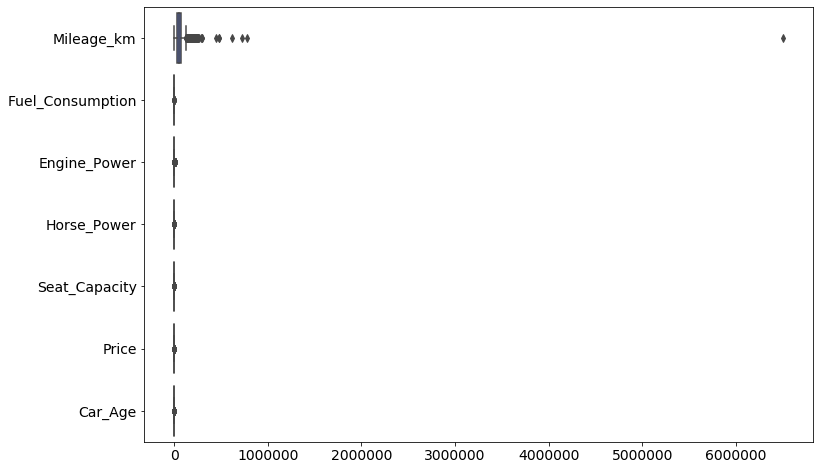

In [158]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.boxplot(data=data, palette='rainbow', orient ='h')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig("outlier.png",bbox_inches='tight',dpi=100)

From the boxplot above, there is an odd extreme data point (outlier) under Mileage_km. Going to dive deeper to check this value.

In [159]:
Max_Mileage = data.Mileage_km.max()
Max_Mileage

6500000

In [160]:
data[data["Mileage_km"]== 6500000]

Location  Mileage_km Fuel_Type Transmission No_of_Owner  Fuel_Consumption  Engine_Power  Horse_Power  Seat_Capacity  Price Brand              Model  Car_Age
2328  Chennai     6500000    Diesel    Automatic       First             15.97        2993.0        258.0            5.0   65.0   bmw  x5xdrive30dmsport        3

In [161]:
data["Mileage_km"] = data["Mileage_km"].astype('float')

It is hard to believe for a car at 3years only can drove the Mileage up to this value. To fix this, will just replace it with mean of the feature instead.

Instead of using median/mean of the Mileage_km column and replace it with the outlier value. It probably be better and more average/accurate to find the similar car brand, Fuel_type (Feature that can help to find the most closest type to the outlier value). Hence filter out these features and find the mean of these filtered rows and apply the mean value to the outlier.

In [162]:
Mil_km_match = data[np.equal.outer(data.to_numpy(copy=False),  ['Diesel','bmw']).any(axis=1).all(axis=1)]
Mil_km_match

Location  Mileage_km Fuel_Type Transmission No_of_Owner  Fuel_Consumption  Engine_Power  Horse_Power  Seat_Capacity  Price Brand                                           Model  Car_Age
20         Kochi     32982.0    Diesel    Automatic       First             22.69    1995.00000    190.00000            5.0  18.55   bmw                                     3series320d        6
86         Delhi     75000.0    Diesel    Automatic      Second             16.73    1995.00000    218.00000            5.0  13.90   bmw                             5series20032012525d        9
113       Mumbai     56087.0    Diesel    Automatic       First             22.69    1995.00000    190.00000            5.0  20.75   bmw                           3series320dluxuryline        5
137   Coimbatore     31821.0    Diesel    Automatic       First             20.58    1995.00000    143.00000            5.0  17.22   bmw                                 1series118dbase        5
149       Mumbai     48000.0    Diesel    Automatic       First             21.76    1995.00000    190.00000            5.0  26.50   bmw                               3seriesluxuryline        6
168       Mumbai     41000.0    Diesel    Automatic       First             15.30    2993.00000    258.00000            5.0  45.00   bmw                                     x5xdrive30d        5
182    Hyderabad     51000.0    Diesel    Automatic       First             22.48    1995.00000    190.00000            5.0  33.50   bmw                           5series520dluxuryline        6
247    Ahmedabad     82002.0    Diesel    Automatic       First             17.05    1995.00000    184.00000            5.0  18.50   bmw                                     x1sdrive20d        6
271   Coimbatore     51982.0    Diesel    Automatic       First             16.55    2993.00000    258.00000            5.0  45.77   bmw                               x3xdrive30dmsport        3
291         Pune     64000.0    Diesel    Automatic       First             18.48    1995.00000    177.00000            5.0  28.00   bmw                             5series20032012520d        5
326       Mumbai     30000.0    Diesel    Automatic       First              9.52    2993.00000    313.00000            4.0  49.00   bmw                            6series640dgrancoupe        9
348        Kochi     30717.0    Diesel    Automatic      Second             21.76    1995.00000    190.00000            5.0  25.99   bmw                               3seriesluxuryline        5
369    Bangalore     90000.0    Diesel    Automatic      Second             11.00    2993.00000    235.00000            5.0  17.75   bmw                                           x530d       11
396      Chennai     89616.0    Diesel    Automatic       First             16.07    1995.00000    181.00000            5.0  11.00   bmw                                3series320dsedan        9
406    Hyderabad     56000.0    Diesel    Automatic       First             16.73    2993.00000    218.00000            5.0  33.50   bmw                                5series525dsedan        7
413       Mumbai     41000.0    Diesel    Automatic       First             21.76    1995.00000    190.00000            5.0  25.50   bmw                               3seriesluxuryline        5
435   Coimbatore     57832.0    Diesel    Automatic       First             16.20    2993.00000    258.00000            5.0  25.82   bmw                         5series20032012gt530dle        9
458    Bangalore     19235.0    Diesel    Automatic       First             21.76    1995.00000    190.00000            5.0  36.50   bmw                               3seriesluxuryline        4
516    Hyderabad     75000.0    Diesel    Automatic       First             11.70    2993.00000    245.00000            5.0  27.50   bmw                                     x5xdrive30d        9
547    Ahmedabad     59900.0    Diesel    Automatic      Second             18.48    1995.00000    177.00000            5.0  18.

In [163]:
Mil_km_carAge = Mil_km_match[Mil_km_match["Car_Age"] == 3 ]
Mil_km_carAge

Location  Mileage_km Fuel_Type Transmission No_of_Owner  Fuel_Consumption  Engine_Power  Horse_Power  Seat_Capacity  Price Brand                          Model  Car_Age
271   Coimbatore     51982.0    Diesel    Automatic       First             16.55        2993.0       258.00            5.0  45.77   bmw              x3xdrive30dmsport        3
549   Coimbatore     31645.0    Diesel    Automatic       First             20.68        1995.0       190.00            5.0  29.40   bmw               x1sdrive20dxline        3
1631       Kochi     32838.0    Diesel    Automatic       First             17.05        1995.0       190.00            5.0  30.29   bmw              x1msportsdrive20d        3
1863      Jaipur     19543.0    Diesel    Automatic       First             18.12        1995.0       190.00            5.0  40.50   bmw  5series20132017520dluxuryline        3
1924  Coimbatore     27313.0    Diesel    Automatic       First             14.69        2993.0       258.00            5.0  48.63   bmw      5series20132017530dmsport        3
2328     Chennai   6500000.0    Diesel    Automatic       First             15.97        2993.0       258.00            5.0  65.00   bmw              x5xdrive30dmsport        3
2470       Kochi     23806.0    Diesel    Automatic       First             22.69        1995.0       190.00            5.0  33.66   bmw              3series320dmsport        3
2833       Kochi     36935.0    Diesel    Automatic       First             18.56        1995.0       190.00            5.0  32.64   bmw               x3xdrive20dxline        3
2963       Kochi     55389.0    Diesel    Automatic       First             18.88        1995.0       184.00            5.0  28.45   bmw          3series320dluxuryline        3
4327     Kolkata     27001.0    Diesel    Automatic       First             20.68        1995.0       190.00            5.0  29.00   bmw              x1xdrive20dmsport        3
4558      Mumbai      8000.0    Diesel    Automatic       First             19.59        1995.0       187.74            5.0  33.75   bmw        3series320dgtluxuryline        3
4614     Chennai     15000.0    Diesel    Automatic       First             15.97        2993.0       258.00            5.0  70.00   bmw                          x5x5m        3
4856       Kochi     41816.0    Diesel    Automatic       First             18.56        1995.0       190.00            5.0  32.78   bmw               x3xdrive20dxline        3
5002       Kochi     36723.0    Diesel    Automatic       First             18.56        1995.0       190.00            5.0  32.57   bmw               x3xdrive20dxline        3
5304   Bangalore     21000.0    Diesel    Automatic       First             21.76        1995.0       190.00            5.0  35.00   bmw              3seriesluxuryline        3
5568  Coimbatore     34232.0    Diesel    Automatic       First             21.76        1995.0       190.00            5.0  35.84   bmw              3seriesluxuryline        3
5601       Delhi     23000.0    Diesel    Automatic       First             20.68        1995.0       190.00            5.0  28.75   bmw               x1xdrive20dxline        3
5618       Delhi     16485.0    Diesel    Automatic       First             22.48        1995.0       187.74            5.0  42.75   bmw           5series520dsportline        3
5740     Chennai     21000.0    Diesel    Automatic      Second             15.97        2993.0       258.00            5.0  55.00   bmw              x5xdrive30dmsport        3

In [164]:
Mean_for_MilOutlier = Mil_km_carAge.Mileage_km.mean()
Mean_for_MilOutlier

369668.84210526315

In [165]:
data["Mileage_km"].loc[2328] = Mean_for_MilOutlier

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [166]:
data.iloc[2328]

Location                      Chennai
Mileage_km                     369669
Fuel_Type                      Diesel
Transmission                Automatic
No_of_Owner                     First
Fuel_Consumption                15.97
Engine_Power                     2993
Horse_Power                       258
Seat_Capacity                       5
Price                              65
Brand                             bmw
Model               x5xdrive30dmsport
Car_Age                             3
Name: 2328, dtype: object

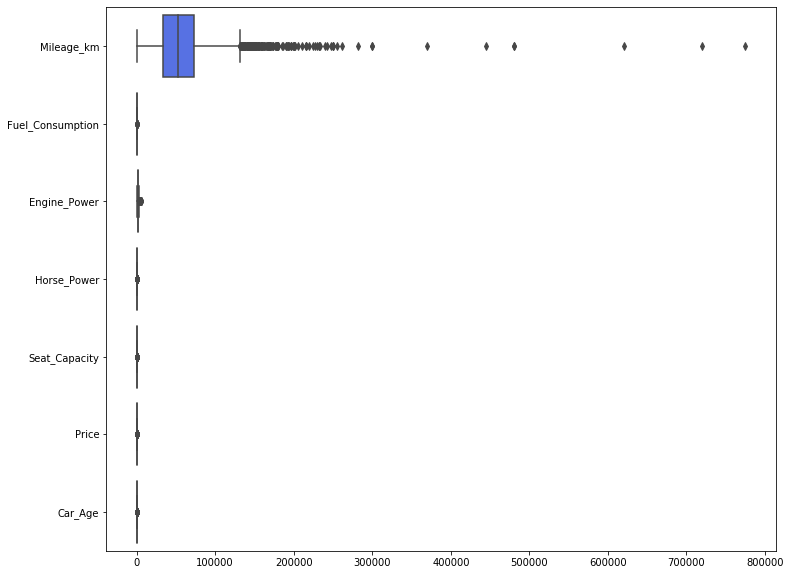

In [167]:
plt.figure(figsize=(12,10))
sns.boxplot(data=data, palette='rainbow', orient ='h')


So we can see some changes to the chart. Let's narrow it down to only Mileage_km data to see the boxplot

(array([0]), <a list of 1 Text yticklabel objects>)

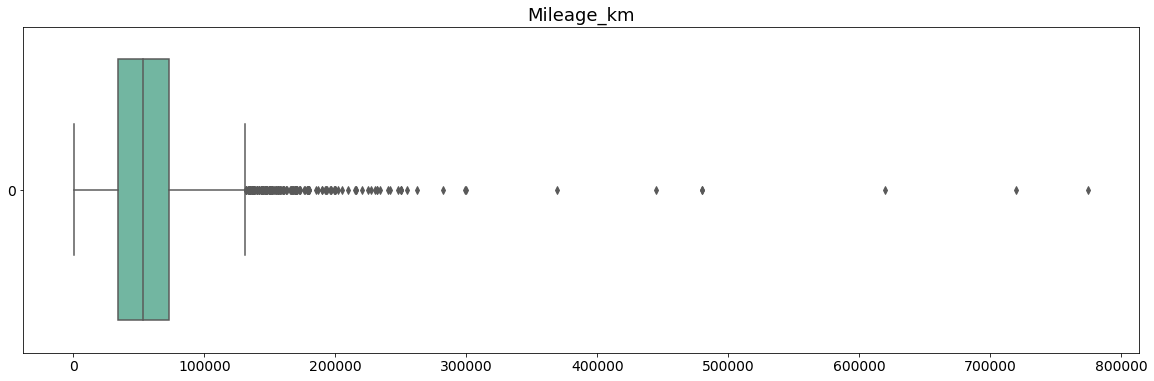

In [168]:
fig, ax = plt.subplots(figsize=(20,6))
ax = sns.boxplot(data=data.Mileage_km, palette='Set2', orient ='h')
plt.title("Mileage_km", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig("outlier_Mileage_km.png",bbox_inches='tight',dpi=100)

Now the value much better after handling the extreme outlier. 

In [169]:
#Inspect the dataset again to see any more missing values or incorrect data types.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Location          6019 non-null   object 
 1   Mileage_km        6019 non-null   float64
 2   Fuel_Type         6019 non-null   object 
 3   Transmission      6019 non-null   object 
 4   No_of_Owner       6019 non-null   object 
 5   Fuel_Consumption  6019 non-null   float64
 6   Engine_Power      6019 non-null   float64
 7   Horse_Power       6019 non-null   float64
 8   Seat_Capacity     6019 non-null   float64
 9   Price             6019 non-null   float64
 10  Brand             6019 non-null   object 
 11  Model             6019 non-null   object 
 12  Car_Age           6019 non-null   int64  
dtypes: float64(6), int64(1), object(6)
memory usage: 611.4+ KB


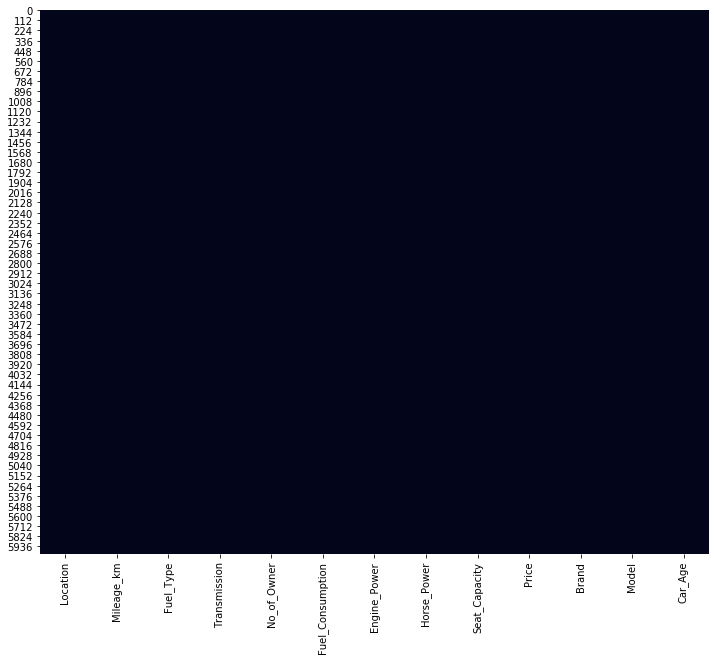

In [170]:
plt.figure(figsize=(12,10))
sns.heatmap(data.isnull(),cbar=False)

From the above heatmap that only has 1 colour of black. This can confirmed the latest dataset info is now missing value free.

## Visualization / EDA**

- Correlation of data
- Plotting
- Finding insights of the data

In [171]:
# study the statistical data
data.describe()

Mileage_km  Fuel_Consumption  Engine_Power  Horse_Power  Seat_Capacity        Price      Car_Age
count    6019.000000       6019.000000   6019.000000  6019.000000    6019.000000  6019.000000  6019.000000
mean    57719.883675         18.369993   1621.276450   113.253050       5.278618     9.479468     6.641801
std     38088.537186          4.216513    599.553865    53.231019       0.804375    11.187917     3.269742
min       171.000000          6.400000     72.000000    34.200000       2.000000     0.440000     1.000000
25%     34000.000000         15.400000   1198.000000    78.000000       5.000000     3.500000     4.000000
50%     53000.000000         18.160000   1493.000000    98.600000       5.000000     5.640000     6.000000
75%     73000.000000         21.100000   1969.000000   138.030000       5.000000     9.950000     9.000000
max    775000.000000         37.270000   5998.000000   560.000000      10.000000   160.000000    22.000000

In [172]:
# study the correlation of the data after data cleaning
data.corr()

Mileage_km  Fuel_Consumption  Engine_Power  Horse_Power  Seat_Capacity     Price   Car_Age
Mileage_km          1.000000         -0.136837      0.156936     0.007354       0.211048 -0.160261  0.444449
Fuel_Consumption   -0.136837          1.000000     -0.636688    -0.546814      -0.343258 -0.328773 -0.287277
Engine_Power        0.156936         -0.636688      1.000000     0.859020       0.398664  0.657118  0.051712
Horse_Power         0.007354         -0.546814      0.859020     1.000000       0.100434  0.767331 -0.013895
Seat_Capacity       0.211048         -0.343258      0.398664     0.100434       1.000000  0.054043 -0.014424
Price              -0.160261         -0.328773      0.657118     0.767331       0.054043  1.000000 -0.305327
Car_Age             0.444449         -0.287277      0.051712    -0.013895      -0.014424 -0.305327  1.000000

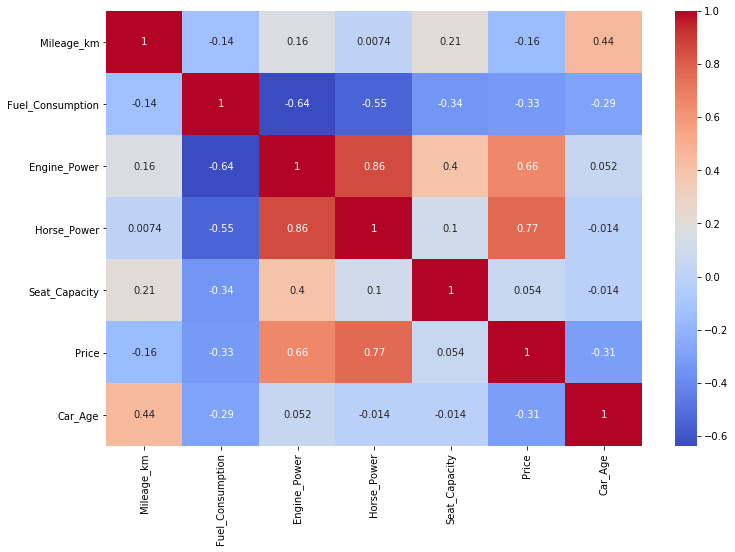

In [173]:
# Visualize the correlations between the independant features

fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(data.corr(),cmap='coolwarm', annot=True, ax=ax)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175.]),
 <a list of 9 Text xticklabel objects>)

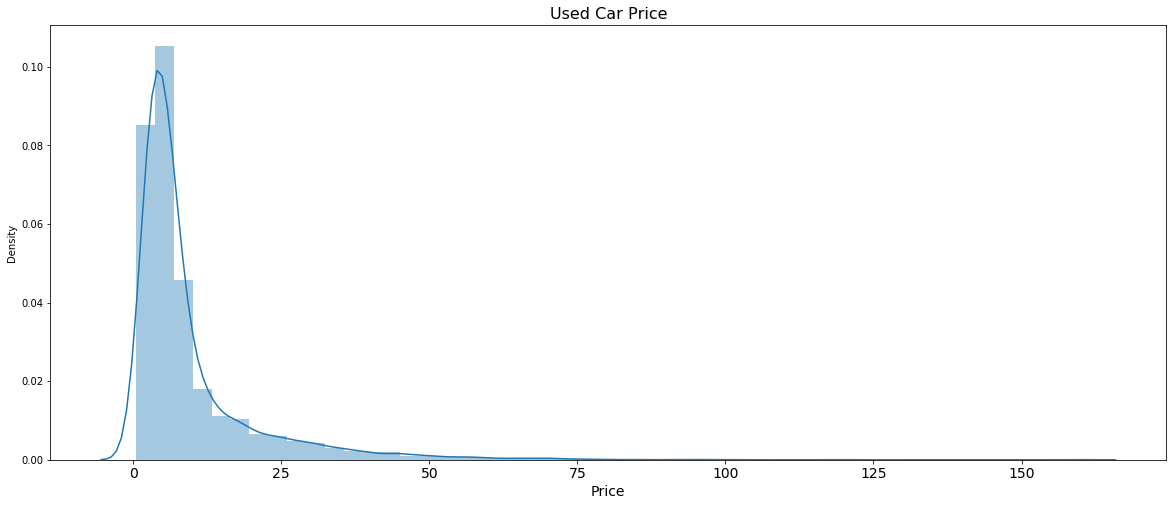

In [174]:
fig, ax = plt.subplots(figsize=(20,8))
plt.title('Used Car Price', fontsize=16)
ax = sns.distplot(data.Price)
plt.xlabel('Price', fontsize=14)
plt.xticks(fontsize=14)

# plt.savefig("used_car_price.png",bbox_inches='tight',dpi=100)

From the above distplot, we can understand that most of the used car price is between 0 to 25 Lakhs

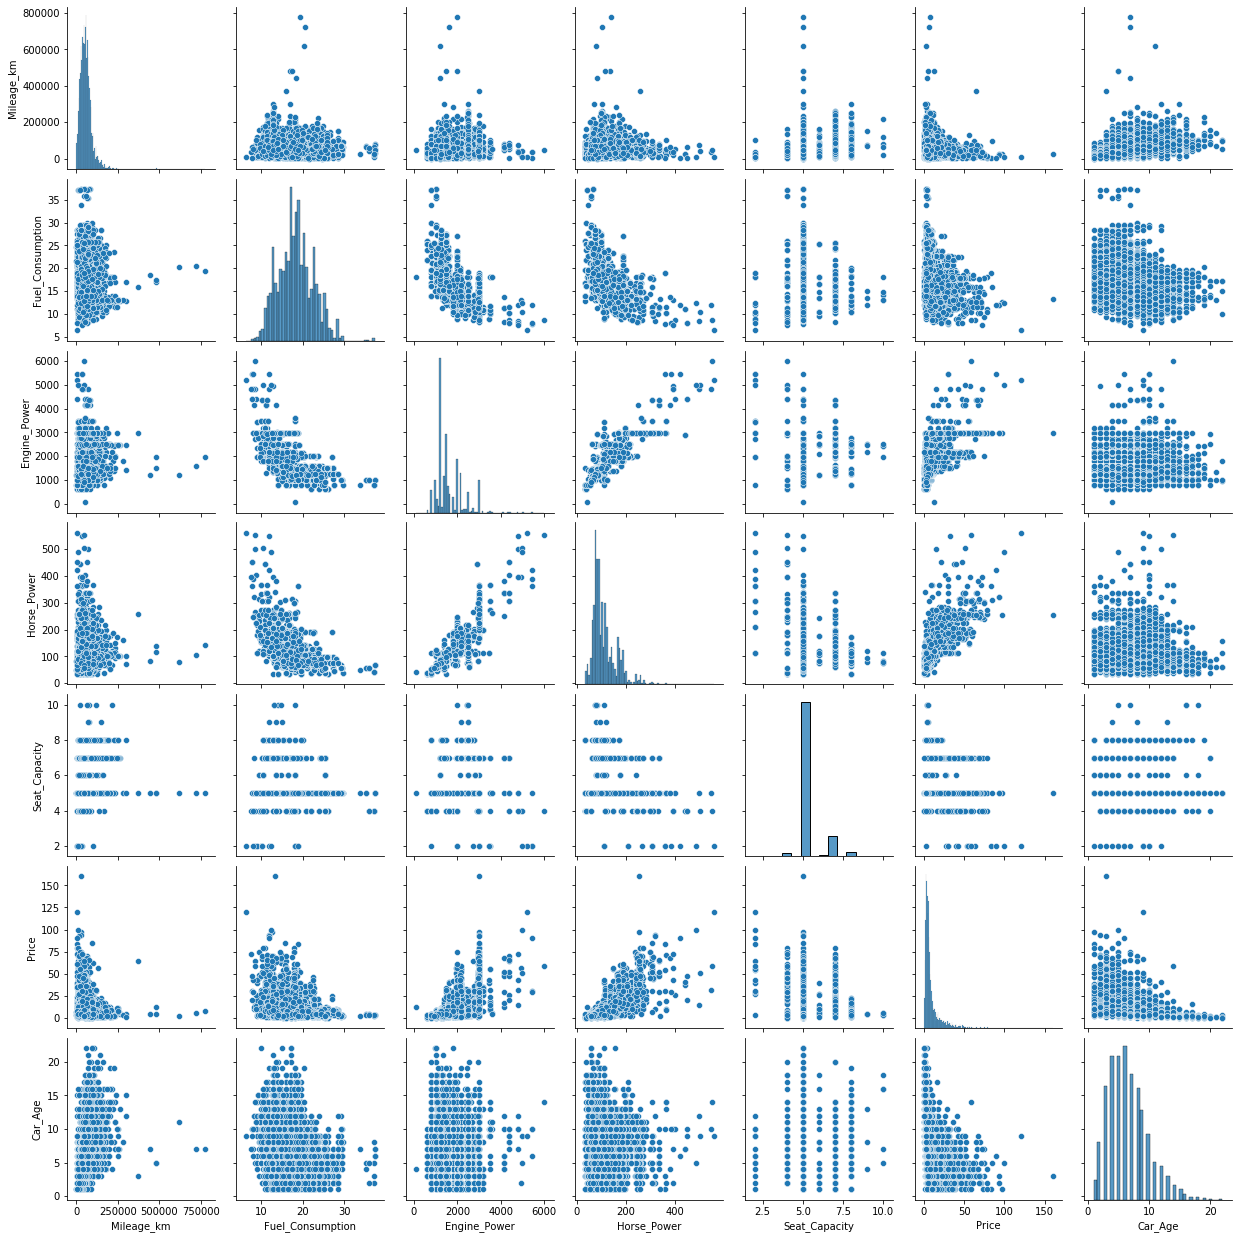

In [175]:
sns.pairplot(data)

Pairplot gave us some overview on how each of the feature correlate to each other and see where is their scatter focus.

#### Plots on correlation on "Features" / Location

In [176]:
sns.set_style("darkgrid")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

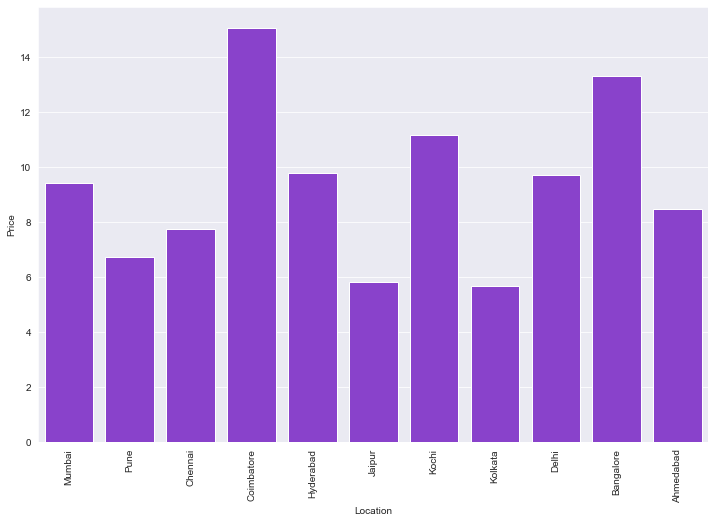

In [177]:
#The distribution of car price across different cities
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x='Location', y='Price', data=data, color="blueviolet", ci=None)
plt.xticks(rotation=90)

Barplot above give an overview that the price of used car in Coimbatore is highest in all 11 cities followed by Bangalore. This could mean either the average pricing in this city is higher compare to other cities or the amount of used car for sale in Coimbatore is lesser so the average price of used car is higher.

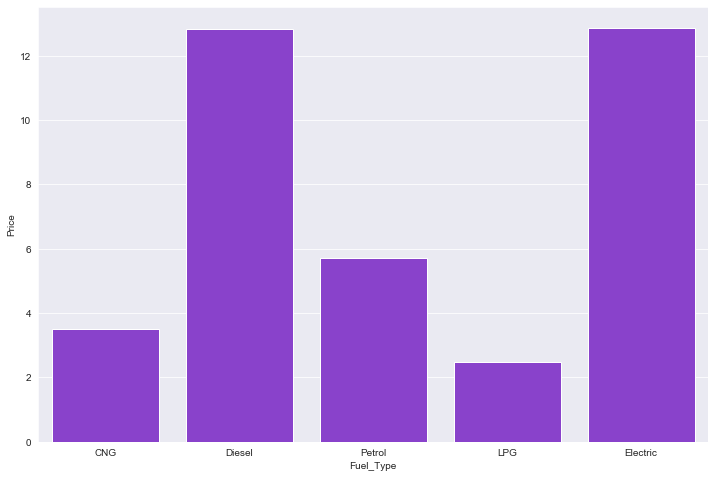

In [178]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x='Fuel_Type', y='Price', data=data, color="blueviolet",ci=None)

Barplot above shows that the fuel type of Diesel and Electric has relatively higher price range for the used car. Generally in market the fuel for Diesel and Electric charge stations are expensive and limited. This could be the reason contributed to the higher range of the used car price

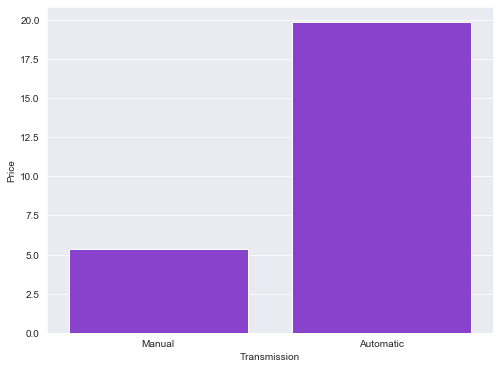

In [179]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x='Transmission', y='Price', data=data, color="blueviolet", ci=None)

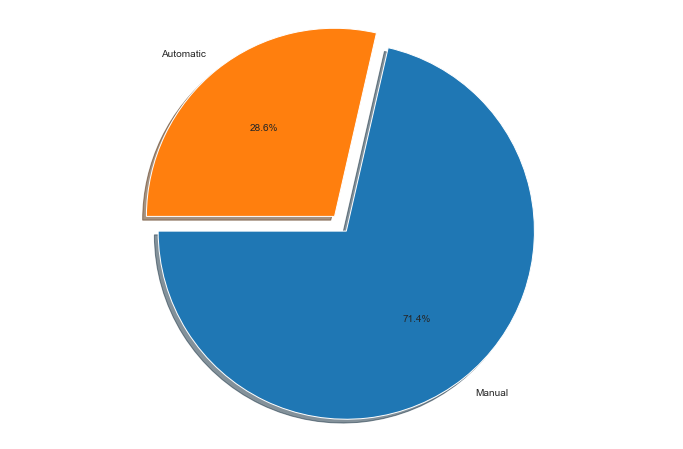

In [180]:
labels = 'Manual','Automatic'
sizes = data['Transmission'].value_counts()
explode = (0, 0.1)  # only "explode" the 2nd slice



fig, ax = plt.subplots(figsize=(12,8))
ax.pie(sizes, labels=labels, explode = explode,autopct= '%1.1f%%',shadow=True, startangle=180)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.rcParams.update({'font.size': 22})

plt.show()

# fig.savefig("Transmission Pie Chart.png",bbox_inches='tight',dpi=100)

Commonly Automatic transmission car is higher than Manual car, also Automatic car could be more common in India on the recent years. These are the potential factor that the Automatic car is more leaning toward the higher price range.

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 7 Text yticklabel objects>)

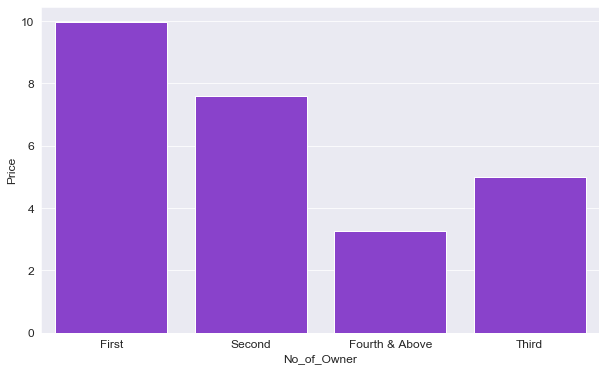

In [181]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x='No_of_Owner', y='Price', data=data, color="blueviolet", ci=None)

plt.xlabel('No_of_Owner', fontsize=12)
plt.ylabel('Price', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In the number of owner, First hand is not surprisingly higher price range as First hand it is relatively new and higher chance of less mechanism issues compare to other hands of car.

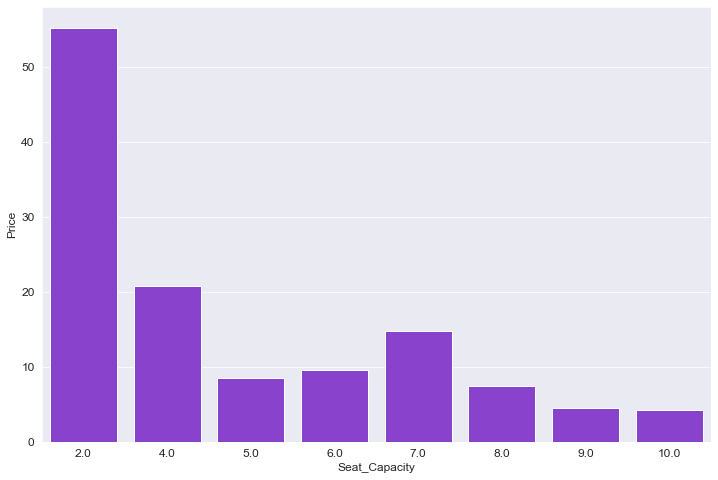

In [182]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x='Seat_Capacity', y='Price', data=data, color="blueviolet", ci=None)


plt.xlabel('Seat_Capacity', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

Generally 2 seater cars are likely to be luxury sport cars, therefore the price would definitely skew on the higher price range.

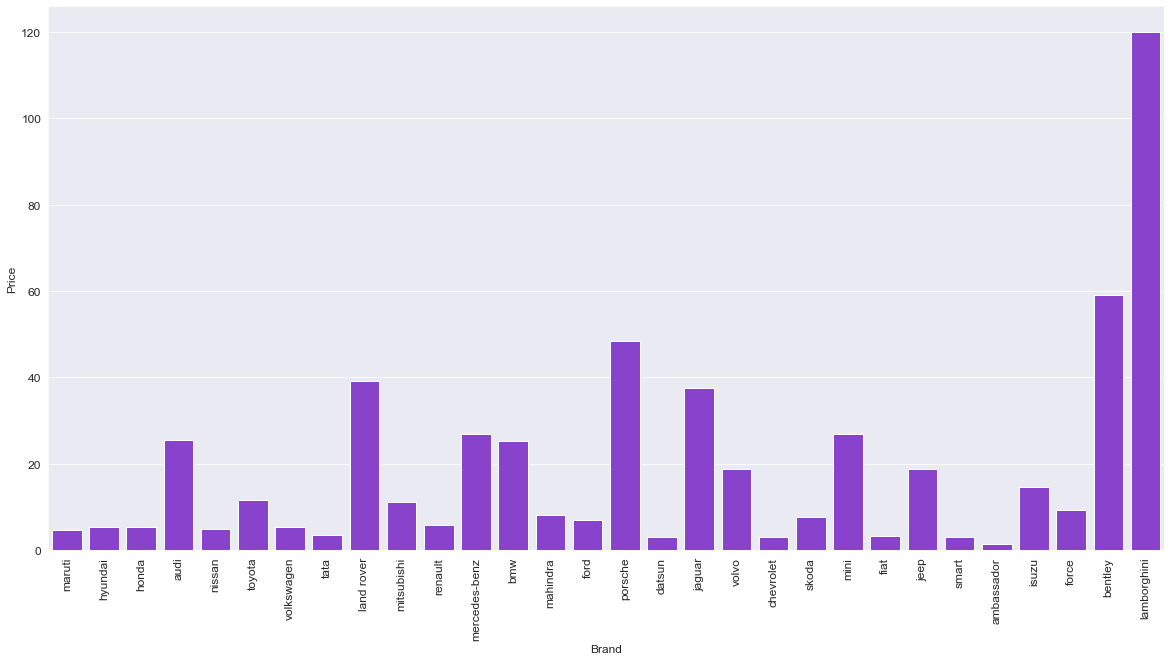

In [183]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x='Brand', y='Price', data=data, color="blueviolet", ci=None)
plt.xticks(rotation=90 )

plt.xlabel('Brand', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In the graph above, most of the higher price range is luxury or Foreign (Europe/US) brand. These car are all imported and/or sports car. In results their pricing will be on the high side.

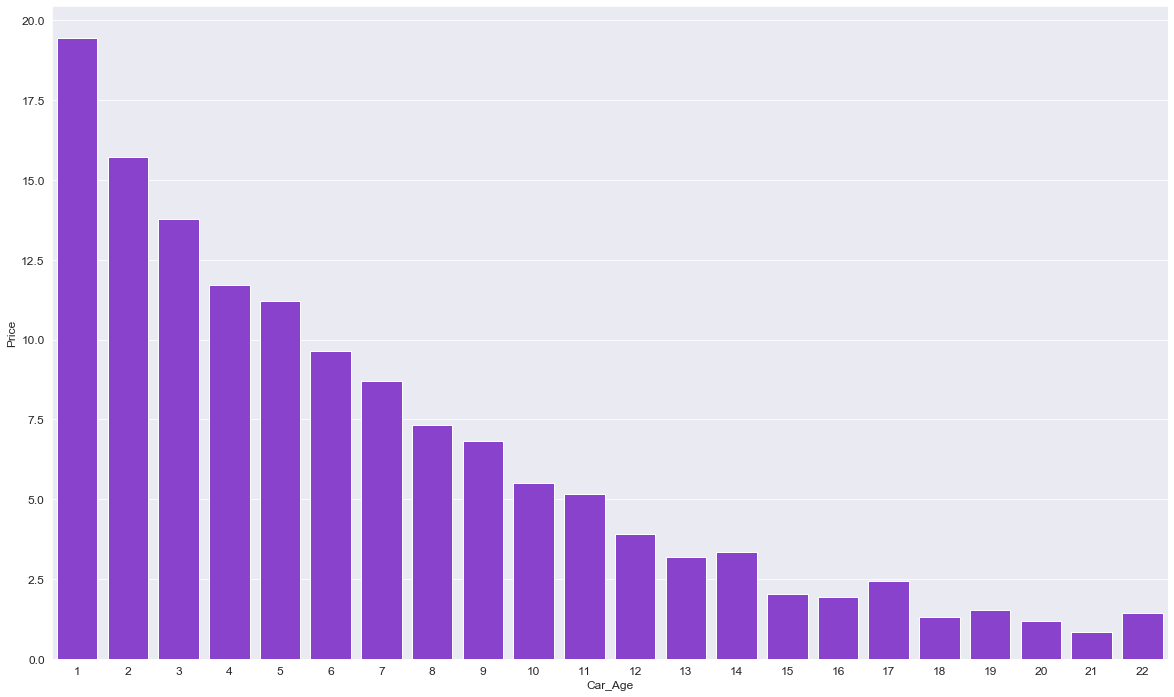

In [184]:
fig, ax = plt.subplots(figsize=(20,12))
ax = sns.barplot(x='Car_Age', y='Price', data=data, color="blueviolet", ci=None)

plt.xlabel('Car_Age', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

Definitely consumer will buy newer used car compare to older age car as older car tend to have more issues and lesser time span. With such demands, we can see top 5 years old of car on the used car price is above 10.0 Lakhs.

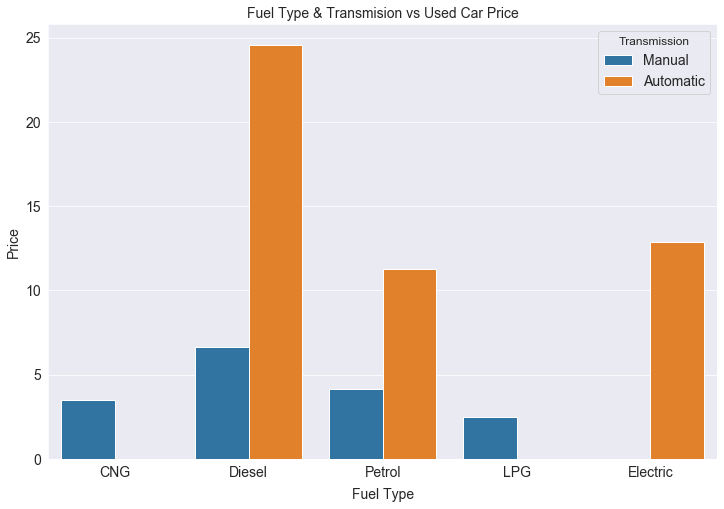

In [185]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x='Fuel_Type', y='Price',hue='Transmission', data=data,ci=None)

plt.xlabel('Fuel Type', fontsize=14, labelpad=8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.title("Fuel Type & Transmision vs Used Car Price", fontsize = 14)
plt.legend(title="Transmission",title_fontsize=12, loc="upper right",fontsize=14)

# plt.savefig("Fuel_Type_Transmission_vs_Price.png",bbox_inches='tight',dpi=200)

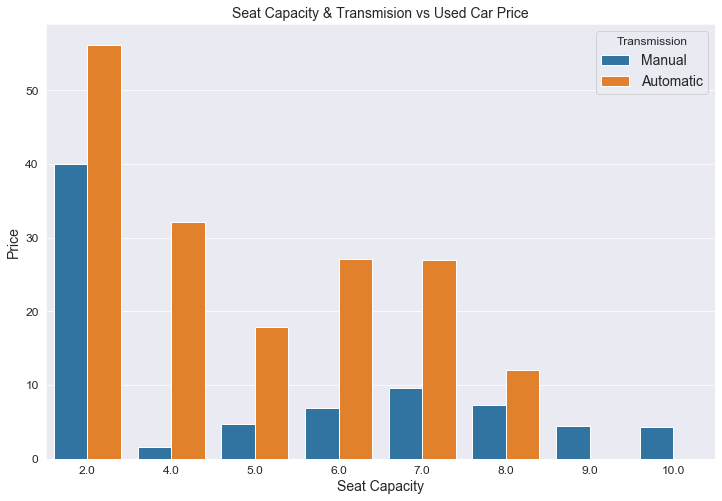

In [186]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x='Seat_Capacity', y='Price',hue='Transmission', data=data,ci=None)
plt.xlabel('Seat Capacity', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title("Seat Capacity & Transmision vs Used Car Price", fontsize = 14)
plt.legend(title="Transmission",title_fontsize=12, loc="upper right",fontsize=14)

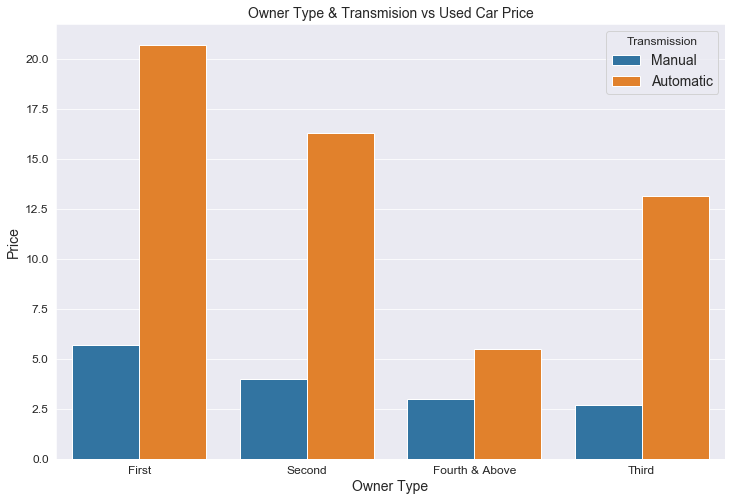

In [187]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x='No_of_Owner', y='Price',hue='Transmission', data=data,ci=None)

plt.xlabel('Owner Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title("Owner Type & Transmision vs Used Car Price", fontsize = 14)
plt.legend(title="Transmission",title_fontsize=12, loc="upper right",fontsize=14)

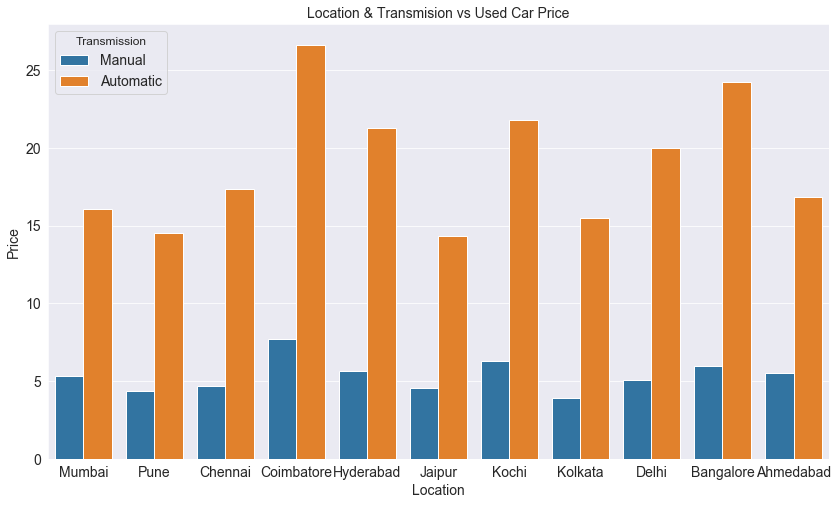

In [188]:
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.barplot(x='Location', y='Price',hue='Transmission', data=data,ci=None)

plt.xlabel('Location', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title("Location & Transmision vs Used Car Price", fontsize = 14)
plt.legend(title="Transmission",title_fontsize=12, loc="best",fontsize=14)

Barplot above give an overview that the price of used car in Coimbatore is highest in all 11 cities followed by Bangalore. This could mean either the average pricing in this city is higher compare to other cities or the amount of used car for sale in Coimbatore is lesser so the average price of used car is higher.

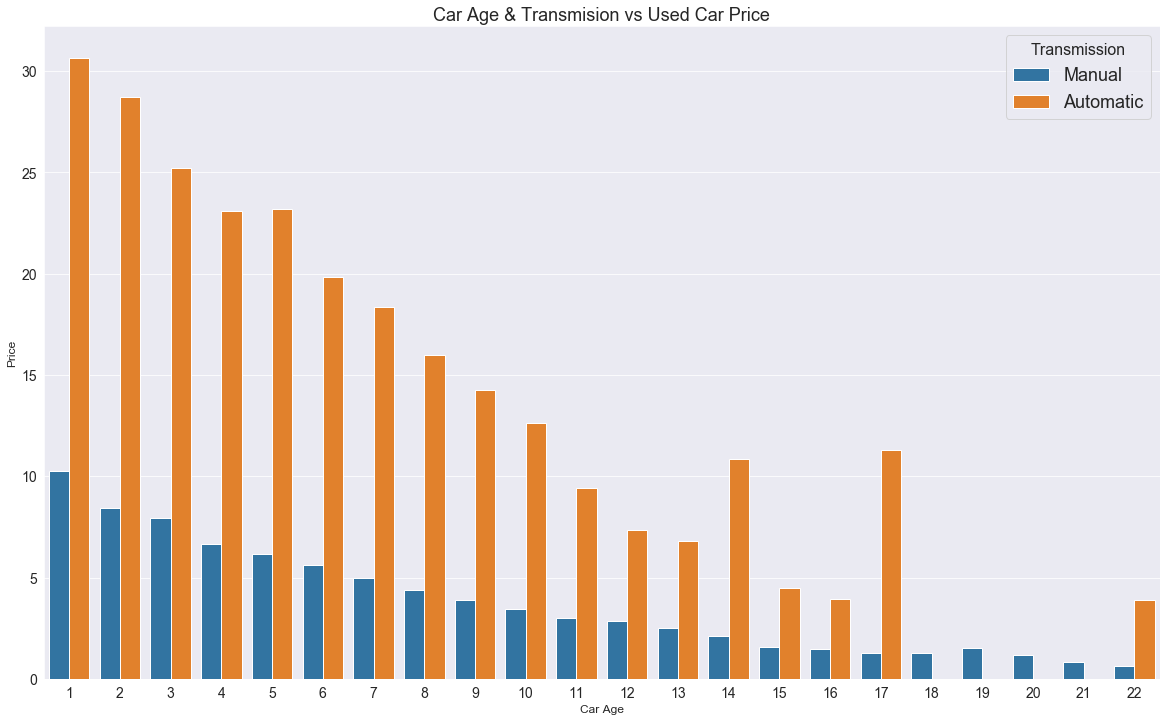

In [189]:
fig, ax = plt.subplots(figsize=(20,12))
ax = sns.barplot(x='Car_Age', y='Price',hue='Transmission', data=data,ci=None)

plt.xlabel('Car Age', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.title("Car Age & Transmision vs Used Car Price", fontsize = 18)
plt.legend(title="Transmission",title_fontsize=16, loc="upper right",fontsize=18)

Barplot above has Automatic car that has higher price range for between 1 to 10years old car. We could assumed that because Automatic car just out in the India Market recent year and the demand is growing, hence it influence the pricing of the used car accordingly.

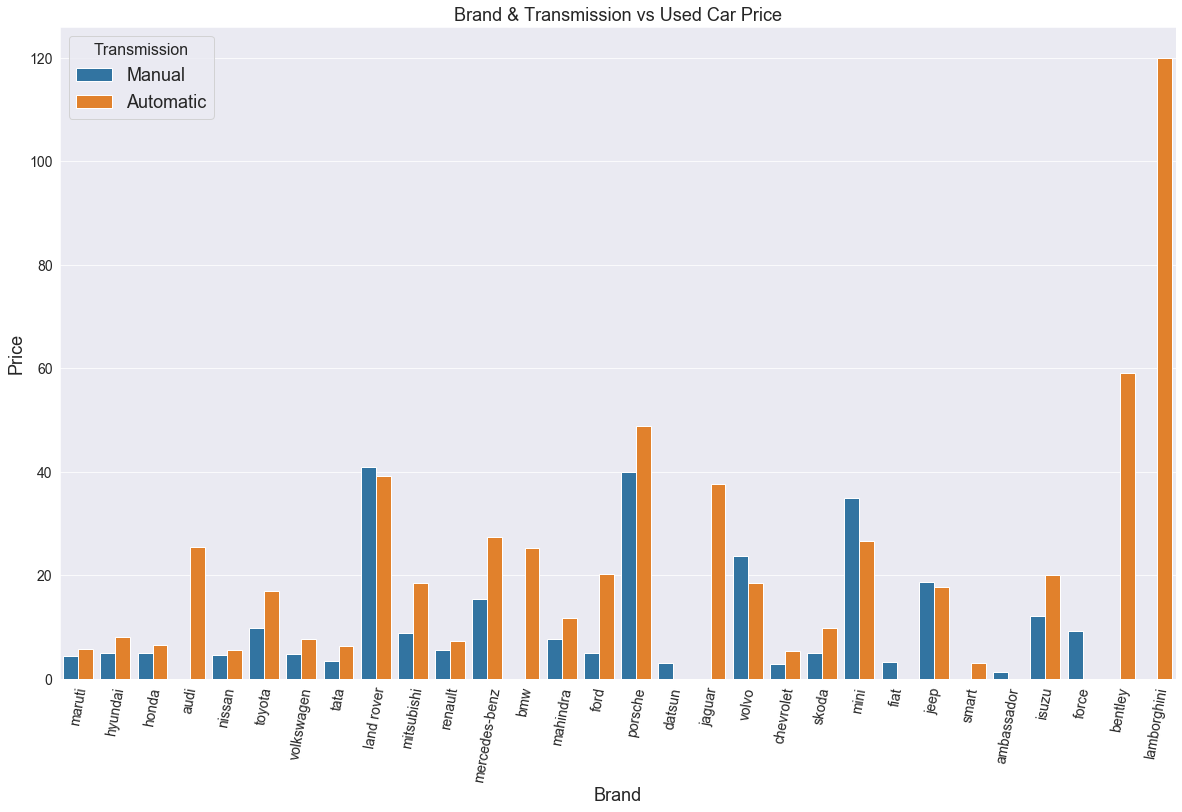

In [190]:
fig, ax = plt.subplots(figsize=(20,12))
ax = sns.barplot(x='Brand', y='Price',hue='Transmission', data=data,ci=None)
plt.xticks(rotation=80, fontsize=14)
plt.yticks(fontsize = 14)
plt.xlabel('Brand', fontsize=18)
plt.ylabel('Price', fontsize=18)


plt.title("Brand & Transmission vs Used Car Price", fontsize = 18)
plt.legend(title="Transmission",title_fontsize=16, loc="best",fontsize=18)

# plt.savefig("Brand_Transmission_vs_Used_Car_Price.png",bbox_inches='tight',dpi=100)

#### Plots on Price range affect by "Features"

Text(0, 0.5, 'Price')

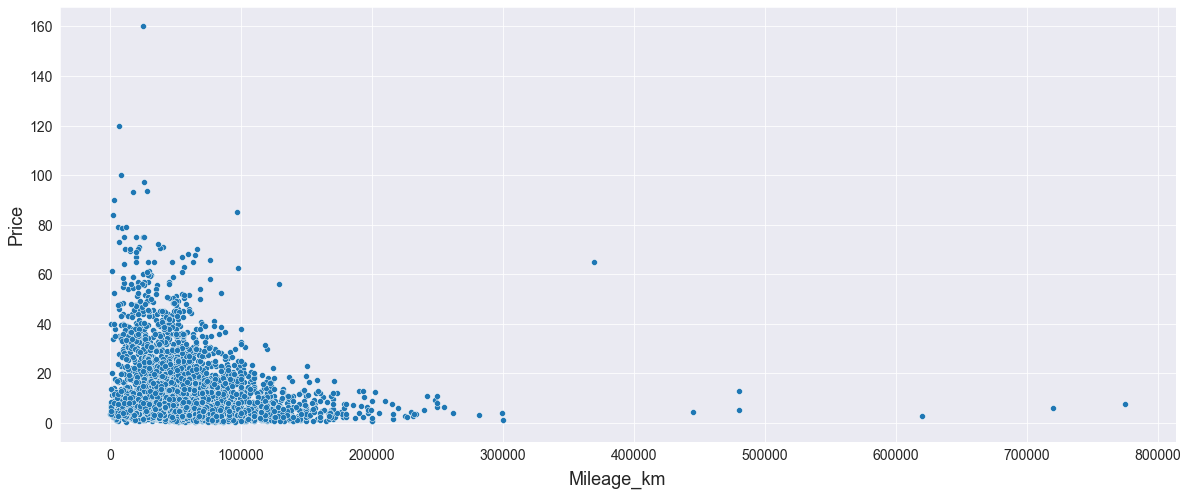

In [191]:
fig, ax = plt.subplots(figsize=(20,8))
ax = sns.scatterplot(data=data, x="Mileage_km", y="Price")

plt.xticks(fontsize=14)
plt.yticks(fontsize = 14)
plt.xlabel('Mileage_km', fontsize=18, labelpad=8)
plt.ylabel('Price', fontsize=18)

Text(0, 0.5, 'Price')

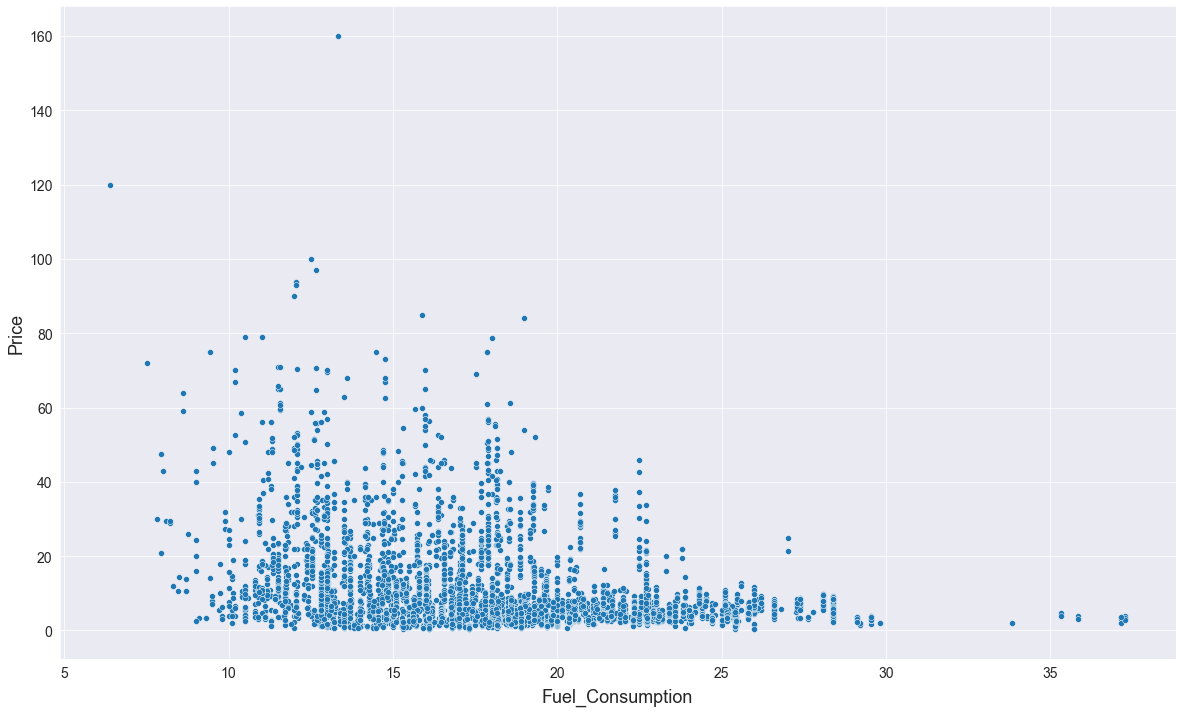

In [192]:
fig, ax = plt.subplots(figsize=(20,12))
ax = sns.scatterplot(data=data, x="Fuel_Consumption", y="Price")

plt.xticks(fontsize=14)
plt.yticks(fontsize = 14)
plt.xlabel('Fuel_Consumption', fontsize=18, labelpad=8)
plt.ylabel('Price', fontsize=18)

Text(0, 0.5, 'Price')

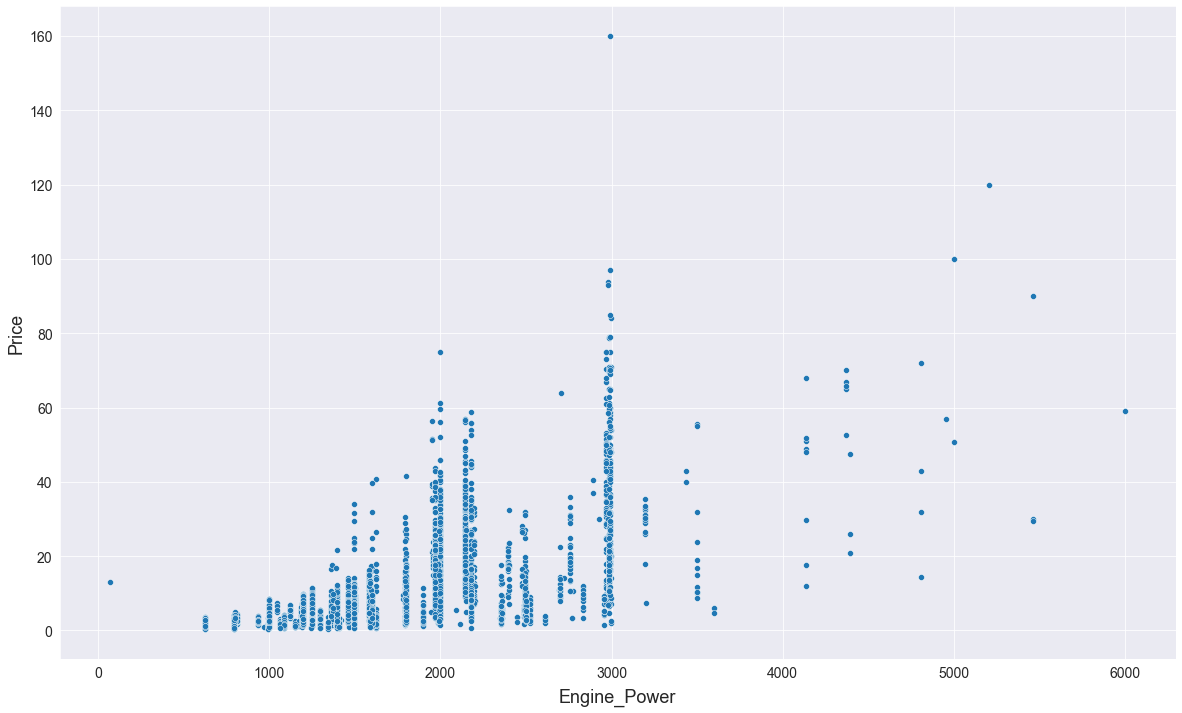

In [193]:
fig, ax = plt.subplots(figsize=(20,12))
ax = sns.scatterplot(data=data, x="Engine_Power", y="Price")

plt.xticks(fontsize=14)
plt.yticks(fontsize = 14)
plt.xlabel('Engine_Power', fontsize=18, labelpad=8)
plt.ylabel('Price', fontsize=18)

Text(0, 0.5, 'Price')

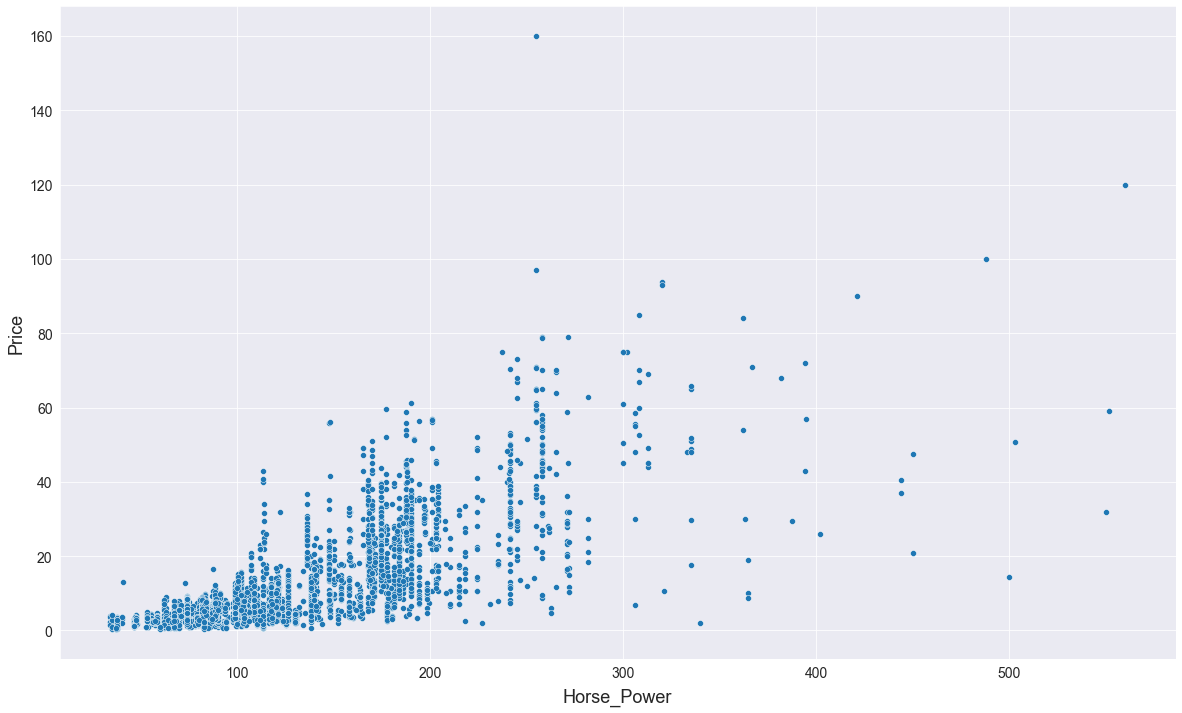

In [194]:
fig, ax = plt.subplots(figsize=(20,12))
ax = sns.scatterplot(data=data, x="Horse_Power", y="Price")

plt.xticks(fontsize=14)
plt.yticks(fontsize = 14)
plt.xlabel('Horse_Power', fontsize=18, labelpad=8)
plt.ylabel('Price', fontsize=18)

Text(0, 0.5, 'Price')

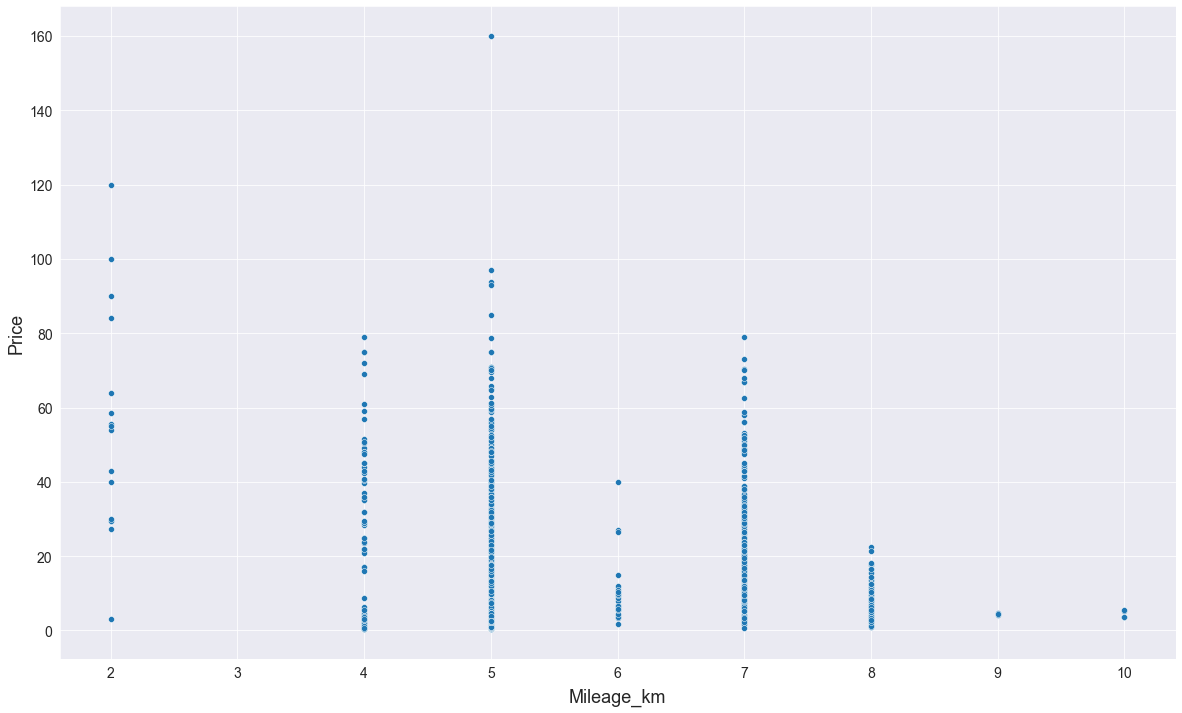

In [195]:
fig, ax = plt.subplots(figsize=(20,12))
ax = sns.scatterplot(data=data, x="Seat_Capacity", y="Price")

plt.xticks(fontsize=14)
plt.yticks(fontsize = 14)
plt.xlabel('Mileage_km', fontsize=18, labelpad=8)
plt.ylabel('Price', fontsize=18)

**It is difficult to get clear insights how these features in the above scatted plot influence the pricing, as their numeric range/ differences are too large. As the project is focus on Machine Learning, will see how these features will able to interact in the ML models and give the insights on Feature Importance instead.**

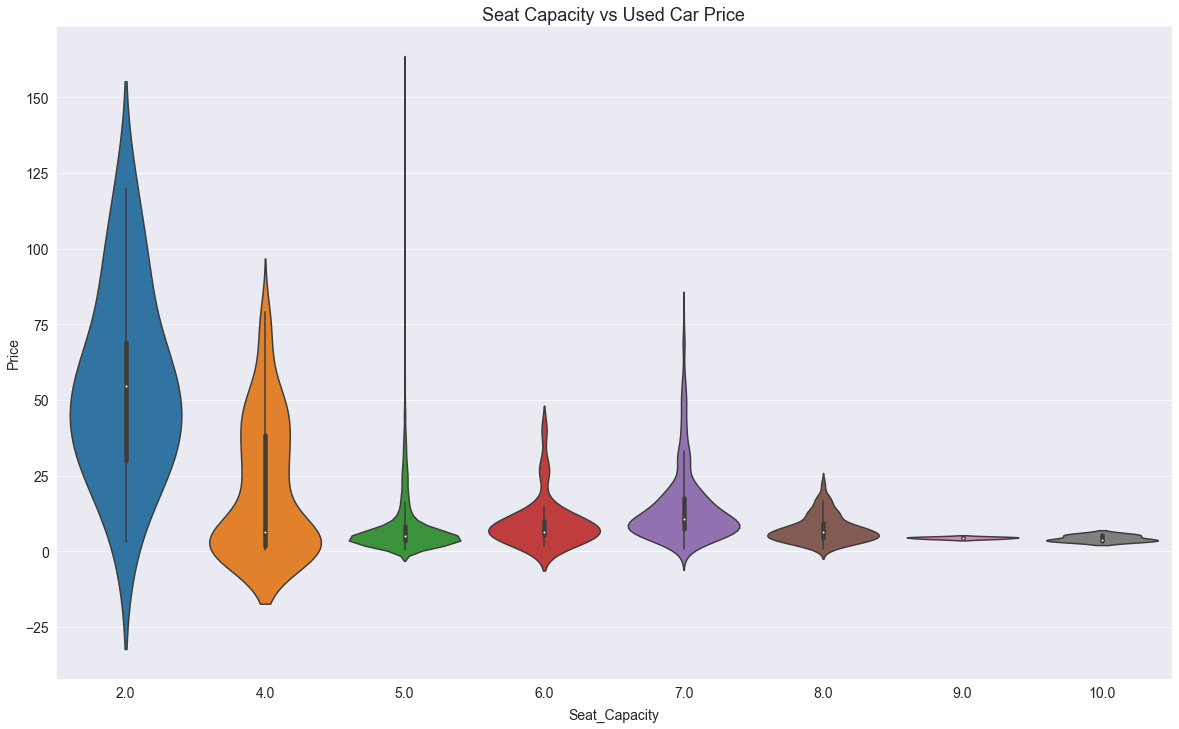

In [196]:
#violin plot - numeric and categorical combination
fig, ax = plt.subplots(figsize=(20,12))
ax = sns.violinplot(x="Seat_Capacity", y="Price", data=data, scale="width")

plt.xlabel('Seat_Capacity', fontsize=14, labelpad=8)
plt.xticks(fontsize=14)
plt.yticks(fontsize = 14)
plt.ylabel('Price', fontsize=14)

plt.title("Seat Capacity vs Used Car Price", fontsize = 18);

# plt.savefig("seat_capacity_vs_price.png",bbox_inches='tight',dpi=100)

The violinplot give an idea where the distribution of the price range is for seat capacity versus used car price.

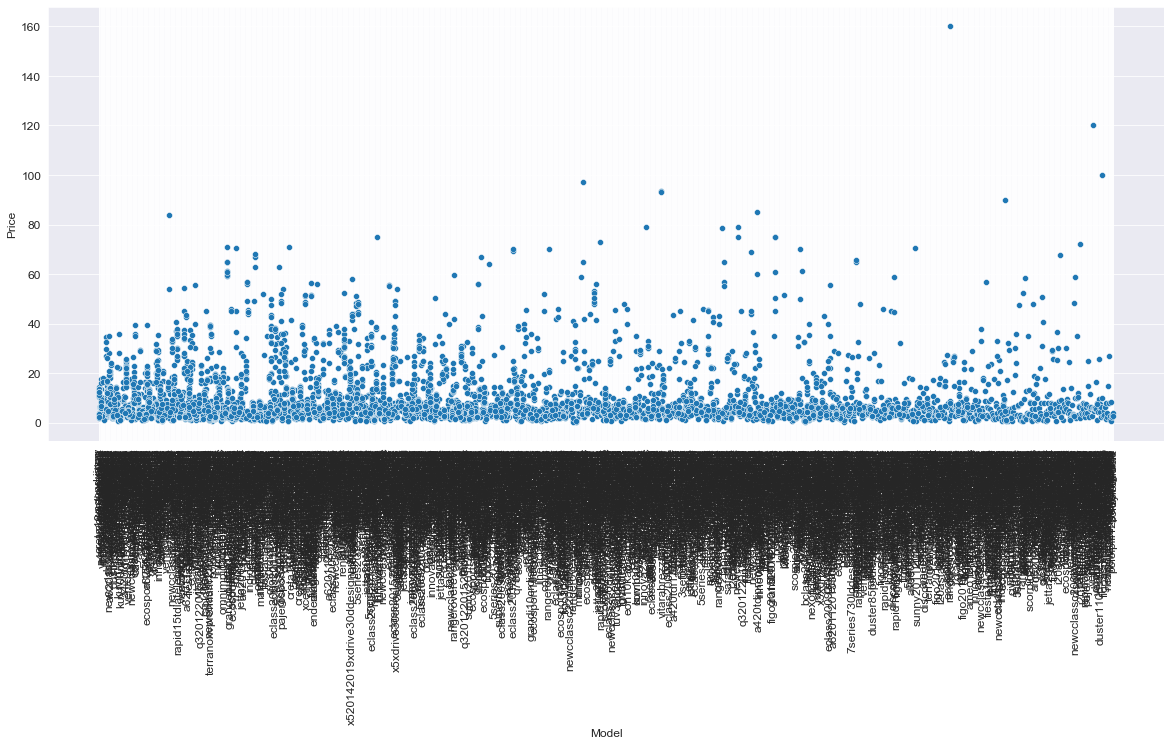

In [197]:
fig, ax = plt.subplots(figsize=(20,8))
ax = sns.scatterplot(data=data, x="Model", y="Price")
plt.xticks(rotation=90, fontsize=12)

plt.xlabel('Model', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.yticks(fontsize=12);

The scatted plot above is not a good plot due to the large number of model types but still want to show in order to get a sense that the overall used car price throughout all models are between 0 to 20 Lakhs.

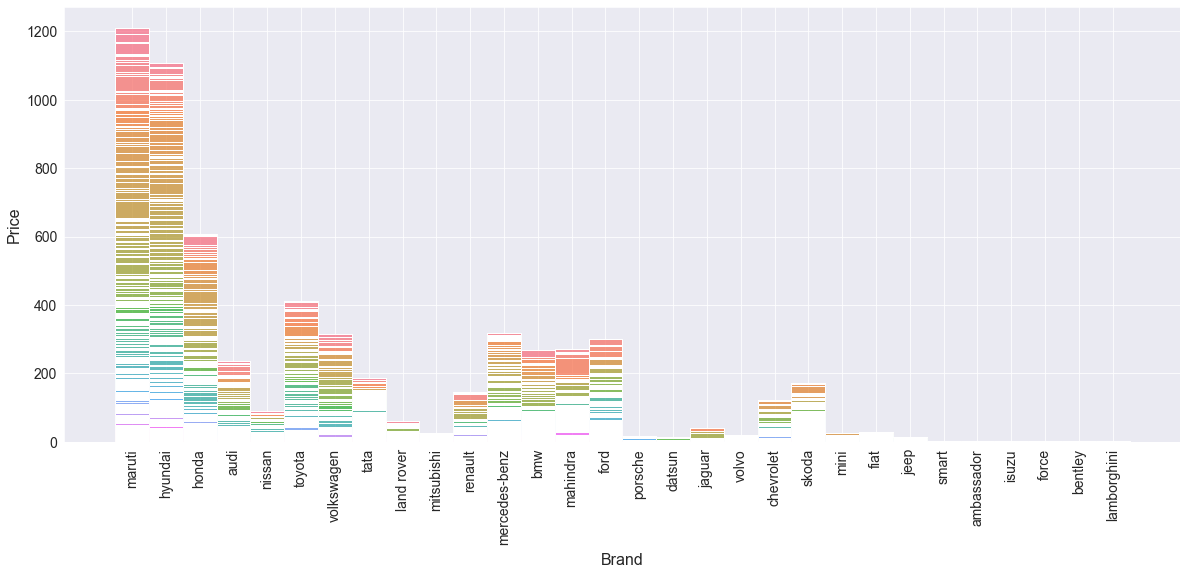

In [198]:
fig, ax = plt.subplots(figsize=(20,8))
ax = sns.histplot(data=data, x="Brand", hue="Model", multiple="stack", legend=False)
plt.xticks(rotation=90, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Brand', fontsize=16, labelpad=8)
plt.ylabel('Price', fontsize=16);

While this histplot stoll unable to provide good insights, but we can see most of the car model in this dataset are belongs to Maruti and followed by Hyundai. 

In [199]:
fig, ax = plt.subplots = (figsize=(20,8))
ax = sns.scatterplot(data=data, x="Car_Age", y="Price")

plt.xticks(fontsize=14)
plt.yticks(fontsize = 14)
plt.xlabel('Car Age', fontsize=18, labelpad=8)
plt.ylabel('Price', fontsize=18)

SyntaxError: invalid syntax (<ipython-input-199-f50ccc881c56>, line 1)

In [ ]:
#How does the car age influence the Price
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.lineplot(data=data, x="Car_Age", y="Price")

plt.xticks(fontsize=14)
plt.yticks(fontsize = 14)
plt.xlabel('Car Age', fontsize=16, labelpad=8)
plt.ylabel('Price', fontsize=16)

plt.title("Car Age vs Used Car Price", fontsize = 14);

# plt.savefig("Car_Age_vs_Price.png",bbox_inches='tight',dpi=200 )

Here we are able to see the older the car is, the price decrease massively. 

## Data Pre-Processing**

a) Split Train Test Set <br>
b) Feature Engineering 
    - Encoding
    - Scaling
c) Feature Split

### Split Train Test Set

To minimize the Data Leakage possibility, decided to split up to Train and Test sets then only use the Train set to do feature engineering - encoding

In [200]:
X = data.drop(columns=["Price"])
y = data["Price"]

In [201]:
X.head()

Location  Mileage_km Fuel_Type Transmission No_of_Owner  Fuel_Consumption  Engine_Power  Horse_Power  Seat_Capacity    Brand                  Model  Car_Age
0      Mumbai     72000.0       CNG       Manual       First             29.56         998.0        58.16            5.0   maruti           wagonrlxicng       10
1        Pune     41000.0    Diesel       Manual       First             19.67        1582.0       126.20            5.0  hyundai    creta16crdisxoption        5
2     Chennai     46000.0    Petrol       Manual       First             18.20        1199.0        88.70            5.0    honda                  jazzv        9
3     Chennai     87000.0    Diesel       Manual       First             20.77        1248.0        88.76            7.0   maruti              ertigavdi        8
4  Coimbatore     40670.0    Diesel    Automatic      Second             15.20        1968.0       140.80            5.0     audi  a4new20tdimultitronic        7

In [202]:
y.head()

0     1.75
1    12.50
2     4.50
3     6.00
4    17.74
Name: Price, dtype: float64

In [203]:
#Splitting Dataset to train set and test set for ratio at 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state = 111)

In [204]:
X_train.head()

Location  Mileage_km Fuel_Type Transmission No_of_Owner  Fuel_Consumption  Engine_Power  Horse_Power  Seat_Capacity          Brand                       Model  Car_Age
3751     Kolkata     40000.0    Petrol       Manual       First              18.0        1198.0        86.70            5.0          honda                amazesivtech        7
2025  Coimbatore     54885.0    Petrol       Manual       First              15.1        1196.0        73.00            7.0         maruti         eeco7seaterstandard        7
1767       Kochi     28470.0    Petrol       Manual       First              18.6        1197.0        81.83            5.0        hyundai         i2012magnaexecutive        4
5195        Pune    100000.0    Petrol    Automatic       First              10.0        2496.0       157.70            5.0  mercedes-benz                   eclass230        8
1317      Jaipur     86000.0    Diesel       Manual      Second              19.5        1248.0        75.00            5.0           fiat  lineaclassicplus13multijet        7

In [205]:
X_train.shape

(4213, 12)

In [206]:
y_train.head()

3751     3.25
2025     3.75
1767     6.95
5195    11.50
1317     2.50
Name: Price, dtype: float64

In [207]:
y_train.shape

(4213,)

In [208]:
X_test.shape

(1806, 12)

In [209]:
y_test.shape

(1806,)

### Encoding

#### Encoding for X_train

"Fuel_Type","Transmission" and "Location" columns have rather straight forward categorical values, will use Dummy Encoding for these 3.

In [210]:
X_train = pd.get_dummies(X_train, columns=["Fuel_Type","Transmission", "Location"])
X_train.head()

Mileage_km No_of_Owner  Fuel_Consumption  Engine_Power  Horse_Power  Seat_Capacity          Brand                       Model  Car_Age  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_LPG  Fuel_Type_Petrol  Transmission_Automatic  Transmission_Manual  Location_Ahmedabad  Location_Bangalore  Location_Chennai  Location_Coimbatore  Location_Delhi  Location_Hyderabad  Location_Jaipur  Location_Kochi  Location_Kolkata  Location_Mumbai  Location_Pune
3751     40000.0       First              18.0        1198.0        86.70            5.0          honda                amazesivtech        7              0                 0                   0              0                 1                       0                    1                   0                   0                 0                    0               0                   0                0               0                 1                0              0
2025     54885.0       First              15.1        1196.0        73.00            7.0         maruti         eeco7seaterstandard        7              0                 0                   0              0                 1                       0                    1                   0                   0                 0                    1               0                   0                0               0                 0                0              0
1767     28470.0       First              18.6        1197.0        81.83            5.0        hyundai         i2012magnaexecutive        4              0                 0                   0              0                 1                       0                    1                   0                   0                 0                    0               0                   0                0               1                 0                0              0
5195    100000.0       First              10.0        2496.0       157.70            5.0  mercedes-benz                   eclass230        8              0                 0                   0              0                 1                       1                    0                   0                   0                 0                    0               0                   0                0               0                 0                0              1
1317     86000.0      Second              19.5        1248.0        75.00            5.0           fiat  lineaclassicplus13multijet        7              0                 1                   0              0                 0                       0                    1                   0                   0                 0                    0               0                   0                1               0                 0                0              0

In [211]:
X_train.shape

(4213, 27)

"No_of_Owner" is high chance a ranking categorical values, so for this column will choose Ordinal Encoding.

In [212]:
x = [['First', 'Second', 'Third', 'Fourth & Above']]

encoder = OrdinalEncoder(x)

X_train["No_of_Owner"] = encoder.fit_transform(np.array(X_train.No_of_Owner).reshape(-1,1))

In [213]:
X_train.head()

Mileage_km  No_of_Owner  Fuel_Consumption  Engine_Power  Horse_Power  Seat_Capacity          Brand                       Model  Car_Age  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_LPG  Fuel_Type_Petrol  Transmission_Automatic  Transmission_Manual  Location_Ahmedabad  Location_Bangalore  Location_Chennai  Location_Coimbatore  Location_Delhi  Location_Hyderabad  Location_Jaipur  Location_Kochi  Location_Kolkata  Location_Mumbai  Location_Pune
3751     40000.0          0.0              18.0        1198.0        86.70            5.0          honda                amazesivtech        7              0                 0                   0              0                 1                       0                    1                   0                   0                 0                    0               0                   0                0               0                 1                0              0
2025     54885.0          0.0              15.1        1196.0        73.00            7.0         maruti         eeco7seaterstandard        7              0                 0                   0              0                 1                       0                    1                   0                   0                 0                    1               0                   0                0               0                 0                0              0
1767     28470.0          0.0              18.6        1197.0        81.83            5.0        hyundai         i2012magnaexecutive        4              0                 0                   0              0                 1                       0                    1                   0                   0                 0                    0               0                   0                0               1                 0                0              0
5195    100000.0          0.0              10.0        2496.0       157.70            5.0  mercedes-benz                   eclass230        8              0                 0                   0              0                 1                       1                    0                   0                   0                 0                    0               0                   0                0               0                 0                0              1
1317     86000.0          1.0              19.5        1248.0        75.00            5.0           fiat  lineaclassicplus13multijet        7              0                 1                   0              0                 0                       0                    1                   0                   0                 0                    0               0                   0                1               0                 0                0              0

In [214]:
X_train.shape

(4213, 27)

For "Brand" and "Model" are occurance of categorical values in this dataset. In this scenario, Frequency Encoding will be the most ideal encoder to use. 

In [215]:
#Frequency encoding for Brand
## Solves the problem of High-cardinality [columns with values that are very uncommon or unique.]
counts = X_train.Brand.value_counts()

#get frequency of each category
encoding = counts/len(X_train)

#.map() map the frequency of Brand to a new column
X_train["freq_encoded_Brand"] = X_train.Brand.map(encoding)

In [216]:
#Frequency encoding for Model

counts = X_train.Model.value_counts()

#get frequency of each category
encoding = counts/len(X_train)

#.map() map the frequency of Brand to a new column
X_train["freq_encoded_Model"] = X_train.Model.map(encoding)

In [217]:
X_train.head()

Mileage_km  No_of_Owner  Fuel_Consumption  Engine_Power  Horse_Power  Seat_Capacity          Brand                       Model  Car_Age  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_LPG  Fuel_Type_Petrol  Transmission_Automatic  Transmission_Manual  Location_Ahmedabad  Location_Bangalore  Location_Chennai  Location_Coimbatore  Location_Delhi  Location_Hyderabad  Location_Jaipur  Location_Kochi  Location_Kolkata  Location_Mumbai  Location_Pune  freq_encoded_Brand  freq_encoded_Model
3751     40000.0          0.0              18.0        1198.0        86.70            5.0          honda                amazesivtech        7              0                 0                   0              0                 1                       0                    1                   0                   0                 0                    0               0                   0                0               0                 1                0              0            0.103964            0.002848
2025     54885.0          0.0              15.1        1196.0        73.00            7.0         maruti         eeco7seaterstandard        7              0                 0                   0              0                 1                       0                    1                   0                   0                 0                    1               0                   0                0               0                 0                0              0            0.191313            0.001424
1767     28470.0          0.0              18.6        1197.0        81.83            5.0        hyundai         i2012magnaexecutive        4              0                 0                   0              0                 1                       0                    1                   0                   0                 0                    0               0                   0                0               1                 0                0              0            0.184904            0.000712
5195    100000.0          0.0              10.0        2496.0       157.70            5.0  mercedes-benz                   eclass230        8              0                 0                   0              0                 1                       1                    0                   0                   0                 0                    0               0                   0                0               0                 0                0              1            0.051982            0.000237
1317     86000.0          1.0              19.5        1248.0        75.00            5.0           fiat  lineaclassicplus13multijet        7              0                 1                   0              0                 0                       0                    1                   0                   0                 0                    0               0                   0                1               0                 0                0              0            0.004747            0.000237

In [218]:
X_train.drop(columns=["Brand","Model"], inplace=True)
X_train.head()

Mileage_km  No_of_Owner  Fuel_Consumption  Engine_Power  Horse_Power  Seat_Capacity  Car_Age  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_LPG  Fuel_Type_Petrol  Transmission_Automatic  Transmission_Manual  Location_Ahmedabad  Location_Bangalore  Location_Chennai  Location_Coimbatore  Location_Delhi  Location_Hyderabad  Location_Jaipur  Location_Kochi  Location_Kolkata  Location_Mumbai  Location_Pune  freq_encoded_Brand  freq_encoded_Model
3751     40000.0          0.0              18.0        1198.0        86.70            5.0        7              0                 0                   0              0                 1                       0                    1                   0                   0                 0                    0               0                   0                0               0                 1                0              0            0.103964            0.002848
2025     54885.0          0.0              15.1        1196.0        73.00            7.0        7              0                 0                   0              0                 1                       0                    1                   0                   0                 0                    1               0                   0                0               0                 0                0              0            0.191313            0.001424
1767     28470.0          0.0              18.6        1197.0        81.83            5.0        4              0                 0                   0              0                 1                       0                    1                   0                   0                 0                    0               0                   0                0               1                 0                0              0            0.184904            0.000712
5195    100000.0          0.0              10.0        2496.0       157.70            5.0        8              0                 0                   0              0                 1                       1                    0                   0                   0                 0                    0               0                   0                0               0                 0                0              1            0.051982            0.000237
1317     86000.0          1.0              19.5        1248.0        75.00            5.0        7              0                 1                   0              0                 0                       0                    1                   0                   0                 0                    0               0                   0                1               0                 0                0              0            0.004747            0.000237

In [219]:
X_train.shape

(4213, 27)

#### Encoding for X_test
<br>
Now doing the same encoding process for X_test

In [220]:
X_test = pd.get_dummies(X_test, columns=["Fuel_Type","Transmission", "Location"])
X_test.head()

Mileage_km No_of_Owner  Fuel_Consumption  Engine_Power  Horse_Power  Seat_Capacity       Brand                          Model  Car_Age  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_LPG  Fuel_Type_Petrol  Transmission_Automatic  Transmission_Manual  Location_Ahmedabad  Location_Bangalore  Location_Chennai  Location_Coimbatore  Location_Delhi  Location_Hyderabad  Location_Jaipur  Location_Kochi  Location_Kolkata  Location_Mumbai  Location_Pune
3557     48000.0       First             16.96        1968.0       138.03            5.0  volkswagen  jetta2013201520ltdihighlineat        5              0                 1                   0              0                 0                       1                    0                   0                   0                 1                    0               0                   0                0               0                 0                0              0
1155     42000.0       First             16.10        1197.0        85.00            5.0      maruti                   swiftvxibsiv        4              0                 0                   0              0                 1                       0                    1                   0                   0                 0                    0               1                   0                0               0                 0                0              0
4164     47183.0      Second             15.80        1591.0       121.30            5.0     hyundai                creta16sxoption        3              0                 0                   0              0                 1                       0                    1                   0                   0                 0                    0               0                   0                0               1                 0                0              0
127      89900.0       First             29.56         998.0        58.16            5.0      maruti                   wagonrlxicng        7              1                 0                   0              0                 0                       0                    1                   0                   0                 0                    0               0                   0                0               0                 0                0              1
5536     45000.0       First             16.80        1497.0       118.00            5.0       honda                      city15vat        5              0                 0                   0              0                 1                       1                    0                   0                   0                 0                    0               0                   0                0               0                 1                0              0

In [221]:
X_test.shape

(1806, 27)

In [222]:
x = [['First', 'Second', 'Third', 'Fourth & Above']]

encoder = OrdinalEncoder(x)

X_test["No_of_Owner"] = encoder.fit_transform(np.array(X_test.No_of_Owner).reshape(-1,1))

In [223]:
X_test.head()

Mileage_km  No_of_Owner  Fuel_Consumption  Engine_Power  Horse_Power  Seat_Capacity       Brand                          Model  Car_Age  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_LPG  Fuel_Type_Petrol  Transmission_Automatic  Transmission_Manual  Location_Ahmedabad  Location_Bangalore  Location_Chennai  Location_Coimbatore  Location_Delhi  Location_Hyderabad  Location_Jaipur  Location_Kochi  Location_Kolkata  Location_Mumbai  Location_Pune
3557     48000.0          0.0             16.96        1968.0       138.03            5.0  volkswagen  jetta2013201520ltdihighlineat        5              0                 1                   0              0                 0                       1                    0                   0                   0                 1                    0               0                   0                0               0                 0                0              0
1155     42000.0          0.0             16.10        1197.0        85.00            5.0      maruti                   swiftvxibsiv        4              0                 0                   0              0                 1                       0                    1                   0                   0                 0                    0               1                   0                0               0                 0                0              0
4164     47183.0          1.0             15.80        1591.0       121.30            5.0     hyundai                creta16sxoption        3              0                 0                   0              0                 1                       0                    1                   0                   0                 0                    0               0                   0                0               1                 0                0              0
127      89900.0          0.0             29.56         998.0        58.16            5.0      maruti                   wagonrlxicng        7              1                 0                   0              0                 0                       0                    1                   0                   0                 0                    0               0                   0                0               0                 0                0              1
5536     45000.0          0.0             16.80        1497.0       118.00            5.0       honda                      city15vat        5              0                 0                   0              0                 1                       1                    0                   0                   0                 0                    0               0                   0                0               0                 1                0              0

In [224]:
X_test.shape

(1806, 27)

In [225]:
#Frequency encoding for Brand

counts = X_test.Brand.value_counts()

#get frequency of each category
encoding = counts/len(X_test) 

#.map() map the frequency of Brand to a new column
X_test["freq_encoded_Brand"] = X_test.Brand.map(encoding)

In [226]:
#Frequency encoding for Model

counts = X_test.Model.value_counts()

#get frequency of each category
encoding = counts/len(X_test)

#.map() map the frequency of Brand to a new column
X_test["freq_encoded_Model"] = X_test.Model.map(encoding)

In [227]:
X_test.drop(columns=["Brand","Model"], inplace=True)
X_test.head()

Mileage_km  No_of_Owner  Fuel_Consumption  Engine_Power  Horse_Power  Seat_Capacity  Car_Age  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_LPG  Fuel_Type_Petrol  Transmission_Automatic  Transmission_Manual  Location_Ahmedabad  Location_Bangalore  Location_Chennai  Location_Coimbatore  Location_Delhi  Location_Hyderabad  Location_Jaipur  Location_Kochi  Location_Kolkata  Location_Mumbai  Location_Pune  freq_encoded_Brand  freq_encoded_Model
3557     48000.0          0.0             16.96        1968.0       138.03            5.0        5              0                 1                   0              0                 0                       1                    0                   0                   0                 1                    0               0                   0                0               0                 0                0              0            0.046512            0.001661
1155     42000.0          0.0             16.10        1197.0        85.00            5.0        4              0                 0                   0              0                 1                       0                    1                   0                   0                 0                    0               1                   0                0               0                 0                0              0            0.224252            0.005537
4164     47183.0          1.0             15.80        1591.0       121.30            5.0        3              0                 0                   0              0                 1                       0                    1                   0                   0                 0                    0               0                   0                0               1                 0                0              0            0.181617            0.000554
127      89900.0          0.0             29.56         998.0        58.16            5.0        7              1                 0                   0              0                 0                       0                    1                   0                   0                 0                    0               0                   0                0               0                 0                0              1            0.224252            0.003876
5536     45000.0          0.0             16.80        1497.0       118.00            5.0        5              0                 0                   0              0                 1                       1                    0                   0                   0                 0                    0               0                   0                0               0                 1                0              0            0.094131            0.001661

In [228]:
X_test.shape

(1806, 27)

In [229]:
X_train.head()

Mileage_km  No_of_Owner  Fuel_Consumption  Engine_Power  Horse_Power  Seat_Capacity  Car_Age  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_LPG  Fuel_Type_Petrol  Transmission_Automatic  Transmission_Manual  Location_Ahmedabad  Location_Bangalore  Location_Chennai  Location_Coimbatore  Location_Delhi  Location_Hyderabad  Location_Jaipur  Location_Kochi  Location_Kolkata  Location_Mumbai  Location_Pune  freq_encoded_Brand  freq_encoded_Model
3751     40000.0          0.0              18.0        1198.0        86.70            5.0        7              0                 0                   0              0                 1                       0                    1                   0                   0                 0                    0               0                   0                0               0                 1                0              0            0.103964            0.002848
2025     54885.0          0.0              15.1        1196.0        73.00            7.0        7              0                 0                   0              0                 1                       0                    1                   0                   0                 0                    1               0                   0                0               0                 0                0              0            0.191313            0.001424
1767     28470.0          0.0              18.6        1197.0        81.83            5.0        4              0                 0                   0              0                 1                       0                    1                   0                   0                 0                    0               0                   0                0               1                 0                0              0            0.184904            0.000712
5195    100000.0          0.0              10.0        2496.0       157.70            5.0        8              0                 0                   0              0                 1                       1                    0                   0                   0                 0                    0               0                   0                0               0                 0                0              1            0.051982            0.000237
1317     86000.0          1.0              19.5        1248.0        75.00            5.0        7              0                 1                   0              0                 0                       0                    1                   0                   0                 0                    0               0                   0                1               0                 0                0              0            0.004747            0.000237

In [230]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4213 entries, 3751 to 3924
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Mileage_km              4213 non-null   float64
 1   No_of_Owner             4213 non-null   float64
 2   Fuel_Consumption        4213 non-null   float64
 3   Engine_Power            4213 non-null   float64
 4   Horse_Power             4213 non-null   float64
 5   Seat_Capacity           4213 non-null   float64
 6   Car_Age                 4213 non-null   int64  
 7   Fuel_Type_CNG           4213 non-null   uint8  
 8   Fuel_Type_Diesel        4213 non-null   uint8  
 9   Fuel_Type_Electric      4213 non-null   uint8  
 10  Fuel_Type_LPG           4213 non-null   uint8  
 11  Fuel_Type_Petrol        4213 non-null   uint8  
 12  Transmission_Automatic  4213 non-null   uint8  
 13  Transmission_Manual     4213 non-null   uint8  
 14  Location_Ahmedabad      4213 non-null

In [231]:
X_train_col = X_train.copy()
X_train_col.head()

Mileage_km  No_of_Owner  Fuel_Consumption  Engine_Power  Horse_Power  Seat_Capacity  Car_Age  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_LPG  Fuel_Type_Petrol  Transmission_Automatic  Transmission_Manual  Location_Ahmedabad  Location_Bangalore  Location_Chennai  Location_Coimbatore  Location_Delhi  Location_Hyderabad  Location_Jaipur  Location_Kochi  Location_Kolkata  Location_Mumbai  Location_Pune  freq_encoded_Brand  freq_encoded_Model
3751     40000.0          0.0              18.0        1198.0        86.70            5.0        7              0                 0                   0              0                 1                       0                    1                   0                   0                 0                    0               0                   0                0               0                 1                0              0            0.103964            0.002848
2025     54885.0          0.0              15.1        1196.0        73.00            7.0        7              0                 0                   0              0                 1                       0                    1                   0                   0                 0                    1               0                   0                0               0                 0                0              0            0.191313            0.001424
1767     28470.0          0.0              18.6        1197.0        81.83            5.0        4              0                 0                   0              0                 1                       0                    1                   0                   0                 0                    0               0                   0                0               1                 0                0              0            0.184904            0.000712
5195    100000.0          0.0              10.0        2496.0       157.70            5.0        8              0                 0                   0              0                 1                       1                    0                   0                   0                 0                    0               0                   0                0               0                 0                0              1            0.051982            0.000237
1317     86000.0          1.0              19.5        1248.0        75.00            5.0        7              0                 1                   0              0                 0                       0                    1                   0                   0                 0                    0               0                   0                1               0                 0                0              0            0.004747            0.000237

In [232]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1806 entries, 3557 to 166
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Mileage_km              1806 non-null   float64
 1   No_of_Owner             1806 non-null   float64
 2   Fuel_Consumption        1806 non-null   float64
 3   Engine_Power            1806 non-null   float64
 4   Horse_Power             1806 non-null   float64
 5   Seat_Capacity           1806 non-null   float64
 6   Car_Age                 1806 non-null   int64  
 7   Fuel_Type_CNG           1806 non-null   uint8  
 8   Fuel_Type_Diesel        1806 non-null   uint8  
 9   Fuel_Type_Electric      1806 non-null   uint8  
 10  Fuel_Type_LPG           1806 non-null   uint8  
 11  Fuel_Type_Petrol        1806 non-null   uint8  
 12  Transmission_Automatic  1806 non-null   uint8  
 13  Transmission_Manual     1806 non-null   uint8  
 14  Location_Ahmedabad      1806 non-null 

### Scaling 

In [233]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [234]:
y_train.shape

(4213,)

In [235]:
X_train.shape

(4213, 27)

# ML Model Building

- Explore Regression Algorithms
- Training and Prediction of Dataset
- Validation
- Evaluation

**Regression Models planning to use**
- Linear Regression
- SVM (SVR)
- XG Boost
- Random Forest
- Lasso/Ridge/Elastic Net

## Training on Train set

Training on Train set instead of Test then use training set to run cross validation for deciding if the model is overfitting or underfit. There will choose the best performance model to further tuning and test on Test set.

### 1) Linear Regression (Multivariate) 

Why? a technique that estimates a single regression model with more than one outcome variable. As the dataset will be expecting multiple variable for prediction. 

In [236]:
lg = LinearRegression()
model_lg = lg.fit(X_train, y_train)
lg_train_pred = model_lg.predict(X_train)

In [237]:
#calculating for Adjusted r2 score
k = X_train.shape[1]
n = len(X_train)

print(k)
print(n)

27
4213


In [238]:
RMSE = float(format(np.sqrt(mean_squared_error(y_train, lg_train_pred))))  #'.3f'

MAE = mean_absolute_error(y_train, lg_train_pred)

r2 = r2_score(y_train, lg_train_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print("RMSE score:", RMSE)
print("MAE score:", MAE)
print("r2 score:", r2)
print("Adjusted r2 score:", adj_r2)

RMSE score: 5.882513456023501
MAE score: 3.687954169835712
r2 score: 0.7183377220709202
Adjusted r2 score: 0.716520546084281


In [239]:
lg_scores_r2 = cross_val_score(lg, X_train, y_train, scoring='r2', cv=5)
lg_scores_r2   

array([ 7.06424558e-01,  6.92590229e-01,  7.28413441e-01,  7.05572894e-01,
       -7.61331982e+24])

In [240]:
lg_scores_mean = cross_val_score(lg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
lg_scores_mean

array([-4.64162053e+01, -3.91007145e+01, -3.45031789e+01, -2.41620828e+01,
       -9.02362598e+26])

As we can see, the overall scoring is decent but not high and the cross validation scores have some negative value. Let's look at other models and observe.

### 2) Support Vector Machine - Regression

In [241]:
svr = SVR()
model_svr = svr.fit(X_train, y_train)

svr_train_pred = model_svr.predict(X_train)

In [242]:
svr_RMSE = float(format(np.sqrt(mean_squared_error(y_train, svr_train_pred))))  #'.3f'

svr_MAE = mean_absolute_error(y_train, svr_train_pred)

svr_r2 = r2_score(y_train, svr_train_pred)
svr_adj_r2 = 1-(1-svr_r2)*(n-1)/(n-k-1)

print("SVR RMSE score:", svr_RMSE)
print("SVR MAE score:", svr_MAE)
print("SVR r2 score:", svr_r2)
print("SVR Adjusted r2 score:", svr_adj_r2)

SVR RMSE score: 5.361720505789217
SVR MAE score: 2.164900692284001
SVR r2 score: 0.766002524694045
SVR Adjusted r2 score: 0.7644928635630388


In [243]:
svr_scores_r2 = cross_val_score(svr, X_train, y_train, scoring='r2', cv=5)
svr_scores_r2

array([0.6817469 , 0.73482326, 0.75636605, 0.77223147, 0.77177257])

In [244]:
svr_scores_mean = cross_val_score(svr, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
svr_scores_mean

array([-50.31790566, -33.7289218 , -30.95199509, -18.69176456,
       -27.05047192])

SVM- Regression has a pretty good scoring, compare to Linear Regression. Moving on to the XGBoost.

### 3) XGBoost

In [245]:
xgb_reg = xgb.XGBRegressor()

In [246]:
model_xgb = xgb_reg.fit(X_train, y_train)

In [247]:
xgb_train_pred = model_xgb.predict(X_train) #changed to train set

In [248]:
xgb_RMSE = float(format(np.sqrt(mean_squared_error(y_train, xgb_train_pred))))  #'.3f'    #changed to train set

xgb_MAE = mean_absolute_error(y_train, xgb_train_pred)   #changed to train set

xgb_r2 = r2_score(y_train, xgb_train_pred)#changed to train set   
xgb_adj_r2 = 1-(1-xgb_r2)*(n-1)/(n-k-1)

print("XGB RMSE score:", xgb_RMSE)
print("XGB MAE score:", xgb_MAE)
print("XGB r2 score:", xgb_r2)
print("XGB Adjusted r2 score:", xgb_adj_r2)

XGB RMSE score: 0.620374530823138
XGB MAE score: 0.4235226805620965
XGB r2 score: 0.9968673581302886
XGB Adjusted r2 score: 0.9968471475375807


In [249]:
xgb_scores_r2 = cross_val_score(xgb_reg, X_train, y_train, scoring='r2', cv=5)
xgb_scores_r2

array([0.89701521, 0.86228536, 0.94958573, 0.91821917, 0.94006753])

In [250]:
xgb_scores_mean = cross_val_score(xgb_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
xgb_scores_mean

array([-16.2825709 , -17.51649253,  -6.40478122,  -6.7113225 ,
        -7.10344746])

XGBoost has close to 100% scoring, which is the highest among all at the moment. Next up, let's check on Random Forest

### 4) Random Forest

In [251]:
rfr = RandomForestRegressor()

In [252]:
model_rfr = rfr.fit(X_train, y_train)

In [253]:
rfr_train_pred = model_rfr.predict(X_train) #changed to train set

In [254]:
rfr_RMSE = float(format(np.sqrt(mean_squared_error(y_train, rfr_train_pred))))  #'.3f'    #changed to train set

rfr_MAE = mean_absolute_error(y_train, rfr_train_pred)   #changed to train set

rfr_r2 = r2_score(y_train, rfr_train_pred)#changed to train set   
rfr_adj_r2 = 1-(1-rfr_r2)*(n-1)/(n-k-1)

print("RFR RMSE score:", rfr_RMSE)
print("RFR MAE score:", rfr_MAE)
print("RFR r2 score:", rfr_r2)
print("RFR Adjusted r2 score:", rfr_adj_r2)

RFR RMSE score: 1.2456222005497652
RFR MAE score: 0.5500965816124693
RFR r2 score: 0.9873708096601873
RFR Adjusted r2 score: 0.9872893310128337


In [255]:
rfr_scores_r2 = cross_val_score(rfr, X_train, y_train, scoring='r2', cv=5)
rfr_scores_r2

array([0.87754618, 0.83992798, 0.93451944, 0.91807268, 0.93193584])

In [256]:
rfr_scores_mean = cross_val_score(rfr, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rfr_scores_mean

array([-20.1678356 , -20.63872559,  -8.48313699,  -6.67550303,
        -7.51230218])

Random Forest - Regression has very high scoring too, it is the 2nd highest right afteer XGBoost.

### 5) Lasso

In [257]:
lasso = Lasso(alpha = 0.7)

In [258]:
model_Lasso = lasso.fit(X_train, y_train)

In [259]:
lasso_train_pred = model_Lasso.predict(X_train)

In [260]:
lasso_RMSE = float(format(np.sqrt(mean_squared_error(y_train, lasso_train_pred))))  #'.3f'    #changed to train set

lasso_MAE = mean_absolute_error(y_train, lasso_train_pred)   #changed to train set

lasso_r2 = r2_score(y_train, lasso_train_pred)#changed to train set   
lasso_adj_r2 = 1-(1-lasso_r2)*(n-1)/(n-k-1)

print("Lasso RMSE score:", lasso_RMSE)
print("Lasso MAE score:", lasso_MAE)
print("Lasso r2 score:", lasso_r2)
print("Lasso Adjusted r2 score:", lasso_adj_r2)

Lasso RMSE score: 6.154397063548607
Lasso MAE score: 3.606385112303575
Lasso r2 score: 0.6916997668462868
Lasso Adjusted r2 score: 0.6897107330840047


In [261]:
lasso_scores_r2 = cross_val_score(lasso, X_train, y_train, scoring='r2', cv=5)
lasso_scores_r2

array([0.66881042, 0.67006754, 0.70073814, 0.72719988, 0.69193838])

In [262]:
lasso_scores_mean = cross_val_score(lasso, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
lasso_scores_mean

array([-52.36324732, -41.96546755, -38.01913326, -22.38726969,
       -36.51275523])

### 6) Ridge

In [263]:
ridge = Ridge(alpha = 0.3)

In [264]:
model_ridge = ridge.fit(X_train, y_train)

In [265]:
ridge_train_pred = model_ridge.predict(X_train)

In [266]:
ridge_RMSE = float(format(np.sqrt(mean_squared_error(y_train, ridge_train_pred))))  #'.3f'    #changed to train set

ridge_MAE = mean_absolute_error(y_train, ridge_train_pred)   #changed to train set

ridge_r2 = r2_score(y_train, ridge_train_pred)#changed to train set   
ridge_adj_r2 = 1-(1-ridge_r2)*(n-1)/(n-k-1)

print("Ridge RMSE score:", ridge_RMSE)
print("Ridge MAE score:", ridge_MAE)
print("Ridge r2 score:", ridge_r2)
print("Ridge Adjusted r2 score:", ridge_adj_r2)

Ridge RMSE score: 5.882513514459628
Ridge MAE score: 3.6878664591206545
Ridge r2 score: 0.718337716474927
Ridge Adjusted r2 score: 0.7165205404521846


In [267]:
ridge_scores_r2 = cross_val_score(ridge, X_train, y_train, scoring='r2', cv=5)
ridge_scores_r2

array([0.70689155, 0.69261365, 0.72842539, 0.7056033 , 0.71990931])

In [268]:
ridge_scores_mean = cross_val_score(ridge, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
ridge_scores_mean

array([-46.3423712 , -39.09773563, -34.5016605 , -24.15958766,
       -33.1975234 ])

### 7) ElasticNet

In [269]:
Elas = ElasticNet(alpha = 0.2, l1_ratio=0.4)

In [270]:
model_elas = Elas.fit(X_train, y_train)

In [271]:
elas_train_pred = model_elas.predict(X_train)

In [272]:
elas_RMSE = float(format(np.sqrt(mean_squared_error(y_train, elas_train_pred))))  #'.3f'    #changed to train set

elas_MAE = mean_absolute_error(y_train, elas_train_pred)   #changed to train set

elas_r2 = r2_score(y_train, elas_train_pred)#changed to train set   
elas_adj_r2 = 1-(1-elas_r2)*(n-1)/(n-k-1)

print("Elas RMSE score:", elas_RMSE)
print("Elas MAE score:", elas_MAE)
print("Elas r2 score:", elas_r2)
print("Elas Adjusted r2 score:", elas_adj_r2)

Elas RMSE score: 5.963743460265728
Elas MAE score: 3.5756284143027237
Elas r2 score: 0.7105052212000635
Elas Adjusted r2 score: 0.7086375129497413


In [273]:
elas_scores_r2 = cross_val_score(Elas, X_train, y_train, scoring='r2', cv=5)
elas_scores_r2

array([0.68905773, 0.69359209, 0.72083054, 0.71099157, 0.71351467])

In [274]:
elas_scores_mean = cross_val_score(Elas, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
elas_scores_mean

array([-49.16201553, -38.97328367, -35.46653396, -23.71740028,
       -33.95544277])

Unfortunately Lasso, Ridge, ElasticNet regression aren't that great on the scoring compare to all the previous models. Hence it is pretty straight forward that these 3 models will not be the right one to move on to test set training. But which are the few that should be proceedng? Let's take a look.

**Selection of Models - Top 3**
To focus and further tunning the best models to next steps, I decided to only select the top 3 models. So, which are the top 3 models? I'm selecting based on the highest r2 scores.

In [275]:
model_train = {'Model': ["Linear Regression","SVM - Regression", "XGBoost", "Random Forest - Regression", "Lasso", "Ridge", "ElasticNet"],
               'r2 Score': [r2, svr_r2, xgb_r2, rfr_r2, lasso_r2, ridge_r2, elas_r2]}

model_scores = pd.DataFrame(model_train)
model_scores

Model  r2 Score
0           Linear Regression  0.718338
1            SVM - Regression  0.766003
2                     XGBoost  0.996867
3  Random Forest - Regression  0.987371
4                       Lasso  0.691700
5                       Ridge  0.718338
6                  ElasticNet  0.710505

In [276]:
model_scores_T = pd.DataFrame(model_train).T
model_scores_T.rename({0 : "Linear Regression",
                       1:"SVM - Regression",
                       2:"XGBoost",
                       3 : "Random Forest - Regression",
                      4: "Lasso",
                      5: "Ridge",
                      6:"ElasticNet"}, axis='columns', inplace=True)
model_scores_T = model_scores_T[1:]
model_scores_T

Linear Regression SVM - Regression   XGBoost Random Forest - Regression   Lasso     Ridge ElasticNet
r2 Score          0.718338         0.766003  0.996867                   0.987371  0.6917  0.718338   0.710505

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text yticklabel objects>)

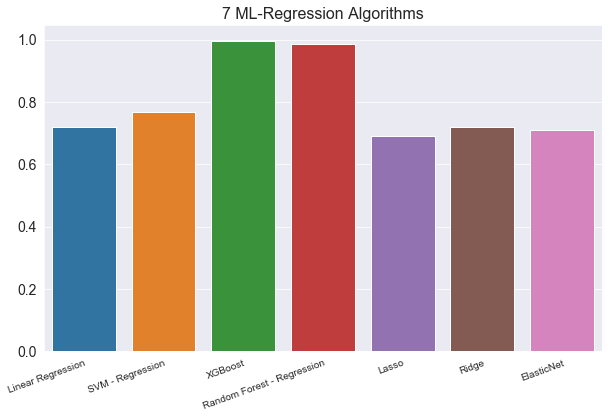

In [277]:
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.barplot(data=model_scores_T)
plt.title("7 ML-Regression Algorithms", fontsize=16)

plt.xticks(rotation=20, fontsize=10,rotation_mode="anchor", ha="right" )
plt.yticks(fontsize = 14)

# plt.savefig("7 ML-Regression Algorithms.png",bbox_inches='tight',dpi=100)

In [278]:
model_scores.sort_values(by = 'r2 Score', ascending= False).head(3)

Model  r2 Score
2                     XGBoost  0.996867
3  Random Forest - Regression  0.987371
1            SVM - Regression  0.766003

From the dataframe above, **XGBoost** , **Random Forest - Regression** , and **SVM - Regression** are the top 3 best models in my train set training so I'm going to proceed with these models.

## Training on Test set

Now we have selected the top 3 models to proceed next level. Let's go with training with the test set.

### 1) XGBoost on Test Set

In [279]:
xgb_reg = xgb.XGBRegressor()

In [280]:
model_xgb = xgb_reg.fit(X_train, y_train)

In [281]:
xgb_test_pred = model_xgb.predict(X_test) #changed to train set

In [282]:
xgb_test_RMSE = float(format(np.sqrt(mean_squared_error(y_test, xgb_test_pred))))  #'.3f'    #changed to train set

xgb_test_MAE = mean_absolute_error(y_test, xgb_test_pred)   #changed to train set

xgb_test_r2 = r2_score(y_test, xgb_test_pred)#changed to train set   
xgb_test_adj_r2 = 1-(1-xgb_test_r2)*(n-1)/(n-k-1)

print("XGB RMSE score on Test set:", xgb_test_RMSE)
print("XGB MAE score on Test set:", xgb_test_MAE)
print("XGB r2 score on Test set:", xgb_test_r2)
print("XGB Adjusted r2 score on Test set:", xgb_test_adj_r2)

XGB RMSE score on Test set: 4.809329938901501
XGB MAE score on Test set: 1.6861403897104335
XGB r2 score on Test set: 0.8227009009428763
XGB Adjusted r2 score on Test set: 0.821557035787669


### 2) Random Forest - Regression on Test Set

In [283]:
rfr = RandomForestRegressor()
model_rfr = rfr.fit(X_train, y_train)

In [284]:
rfr_test_pred = model_rfr.predict(X_test)

In [285]:
rfr_test_RMSE = float(format(np.sqrt(mean_squared_error(y_test, rfr_test_pred))))  #'.3f'   

rfr_test_MAE = mean_absolute_error(y_test, rfr_test_pred)  

rfr_test_r2 = r2_score(y_test, rfr_test_pred) 
rfr_test_adj_r2 = 1-(1-rfr_test_r2)*(n-1)/(n-k-1)

print("RFR RMSE score on Test set:", rfr_test_RMSE)
print("RFR MAE score on Test set:", rfr_test_MAE)
print("RFR r2 score on Test set:", rfr_test_r2)
print("RFR Adjusted r2 score on Test set:", rfr_test_adj_r2)

RFR RMSE score on Test set: 4.713529465451286
RFR MAE score on Test set: 1.6692786209987873
RFR r2 score on Test set: 0.8296940439868391
RFR Adjusted r2 score on Test set: 0.8285952958835284


### 3) SVR - Regression on Test Set

In [286]:
svr = SVR()
model_svr = svr.fit(X_train, y_train)

svr_test_pred = model_svr.predict(X_test)

In [287]:
svr_test_RMSE = float(format(np.sqrt(mean_squared_error(y_test, svr_test_pred))))  #'.3f'

svr_test_MAE = mean_absolute_error(y_test, svr_test_pred)

svr_test_r2 = r2_score(y_test, svr_test_pred)
svr_test_adj_r2 = 1-(1-svr_test_r2)*(n-1)/(n-k-1)

print("SVR RMSE score on Test set:", svr_test_RMSE)
print("SVR MAE score on Test set:", svr_test_MAE)
print("SVR r2 score on Test set:", svr_test_r2)
print("SVR Adjusted r2 score on Test set:", svr_test_adj_r2)

SVR RMSE score on Test set: 6.556323312268207
SVR MAE score on Test set: 2.2545762497810515
SVR r2 score on Test set: 0.6704979601230865
SVR Adjusted r2 score on Test set: 0.6683721405109774


Let's see these 3 models how they perform compare to when training on train set only.

#### Making comparison to see how well XGBoost and Random Forest - Regression on predicting the Used Car Price.

#### 1) XGBoost

In [288]:
y_test

3557     13.50
1155      4.75
4164     11.31
127       3.25
5536      5.25
4069     22.45
3561      6.54
36        8.63
4853      4.50
3763      2.85
3610      9.90
4288      1.75
3530      2.19
4664      4.40
1010     11.65
5578      2.49
1362      3.60
5710      2.15
6017      2.65
2962     17.00
5666      6.85
1608      3.87
2431     10.45
2070      2.10
2766      7.40
3759      3.25
1657      4.75
4805      6.50
4363      3.70
4191     23.75
2294      4.45
1897      4.00
4029     14.70
5037      2.85
3038     20.99
4815      3.50
1018      8.51
3023      7.49
752      31.94
802      56.00
1451     27.00
858       6.90
2450      0.82
4320      7.50
4915      3.80
167       2.10
905       2.85
3209      4.51
3321      1.60
2064     11.90
4776      2.95
5154      3.38
4292     17.23
982       7.00
4432      2.44
332       6.15
4044     12.00
192       2.60
4908      3.53
4767      1.10
3697     16.50
4635      7.59
5777      4.90
168      45.00
2891      5.00
4741      6.25
741       

In [289]:
xgb_test_pred

array([13.398893,  4.724291,  9.677001, ...,  4.975836, 14.167357,
        5.866534], dtype=float32)

In [290]:
y_predicted = pd.DataFrame([y_test]).T.head(20)
y_predicted.index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
y_predicted

Price
0   13.50
1    4.75
2   11.31
3    3.25
4    5.25
5   22.45
6    6.54
7    8.63
8    4.50
9    2.85
10   9.90
11   1.75
12   2.19
13   4.40
14  11.65
15   2.49
16   3.60
17   2.15
18   2.65
19  17.00

In [291]:
xgb_y_predicted = pd.DataFrame([xgb_test_pred]).T.head(20)
xgb_y_predicted

0
0   13.398893
1    4.724291
2    9.677001
3    3.281089
4    7.815982
5   23.988356
6    6.648539
7    9.105800
8    4.697168
9    7.231611
10  10.521383
11   1.832390
12   1.957748
13   4.137703
14  10.584796
15   2.071990
16   4.290549
17   2.895519
18   2.331707
19  13.187947

In [292]:
y_predicted.count()

Price    20
dtype: int64

In [293]:
xgb_y_predicted.count()

0    20
dtype: int64

In [294]:
new_xgb_pred_df = pd.concat([y_predicted, xgb_y_predicted], axis=1)

new_xgb_pred_df.rename({'Price' : 'y_test',
           0 : 'xgb_y_test'}, axis='columns', inplace=True)

new_xgb_pred_df



y_test  xgb_y_test
0    13.50   13.398893
1     4.75    4.724291
2    11.31    9.677001
3     3.25    3.281089
4     5.25    7.815982
5    22.45   23.988356
6     6.54    6.648539
7     8.63    9.105800
8     4.50    4.697168
9     2.85    7.231611
10    9.90   10.521383
11    1.75    1.832390
12    2.19    1.957748
13    4.40    4.137703
14   11.65   10.584796
15    2.49    2.071990
16    3.60    4.290549
17    2.15    2.895519
18    2.65    2.331707
19   17.00   13.187947

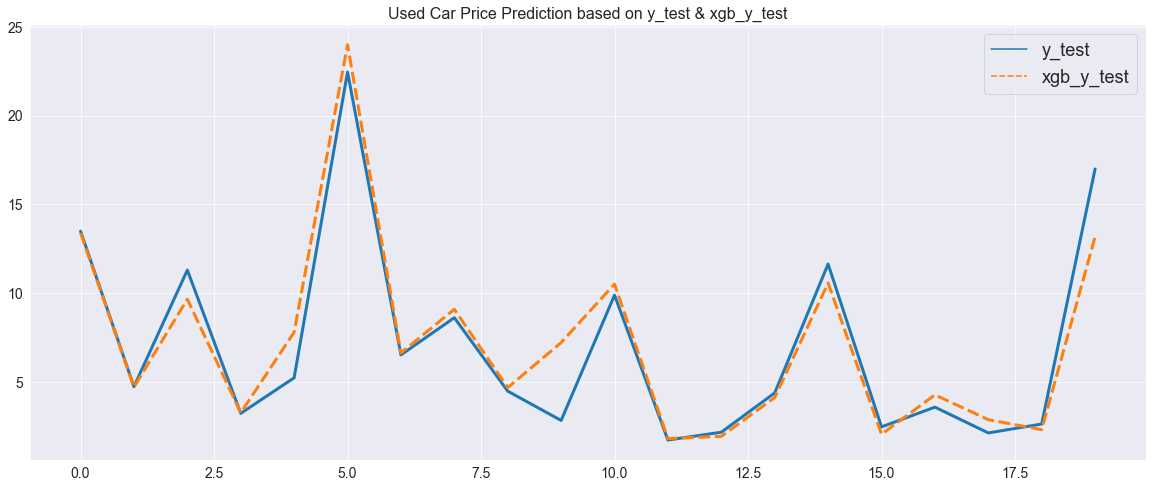

In [295]:
fig, ax = plt.subplots(figsize=(20,8))

ax = sns.lineplot(data=new_xgb_pred_df, linewidth = 3)

plt.xticks(fontsize=14)
plt.yticks(fontsize = 14)

plt.title("Used Car Price Prediction based on y_test & xgb_y_test", fontsize=16)
plt.legend(loc="best",fontsize=18)

# plt.savefig("Used Car Price Prediction based on y_test & xgb_y_test.png",bbox_inches='tight',dpi=100)

#### 2) Random Forest

In [296]:
rfr_y_predicted = pd.DataFrame([rfr_test_pred]).T.head(20)
rfr_y_predicted

0
0   13.9008
1    5.4327
2   11.6955
3    2.8717
4    7.4449
5   25.1190
6    7.7176
7    9.4576
8    4.8328
9    4.7195
10   8.7315
11   1.8531
12   1.9493
13   3.7003
14   9.4946
15   2.4905
16   3.8527
17   2.7237
18   2.8183
19  16.9632

In [297]:
new_rfr_pred_df = pd.concat([y_predicted, rfr_y_predicted], axis=1)

new_rfr_pred_df.rename({'Price' : 'y_test',
           0 : 'rfr_y_test'}, axis='columns', inplace=True)

new_rfr_pred_df



y_test  rfr_y_test
0    13.50     13.9008
1     4.75      5.4327
2    11.31     11.6955
3     3.25      2.8717
4     5.25      7.4449
5    22.45     25.1190
6     6.54      7.7176
7     8.63      9.4576
8     4.50      4.8328
9     2.85      4.7195
10    9.90      8.7315
11    1.75      1.8531
12    2.19      1.9493
13    4.40      3.7003
14   11.65      9.4946
15    2.49      2.4905
16    3.60      3.8527
17    2.15      2.7237
18    2.65      2.8183
19   17.00     16.9632

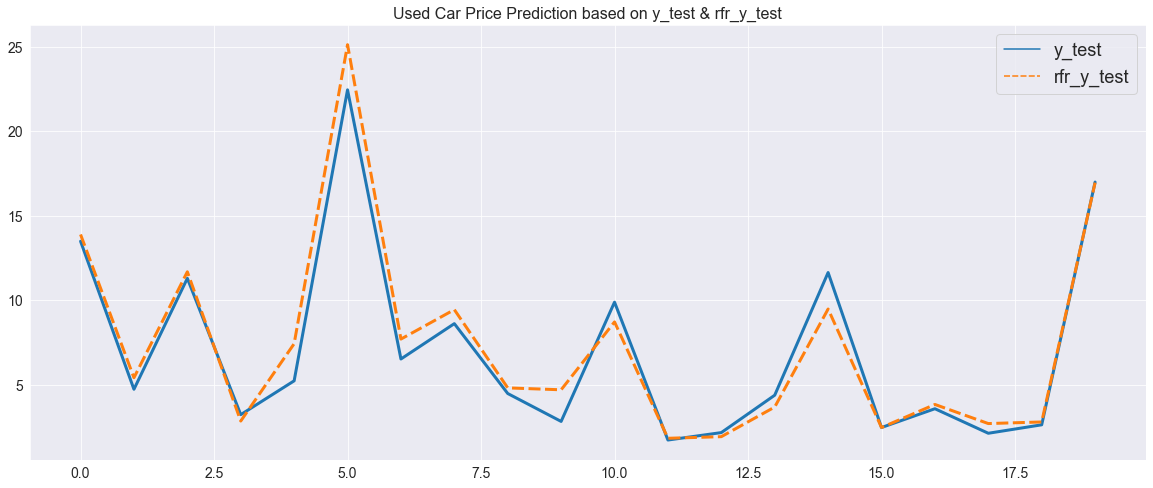

In [298]:
fig, ax = plt.subplots(figsize=(20,8))

ax = sns.lineplot(data=new_rfr_pred_df, linewidth = 3)


plt.xticks(fontsize=14)
plt.yticks(fontsize = 14)

plt.title("Used Car Price Prediction based on y_test & rfr_y_test", fontsize=16)
plt.legend(loc="best",fontsize=18)

# plt.savefig("Used Car Price Prediction based on y_test & rfr_y_test.png",bbox_inches='tight',dpi=100)

#### 3) SVR

In [299]:
svr_y_predicted = pd.DataFrame([svr_test_pred]).T.head(20)
svr_y_predicted

0
0   18.732087
1    5.272398
2    8.062175
3    3.449790
4    7.699159
5   23.360991
6    7.926691
7    8.284870
8    4.708384
9    6.293430
10   8.288013
11   0.873382
12   2.130023
13   3.594258
14  11.179944
15   1.896717
16   4.419453
17   3.404989
18   2.878422
19  15.495845

In [300]:
new_svr_pred_df = pd.concat([y_predicted, svr_y_predicted], axis=1)

new_svr_pred_df.rename({'Price' : 'y_test',
           0 : 'svr_y_test'}, axis='columns', inplace=True)

new_svr_pred_df



y_test  svr_y_test
0    13.50   18.732087
1     4.75    5.272398
2    11.31    8.062175
3     3.25    3.449790
4     5.25    7.699159
5    22.45   23.360991
6     6.54    7.926691
7     8.63    8.284870
8     4.50    4.708384
9     2.85    6.293430
10    9.90    8.288013
11    1.75    0.873382
12    2.19    2.130023
13    4.40    3.594258
14   11.65   11.179944
15    2.49    1.896717
16    3.60    4.419453
17    2.15    3.404989
18    2.65    2.878422
19   17.00   15.495845

Text(0.5, 1.0, 'Used Car Price Prediction based on y_test & svr_y_test')

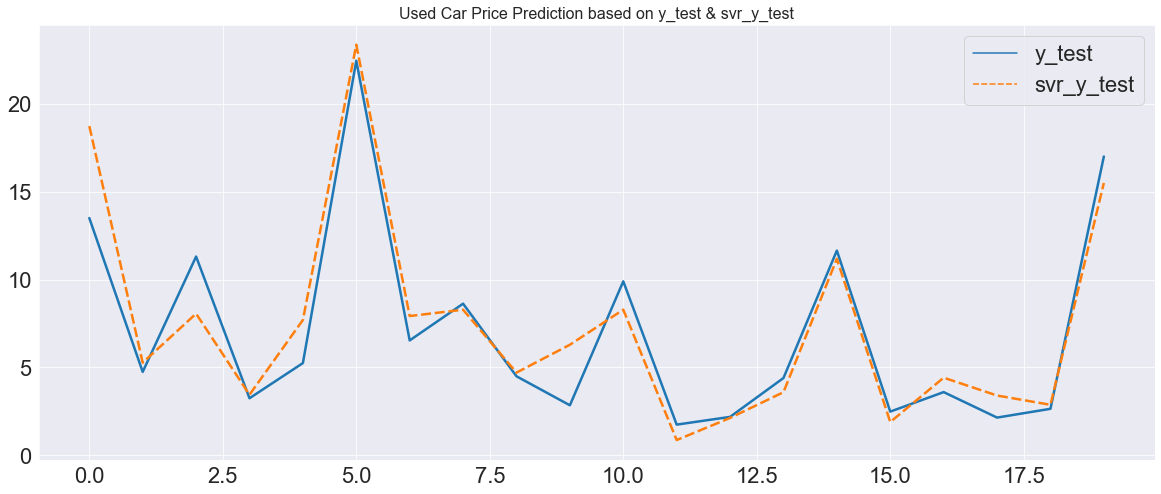

In [301]:
fig, ax = plt.subplots(figsize=(20,8))

ax = sns.lineplot(data=new_svr_pred_df, linewidth = 2.5)
plt.title("Used Car Price Prediction based on y_test & svr_y_test", fontsize=16)

In [302]:
model_test = {'Model': ["XGBoost","Random Forest - Regression","SVM - Regression"],
               'r2 Score on Train': [ xgb_r2, rfr_r2, svr_r2],
             'r2 Score on Test':[xgb_test_r2,rfr_test_r2,svr_test_r2]}

model_test_scores = pd.DataFrame(model_test)
model_test_scores

Model  r2 Score on Train  r2 Score on Test
0                     XGBoost           0.996867          0.822701
1  Random Forest - Regression           0.987371          0.829694
2            SVM - Regression           0.766003          0.670498

As we can see from the data frame above, the scoring on Test set dropped drastically but **XGBoost** and **Random Forest - Regression** are still pretty high, above 80%. Also, XGBoost still remains the top model.

Since **XGBoost** and **Random Forest - Regression** their scorng are quite close, I'm going to further tunning using GridSearch CV and get feature importance of these 2 models to see it can help to finalize a better result of which model is the best choice for the problem statement.

## Tunning and Feature Selections

### 1) XGBoost

#### Cross Validation of XGBoost - GridSearch CV

In [303]:
xgb_gridCV = GridSearchCV(
        estimator=XGBRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=1)

In [304]:
xgbGridCV_result = xgb_gridCV.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.0min finished


In [305]:
xgb_best_params = xgbGridCV_result.best_params_
xgb_best_params

{'max_depth': 3, 'n_estimators': 1000}

In [306]:
best_xgb = XGBRegressor(max_depth= 4 , n_estimators= 1000 , random_state=111)

best_model_xgb = best_xgb.fit(X_train, y_train)

best_predict_xgb = best_model_xgb.predict(X_test)

In [307]:
best_xgb_RMSE = float(format(np.sqrt(mean_squared_error(y_test, best_predict_xgb))))  #'.3f'

best_xgb_MAE = mean_absolute_error(y_test, best_predict_xgb)

best_xgb_r2 = r2_score(y_test, best_predict_xgb)
best_xgb_adj_r2 = 1-(1-best_xgb_r2)*(n-1)/(n-k-1)

print("XGB RMSE score after GridSearch:", best_xgb_RMSE)
print("XGB MAE score after GridSearch:", best_xgb_MAE)
print("XGB r2 score after GridSearch:", best_xgb_r2)
print("XGB Adjusted r2 score after GridSearch:", best_xgb_adj_r2)

XGB RMSE score after GridSearch: 4.378427899114613
XGB MAE score after GridSearch: 1.6774555250147518
XGB r2 score after GridSearch: 0.8530485793937164
XGB Adjusted r2 score after GridSearch: 0.8521005057123855


### 2) Random Forest - Regression

#### Cross Validation of Random Forest Regression - GridSearch CV

In [308]:
rfr_gridCV = GridSearchCV(
        estimator=rfr,
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=1)

In [309]:
rfrGridCV_result = rfr_gridCV.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.9min finished


In [310]:
rfr_best_params = rfrGridCV_result.best_params_
rfr_best_params

{'max_depth': 6, 'n_estimators': 1000}

In [311]:
best_rfr = RandomForestRegressor(max_depth= 6 , n_estimators= 1000 , random_state=111)

best_model_rfr = best_rfr.fit(X_train, y_train)

best_predict_rfr = best_model_rfr.predict(X_test)

In [312]:
best_rfr_RMSE = float(format(np.sqrt(mean_squared_error(y_test, best_predict_rfr))))  #'.3f'

best_rfr_MAE = mean_absolute_error(y_test, best_predict_rfr)

best_rfr_r2 = r2_score(y_test, best_predict_rfr)
best_rfr_adj_r2 = 1-(1-best_rfr_r2)*(n-1)/(n-k-1)

print("RFR RMSE score after GridSearch:", best_rfr_RMSE)
print("RFR MAE score after GridSearch:", best_rfr_MAE)
print("RFR r2 score after GridSearch:", best_rfr_r2)
print("RFR Adjusted r2 score after GridSearch:", best_rfr_adj_r2)

RFR RMSE score after GridSearch: 4.985756226113348
RFR MAE score after GridSearch: 2.0886919030160045
RFR r2 score after GridSearch: 0.8094541631657209
RFR Adjusted r2 score after GridSearch: 0.808224835186145


# Finalizing Model

- Feature Importance
- Insights

In [313]:
model_GridCV = {'Model': ["XGBoost","Random Forest - Regression"],
               'r2 Score on Train': [ xgb_r2, rfr_r2],
             'r2 Score on Test':[xgb_test_r2,rfr_test_r2],
             'r2 Score aft GridCV':[best_xgb_r2, best_rfr_r2]}

model_GridCV_scores = pd.DataFrame(model_GridCV)
model_GridCV_scores

Model  r2 Score on Train  r2 Score on Test  r2 Score aft GridCV
0                     XGBoost           0.996867          0.822701             0.853049
1  Random Forest - Regression           0.987371          0.829694             0.809454

After the cross validation, we can see **Random Forest- Regression** dropped further on the scoring yet **XGBoost** actually improved on the scoring. With that, I decided to drop **Random Forest- Regression** from the process and focus on **XGBoost** on next steps.

## Feature Importance on XGBoost

In [314]:
len(best_model_xgb.feature_importances_)

27

In [315]:
best_model_xgb.feature_importances_

array([7.9976590e-03, 2.0214657e-03, 1.2337162e-02, 5.3522807e-02,
       4.0617257e-01, 1.1750611e-02, 1.4550988e-01, 5.9180202e-05,
       2.5100892e-02, 0.0000000e+00, 1.4735328e-05, 8.0017962e-02,
       9.4092093e-02, 0.0000000e+00, 5.2223243e-03, 2.5990602e-02,
       5.5531505e-03, 9.9663828e-03, 2.3749727e-03, 7.1662352e-03,
       1.9589628e-03, 1.5068078e-02, 1.4147113e-02, 4.5599472e-03,
       2.4162137e-03, 6.2377643e-02, 4.6014199e-03], dtype=float32)

Text(0.5, 1.0, 'Feature Importance of XGBoost')

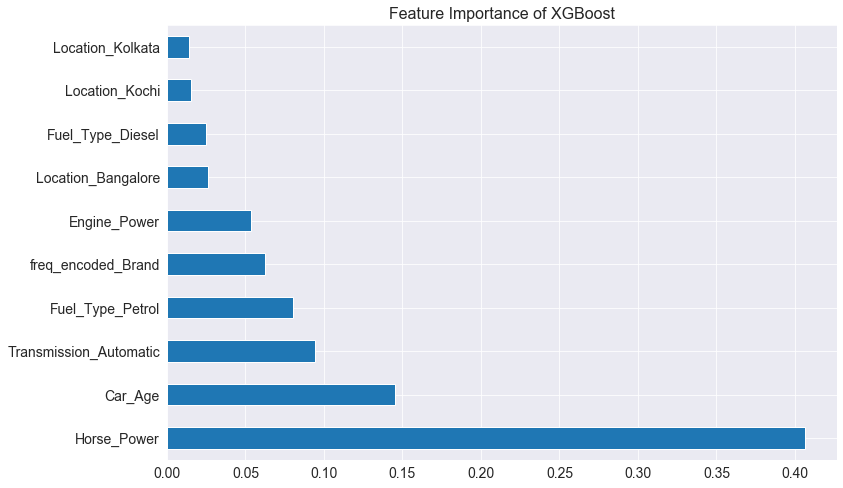

In [316]:
plt.figure(figsize=(12,8))

feat_importances_xgb = pd.Series(best_model_xgb.feature_importances_, index= X_train_col.columns)
feat_importances_xgb.nlargest(10).plot(kind='barh')


plt.xticks(fontsize=14)
plt.yticks(fontsize = 14)

plt.title("Feature Importance of XGBoost", fontsize=16)

# plt.savefig("Feature Importance of XGBoost.png",bbox_inches='tight',dpi=100)

In [317]:
feature_importances_xgb_graph = pd.DataFrame(best_model_xgb.feature_importances_,
                                   index = X_train_col.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances_xgb_graph

importance
Horse_Power               0.406173
Car_Age                   0.145510
Transmission_Automatic    0.094092
Fuel_Type_Petrol          0.080018
freq_encoded_Brand        0.062378
Engine_Power              0.053523
Location_Bangalore        0.025991
Fuel_Type_Diesel          0.025101
Location_Kochi            0.015068
Location_Kolkata          0.014147
Fuel_Consumption          0.012337
Seat_Capacity             0.011751
Location_Coimbatore       0.009966
Mileage_km                0.007998
Location_Hyderabad        0.007166
Location_Chennai          0.005553
Location_Ahmedabad        0.005222
freq_encoded_Model        0.004601
Location_Mumbai           0.004560
Location_Pune             0.002416
Location_Delhi            0.002375
No_of_Owner               0.002021
Location_Jaipur           0.001959
Fuel_Type_CNG             0.000059
Fuel_Type_LPG             0.000015
Fuel_Type_Electric        0.000000
Transmission_Manual       0.000000

From the Feature Importance results, here are some insights on the top 5 features. <br>
<br>
**a) Horse_Power:** Horse Power is very important to car, the higher horse power the better performance and speed it is for the car.<br>
<br>
**b) Car_Age:** The newer the car, the lesser potential issues compare to older cars. Hence this can tell us that car age is very importance to Buyers when they looking for used car. <br>
<br>
**c) Automatic:** We can assume that Automatic transmission type of car is arose from recent year in the market and it has a lot of advantage compare to Manual car for instance easier to use and more comfortable. Many cities in India are commonly in high traffic, perhaps Automatic car allows them to be more comfortable to control during these concentrated traffic. <br>
<br>
**d)Petrol:** Petrol is the most easier and common fuel type majority in the world and relatively cheaper than other fuel type., which could be why it is up in the top 5 feature compare to other fuel types. <br>
<br>
**e) Brand:** An impactful car brand is developed over time depending on characteristics like product quality, performance, endorsements, and ownership satisfaction. Pricing is one of the most powerful indicators of a car's brand value. Luxury or Foreign imported car brand will definitely be higher price for its branding.


## Selected top 5 features to test the XGBoost model and see the results

In [318]:
X2 = data.drop(columns=["Price"])
y2 = data["Price"]

In [319]:
X2.head()

Location  Mileage_km Fuel_Type Transmission No_of_Owner  Fuel_Consumption  Engine_Power  Horse_Power  Seat_Capacity    Brand                  Model  Car_Age
0      Mumbai     72000.0       CNG       Manual       First             29.56         998.0        58.16            5.0   maruti           wagonrlxicng       10
1        Pune     41000.0    Diesel       Manual       First             19.67        1582.0       126.20            5.0  hyundai    creta16crdisxoption        5
2     Chennai     46000.0    Petrol       Manual       First             18.20        1199.0        88.70            5.0    honda                  jazzv        9
3     Chennai     87000.0    Diesel       Manual       First             20.77        1248.0        88.76            7.0   maruti              ertigavdi        8
4  Coimbatore     40670.0    Diesel    Automatic      Second             15.20        1968.0       140.80            5.0     audi  a4new20tdimultitronic        7

### Encoding - as the previous encoding was on dataset after split so need to re-encoding for this test

In [320]:
X2 = pd.get_dummies(X2, columns=["Fuel_Type","Transmission", "Location"])
X2.head()

Mileage_km No_of_Owner  Fuel_Consumption  Engine_Power  Horse_Power  Seat_Capacity    Brand                  Model  Car_Age  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_LPG  Fuel_Type_Petrol  Transmission_Automatic  Transmission_Manual  Location_Ahmedabad  Location_Bangalore  Location_Chennai  Location_Coimbatore  Location_Delhi  Location_Hyderabad  Location_Jaipur  Location_Kochi  Location_Kolkata  Location_Mumbai  Location_Pune
0     72000.0       First             29.56         998.0        58.16            5.0   maruti           wagonrlxicng       10              1                 0                   0              0                 0                       0                    1                   0                   0                 0                    0               0                   0                0               0                 0                1              0
1     41000.0       First             19.67        1582.0       126.20            5.0  hyundai    creta16crdisxoption        5              0                 1                   0              0                 0                       0                    1                   0                   0                 0                    0               0                   0                0               0                 0                0              1
2     46000.0       First             18.20        1199.0        88.70            5.0    honda                  jazzv        9              0                 0                   0              0                 1                       0                    1                   0                   0                 1                    0               0                   0                0               0                 0                0              0
3     87000.0       First             20.77        1248.0        88.76            7.0   maruti              ertigavdi        8              0                 1                   0              0                 0                       0                    1                   0                   0                 1                    0               0                   0                0               0                 0                0              0
4     40670.0      Second             15.20        1968.0       140.80            5.0     audi  a4new20tdimultitronic        7              0                 1                   0              0                 0                       1                    0                   0                   0                 0                    1               0                   0                0               0                 0                0              0

In [321]:
x_rank = [['First', 'Second', 'Third', 'Fourth & Above']]

encoder = OrdinalEncoder(x_rank)

X2["No_of_Owner"] = encoder.fit_transform(np.array(X2.No_of_Owner).reshape(-1,1))

In [322]:
X2.head()

Mileage_km  No_of_Owner  Fuel_Consumption  Engine_Power  Horse_Power  Seat_Capacity    Brand                  Model  Car_Age  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_LPG  Fuel_Type_Petrol  Transmission_Automatic  Transmission_Manual  Location_Ahmedabad  Location_Bangalore  Location_Chennai  Location_Coimbatore  Location_Delhi  Location_Hyderabad  Location_Jaipur  Location_Kochi  Location_Kolkata  Location_Mumbai  Location_Pune
0     72000.0          0.0             29.56         998.0        58.16            5.0   maruti           wagonrlxicng       10              1                 0                   0              0                 0                       0                    1                   0                   0                 0                    0               0                   0                0               0                 0                1              0
1     41000.0          0.0             19.67        1582.0       126.20            5.0  hyundai    creta16crdisxoption        5              0                 1                   0              0                 0                       0                    1                   0                   0                 0                    0               0                   0                0               0                 0                0              1
2     46000.0          0.0             18.20        1199.0        88.70            5.0    honda                  jazzv        9              0                 0                   0              0                 1                       0                    1                   0                   0                 1                    0               0                   0                0               0                 0                0              0
3     87000.0          0.0             20.77        1248.0        88.76            7.0   maruti              ertigavdi        8              0                 1                   0              0                 0                       0                    1                   0                   0                 1                    0               0                   0                0               0                 0                0              0
4     40670.0          1.0             15.20        1968.0       140.80            5.0     audi  a4new20tdimultitronic        7              0                 1                   0              0                 0                       1                    0                   0                   0                 0                    1               0                   0                0               0                 0                0              0

In [323]:

counts_brand = X2.Brand.value_counts()

encoding_brand = counts_brand/len(X2)

X2["freq_encoded_Brand"] = X2.Brand.map(encoding_brand)

In [324]:
X2.head()

Mileage_km  No_of_Owner  Fuel_Consumption  Engine_Power  Horse_Power  Seat_Capacity    Brand                  Model  Car_Age  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_LPG  Fuel_Type_Petrol  Transmission_Automatic  Transmission_Manual  Location_Ahmedabad  Location_Bangalore  Location_Chennai  Location_Coimbatore  Location_Delhi  Location_Hyderabad  Location_Jaipur  Location_Kochi  Location_Kolkata  Location_Mumbai  Location_Pune  freq_encoded_Brand
0     72000.0          0.0             29.56         998.0        58.16            5.0   maruti           wagonrlxicng       10              1                 0                   0              0                 0                       0                    1                   0                   0                 0                    0               0                   0                0               0                 0                1              0            0.201196
1     41000.0          0.0             19.67        1582.0       126.20            5.0  hyundai    creta16crdisxoption        5              0                 1                   0              0                 0                       0                    1                   0                   0                 0                    0               0                   0                0               0                 0                0              1            0.183918
2     46000.0          0.0             18.20        1199.0        88.70            5.0    honda                  jazzv        9              0                 0                   0              0                 1                       0                    1                   0                   0                 1                    0               0                   0                0               0                 0                0              0            0.101013
3     87000.0          0.0             20.77        1248.0        88.76            7.0   maruti              ertigavdi        8              0                 1                   0              0                 0                       0                    1                   0                   0                 1                    0               0                   0                0               0                 0                0              0            0.201196
4     40670.0          1.0             15.20        1968.0       140.80            5.0     audi  a4new20tdimultitronic        7              0                 1                   0              0                 0                       1                    0                   0                   0                 0                    1               0                   0                0               0                 0                0              0            0.039209

In [325]:
#Frequency encoding for Model

count_model = X2.Model.value_counts()

#get frequency of each category
encoding_model = count_model/len(X2)

#.map() map the frequency of Brand to a new column
X2["freq_encoded_Model"] = X2.Model.map(encoding_model)

In [326]:
X2.drop(columns=["Brand","Model"], inplace=True)
X2.head()

Mileage_km  No_of_Owner  Fuel_Consumption  Engine_Power  Horse_Power  Seat_Capacity  Car_Age  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_LPG  Fuel_Type_Petrol  Transmission_Automatic  Transmission_Manual  Location_Ahmedabad  Location_Bangalore  Location_Chennai  Location_Coimbatore  Location_Delhi  Location_Hyderabad  Location_Jaipur  Location_Kochi  Location_Kolkata  Location_Mumbai  Location_Pune  freq_encoded_Brand  freq_encoded_Model
0     72000.0          0.0             29.56         998.0        58.16            5.0       10              1                 0                   0              0                 0                       0                    1                   0                   0                 0                    0               0                   0                0               0                 0                1              0            0.201196            0.002991
1     41000.0          0.0             19.67        1582.0       126.20            5.0        5              0                 1                   0              0                 0                       0                    1                   0                   0                 0                    0               0                   0                0               0                 0                0              1            0.183918            0.001994
2     46000.0          0.0             18.20        1199.0        88.70            5.0        9              0                 0                   0              0                 1                       0                    1                   0                   0                 1                    0               0                   0                0               0                 0                0              0            0.101013            0.000665
3     87000.0          0.0             20.77        1248.0        88.76            7.0        8              0                 1                   0              0                 0                       0                    1                   0                   0                 1                    0               0                   0                0               0                 0                0              0            0.201196            0.004154
4     40670.0          1.0             15.20        1968.0       140.80            5.0        7              0                 1                   0              0                 0                       1                    0                   0                   0                 0                    1               0                   0                0               0                 0                0              0            0.039209            0.001163

In [327]:
X3 = X2[["Horse_Power", "Car_Age","Transmission_Automatic", "Fuel_Type_Petrol","freq_encoded_Brand"]]
y3 = data["Price"]


In [328]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X3, y3,test_size=0.3, random_state = 111)

In [329]:
pd.DataFrame(X2_train)

Horse_Power  Car_Age  Transmission_Automatic  Fuel_Type_Petrol  freq_encoded_Brand
3751     86.70000        7                       0                 1            0.101013
2025     73.00000        7                       0                 1            0.201196
1767     81.83000        4                       0                 1            0.183918
5195    157.70000        8                       1                 1            0.052833
1317     75.00000        7                       0                 0            0.004652
1804    126.32000        6                       0                 0            0.183918
981      94.00000       14                       0                 1            0.201196
3964     97.60000        8                       0                 1            0.015119
4557     67.04000        5                       0                 1            0.201196
5420    190.00000        4                       1                 0            0.044360
3940     88.80000        5                       0                 0            0.052334
1688     88.80000        5                       0                 0            0.052334
3066    241.38000        8                       1                 0            0.039209
2468    118.00000        8                       0                 1            0.101013
1551     73.90000        9                       0                 1            0.052334
4572     55.20000        5                       0                 1            0.183918
32      184.00000        7                       1                 0            0.045190
2726    110.00000        9                       0                 0            0.183918
3773     82.00000        5                       1                 1            0.183918
3122    184.00000        6                       1                 0            0.044360
2684    157.80000        9                       0                 1            0.028742
5998     73.90000       10                       0                 1            0.052334
5032     88.73000        4                       0                 0            0.183918
20      190.00000        6                       1                 0            0.044360
5958     98.60000        5                       0                 0            0.101013
5428    140.00000        2                       0                 0            0.045190
2977     81.80000        7                       0                 1            0.201196
503     168.50000        3                       1                 0            0.068284
5577     73.90000        8                       0                 0            0.052334
5913     73.90000       10                       0                 0            0.201196
5253    204.00000        9                       1                 0            0.052833
3602     78.90000        9                       0                 1            0.183918
5877    147.51000        9                       1                 0            0.039209
5250    103.20000       12                       0                 1            0.183918
444      55.20000        6                       0                 1            0.183918
4634     88.80000        8                       0                 0            0.030902
6018     57.60000        9                       0                 0            0.020103
4879     85.80000        6                       0                 1            0.201196
385     117.30000        4                       0                 1            0.101013
4518    102.00000       13                       0                 0            0.068284
1081     80.00000       10                       0                 1            0.183918
1651     82.00000        3                       1                 1            0.183918
4275     67.04000        5                       1                 1            0.201196
3332    100.00000        7                       0                 0            0.045190
5

In [330]:
ss2 = StandardScaler()

X2_train = ss.fit_transform(X2_train)
X2_test = ss.transform(X2_test)

In [331]:
xgb_reg_new = xgb.XGBRegressor()
model_xgb_new = xgb_reg_new.fit(X2_train, y2_train)
xgb_new_pred = model_xgb_new.predict(X2_test)

In [332]:
xgb_new_RMSE = float(format(np.sqrt(mean_squared_error(y2_test, xgb_new_pred))))  #'.3f'    #changed to train set

xgb_new_MAE = mean_absolute_error(y2_test, xgb_new_pred)  

xgb_new_r2 = r2_score(y2_test, xgb_new_pred)   
xgb_new_adj_r2 = 1-(1-xgb_new_r2)*(n-1)/(n-k-1)

print("New XGB RMSE score:", xgb_new_RMSE)
print("New XGB MAE score:", xgb_new_MAE)
print("New XGB r2 score:", xgb_new_r2)
print("New XGB Adjusted r2 score:", xgb_new_adj_r2)

New XGB RMSE score: 4.771007197891553
New XGB MAE score: 1.7183793625720711
New XGB r2 score: 0.8255152291304564
New XGB Adjusted r2 score: 0.824389520931298


In [333]:
model_top5 = {'Model': ["XGBoost"],
               'r2 Score on Train': [ xgb_r2],
             'r2 Score on Test':[xgb_test_r2],
             'r2 Score aft GridCV':[best_xgb_r2],
               'top 5 features r2 score': [xgb_new_r2]}

model_top5_scores = pd.DataFrame(model_top5)
model_top5_scores

Model  r2 Score on Train  r2 Score on Test  r2 Score aft GridCV  top 5 features r2 score
0  XGBoost           0.996867          0.822701             0.853049                 0.825515

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text yticklabel objects>)

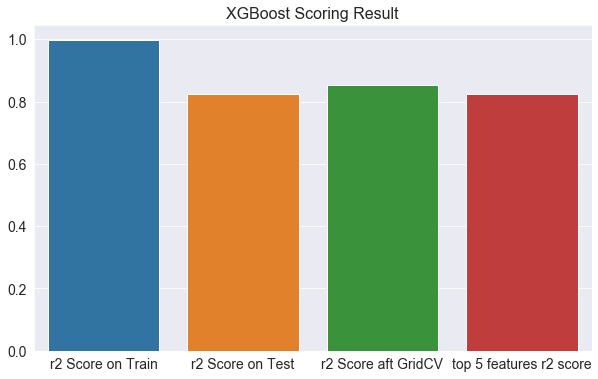

In [334]:
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.barplot(data=model_top5_scores)
plt.title("XGBoost Scoring Result", fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize = 14)

# plt.savefig("XGBoost Scoring Result.png",bbox_inches='tight',dpi=100)

Through this final testing on the selected features, it is confirm that XGBoost is the best model for this dataset as it get at least **80%** above on the results.

# Conclusion:

### Car Sellers will able to identify and determine the values of used car that brought down to their workshop by consumers with the help of this ML model. 
### This will help to reduce their time on manual process and increase the efficiency on appraises.